# Code for POI_study

In [1]:
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt
import os,sys,re

print(sys.version)

3.9.19 (main, May  6 2024, 20:12:36) [MSC v.1916 64 bit (AMD64)]


## Cleaning Data

In [3]:
df = pd.read_csv(r"C:\Users\Fisher Man\OneDrive\Desktop\Work Sheet\Py\Some Projects\Urban_Econ\Eassay3\HousingPriceCrawler\output\final_merged.csv")
df

district  community                                             link  \
0     jinjiang      皇经楼一期     https://cd.lianjia.com/xiaoqu/3011052976570/   
1     jinjiang       上东家园     https://cd.lianjia.com/xiaoqu/3011053437765/   
2     jinjiang  皇经楼新居二期B区     https://cd.lianjia.com/xiaoqu/1611061607677/   
3     jinjiang  绿地中心468星朗  https://cd.lianjia.com/xiaoqu/1620024208685305/   
4     jinjiang   皇经楼二街68号     https://cd.lianjia.com/xiaoqu/3011052642927/   
...        ...        ...                                              ...   
3854   pujiang     大溪谷英格堡    https://cd.lianjia.com/xiaoqu/16000000064429/   
3855   pujiang      莫扎特庄园  https://cd.lianjia.com/xiaoqu/1620028825491146/   
3856   pujiang      保利贝多芬    https://cd.lianjia.com/xiaoqu/16000000001993/   
3857  qionglai       博盛康郡  https://cd.lianjia.com/xiaoqu/1620043051883063/   
3858  qionglai      海宁现代城  https://cd.lianjia.com/xiaoqu/1620037609661570/   

     district_CN      location    input_name input_address  \
0            锦江区      锦江区皇经楼一期      锦江区皇经楼一期      锦江区皇经楼一期   
1            锦江区       锦江区上东家园       锦江区上东家园       锦江区上东家园   
2            锦江区  锦江区皇经楼新居二期B区  锦江区皇经楼新居二期B区  锦江区皇经楼新居二期B区   
3            锦江区  锦江区绿地中心468星朗  锦江区绿地中心468星朗  锦江区绿地中心468星朗   
4            锦江区   锦江区皇经楼二街68号   锦江区皇经楼二街68号   锦江区皇经楼二街68号   
...          ...           ...           ...           ...   
3854         蒲江县     蒲江县大溪谷英格堡     蒲江县大溪谷英格堡     蒲江县大溪谷英格堡   
3855         蒲江县      蒲江县莫扎特庄园      蒲江县莫扎特庄园      蒲江县莫扎特庄园   
3856         蒲江县      蒲江县保利贝多芬      蒲江县保利贝多芬      蒲江县保利贝多芬   
3857         邛崃市       邛崃市博盛康郡       邛崃市博盛康郡       邛崃市博盛康郡   
3858         邛崃市      邛崃市海宁现代城      邛崃市海宁现代城      邛崃市海宁现代城   

          output_address   gcj02_lng  gcj02_lat  ...        建成年代     供暖类型  \
0         四川省成都市锦江区皇经楼街道  104.108740  30.603456  ...       2008年     暂无信息   
1          四川省成都市锦江区上东家园  104.108157  30.599572  ...       2006年      自采暖   
2     四川省成都市锦江区皇经楼新居二期B区  104.108489  30.590993  ...  2012-2014年      无供暖   
3     四川省成都市锦江区绿地中心468星朗  104.155499  30.602128  ...  2019-2021年     暂无信息   
4      四川省成都市锦江区皇经楼二街68号  104.108362  30.592522  ...  2012-2016年      无供暖   
...                  ...         ...        ...  ...         ...      ...   
3854     四川省成都市蒲江县大溪谷英格堡  103.513771  30.174137  ...  2018-2020年     暂无信息   
3855           四川省成都市蒲江县  103.506478  30.197558  ...  2014-2016年  自采暖/无供暖   
3856           四川省成都市蒲江县  103.506478  30.197558  ...  2012-2016年     暂无信息   
3857      四川省成都市邛崃市博盛·康郡  103.698796  30.396708  ...  2012-2017年     暂无信息   
3858     四川省成都市邛崃市海宁·现代城  103.462725  30.415480  ...       2012年     暂无信息   

       用水类型   用电类型             物业费  \
0      暂无信息     民电     0.5至1元/平米/月   
1     商水/民水  商电/民电   0.5至0.6元/平米/月   
2        民水     民电    0.25至1元/平米/月   
3        商水  商电/民电  3.9至3.98元/平米/月   
4        民水     民电  1.1至1.36元/平米/月   
...     ...    ...             ...   
3854     民水     民电         3元/平米/月   
3855     民水     民电     1至3.6元/平米/月   
3856     民水     民电   3.5至4.6元/平米/月   
3857     民水     民电       1.8元/平米/月   
3858     民水     民电       1.2元/平米/月   

                                                   附近门店               物业公司  \
0                                              /楠丰路200号               首东置业   
1                                               /经天里24号             业主自筹物业   
2                                              /楠丰路200号               首东置业   
3     /成都市锦江区成龙路街办粮丰村一 二 四 五 六 七 十组，龙泉驿区东洪村十组 洪柳村一组 ...     成都嘉诚新悦物业管理有限公司   
4                                              /楠丰路200号      成都恒远房地产有限责任公司   
...                                                 ...                ...   
3854                                             暂无门店信息               暂无信息   
3855                                             暂无门店信息               暂无信息   
3856                                             暂无门店信息               暂无信息   
3857                                             暂无门店信息             私人承办物业   
3858                                             暂无门店信息  广西银湾物业服务有限公司成都分公司   

     

In [4]:
"""
Data Wrangler 生成的单元格。
"""
def clean_data(df):
    # 删除列: 'community'、'location'和其他列2
    df = df.drop(columns=['community', 'location', 'input_name', 'input_address'])
    # 删除列: '小区名称'
    df = df.drop(columns=['小区名称'])
    # 删除列: '在售房源数'、'小区ID'和其他列5
    df = df.drop(columns=['在售房源数', '小区ID', '经度', '纬度', '页面URL', '数据更新时间', '附近门店'])
    # 删除列: 'output_address' 中缺少数据的行
    df = df.dropna(subset=['output_address'])
    # 将缺少的值替换为列: '物业公司' 中的 "暂无信息"
    df = df.fillna({'物业公司': "暂无信息"})
    # 将缺少的值替换为列: '开发商' 中的 "暂无信息"
    df = df.fillna({'开发商': "暂无信息"})
    # 将缺少的值替换为列: '物业费' 中的 "暂无信息"
    df = df.fillna({'物业费': "暂无信息"})
    # 将缺少的值替换为列: '用电类型', '用水类型', '供暖类型' 中的 "暂无信息"
    df = df.fillna({'用电类型': "暂无信息", '用水类型': "暂无信息", '供暖类型': "暂无信息"})
    # 将缺少的值替换为列: '建成年代' 中的 "2005年"
    df = df.fillna({'建成年代': "2005年"})
    # 将缺少的值替换为列: '交易权属' 中的 "商品房"
    df = df.fillna({'交易权属': "商品房"})
    # 将缺少的值替换为列: '容积率' 中的 "暂无信息"
    df = df.fillna({'容积率': "暂无信息"})
    # 删除列: '楼栋总数' 中缺少数据的行
    df = df.dropna(subset=['楼栋总数'])
    # 对于distance 缺失值赋值为-1
    df.fillna(-1,inplace=True)
    return df

df_clean = clean_data(df.copy())
# print(df_clean.isnull().sum())
df_clean.head()

district                                             link district_CN  \
0  jinjiang     https://cd.lianjia.com/xiaoqu/3011052976570/         锦江区   
1  jinjiang     https://cd.lianjia.com/xiaoqu/3011053437765/         锦江区   
2  jinjiang     https://cd.lianjia.com/xiaoqu/1611061607677/         锦江区   
3  jinjiang  https://cd.lianjia.com/xiaoqu/1620024208685305/         锦江区   
4  jinjiang     https://cd.lianjia.com/xiaoqu/3011052642927/         锦江区   

       output_address   gcj02_lng  gcj02_lat  road_count  Road_1_distance  \
0      四川省成都市锦江区皇经楼街道  104.108740  30.603456         3.0           22.479   
1       四川省成都市锦江区上东家园  104.108157  30.599572         3.0           91.011   
2  四川省成都市锦江区皇经楼新居二期B区  104.108489  30.590993         3.0           80.128   
3  四川省成都市锦江区绿地中心468星朗  104.155499  30.602128         3.0           58.242   
4   四川省成都市锦江区皇经楼二街68号  104.108362  30.592522         3.0           79.791   

   Road_2_distance  Road_3_distance  ...   绿化率   容积率             交易权属  \
0           33.509           77.829  ...   20%   1.2        商品房/拆迁安置房   
1          107.052          108.129  ...   43%   1.8        商品房/拆迁安置房   
2          107.028          118.956  ...  暂无信息  暂无信息  商品房/拆迁安置房/新居工程房   
3           62.030           66.130  ...   37%     4              商品房   
4          111.436          119.052  ...   18%   1.2  商品房/拆迁安置房/新居工程房   

         建成年代  供暖类型   用水类型   用电类型             物业费            物业公司  \
0       2008年  暂无信息   暂无信息     民电     0.5至1元/平米/月            首东置业   
1       2006年   自采暖  商水/民水  商电/民电   0.5至0.6元/平米/月          业主自筹物业   
2  2012-2014年   无供暖     民水     民电    0.25至1元/平米/月            首东置业   
3  2019-2021年  暂无信息     商水  商电/民电  3.9至3.98元/平米/月  成都嘉诚新悦物业管理有限公司   
4  2012-2016年   无供暖     民水     民电  1.1至1.36元/平米/月   成都恒远房地产有限责任公司   

                 开发商  
0               暂无信息  
1       成都千和物业发展有限公司  
2               暂无信息  
3  绿地集团成都蜀峰房地产开发有限公司  
4               无开发商  

[5 rows x 95 columns]

In [5]:
def extract_numbers(val):
    """通用数值提取器"""
    if pd.isna(val):
        return np.nan
    # 同时匹配整数、小数、中文分隔符
    numbers = re.findall(r'\d+\.?\d*', str(val))  
    return list(map(float, numbers)) if numbers else []

# 新版处理函数
def smart_mean(val):
    nums = extract_numbers(val)
    return np.mean(nums) if nums else np.nan
df = df_clean.copy()
print(df.shape)
df['price'] = df['参考均价'].apply(smart_mean)
df['built_year'] = df['建成年代'].apply(smart_mean) 
df['commision_fee'] = df['物业费'].apply(smart_mean)
df['total_housing'] = df['房屋总数'].apply(smart_mean)
df['total_buildings'] = df['楼栋总数'].apply(smart_mean)
df.drop(columns=['参考均价', '建成年代', '物业费', '房屋总数', '楼栋总数'], inplace=True)
df.drop(df[df['built_year'] < 2005].index, inplace=True)
df.replace('暂无信息', '-1', inplace=True)
print(df.shape)
df
# print(df[['built_year', 'commision_fee']])

(3495, 95)
(3492, 95)


district                                             link district_CN  \
0     jinjiang     https://cd.lianjia.com/xiaoqu/3011052976570/         锦江区   
1     jinjiang     https://cd.lianjia.com/xiaoqu/3011053437765/         锦江区   
2     jinjiang     https://cd.lianjia.com/xiaoqu/1611061607677/         锦江区   
3     jinjiang  https://cd.lianjia.com/xiaoqu/1620024208685305/         锦江区   
4     jinjiang     https://cd.lianjia.com/xiaoqu/3011052642927/         锦江区   
...        ...                                              ...         ...   
3854   pujiang    https://cd.lianjia.com/xiaoqu/16000000064429/         蒲江县   
3855   pujiang  https://cd.lianjia.com/xiaoqu/1620028825491146/         蒲江县   
3856   pujiang    https://cd.lianjia.com/xiaoqu/16000000001993/         蒲江县   
3857  qionglai  https://cd.lianjia.com/xiaoqu/1620043051883063/         邛崃市   
3858  qionglai  https://cd.lianjia.com/xiaoqu/1620037609661570/         邛崃市   

          output_address   gcj02_lng  gcj02_lat  road_count  Road_1_distance  \
0         四川省成都市锦江区皇经楼街道  104.108740  30.603456         3.0           22.479   
1          四川省成都市锦江区上东家园  104.108157  30.599572         3.0           91.011   
2     四川省成都市锦江区皇经楼新居二期B区  104.108489  30.590993         3.0           80.128   
3     四川省成都市锦江区绿地中心468星朗  104.155499  30.602128         3.0           58.242   
4      四川省成都市锦江区皇经楼二街68号  104.108362  30.592522         3.0           79.791   
...                  ...         ...        ...         ...              ...   
3854     四川省成都市蒲江县大溪谷英格堡  103.513771  30.174137         3.0         1056.280   
3855           四川省成都市蒲江县  103.506478  30.197558         3.0           71.807   
3856           四川省成都市蒲江县  103.506478  30.197558         3.0           71.807   
3857      四川省成都市邛崃市博盛·康郡  103.698796  30.396708         3.0           93.840   
3858     四川省成都市邛崃市海宁·现代城  103.462725  30.415480         3.0           61.991   

      Road_2_distance  Road_3_distance  ...     供暖类型   用水类型   用电类型  \
0              33.509           77.829  ...       -1     -1     民电   
1             107.052          108.129  ...      自采暖  商水/民水  商电/民电   
2             107.028          118.956  ...      无供暖     民水     民电   
3              62.030           66.130  ...       -1     商水  商电/民电   
4             111.436          119.052  ...      无供暖     民水     民电   
...               ...              ...  ...      ...    ...    ...   
3854         1106.290         1136.300  ...       -1     民水     民电   
3855          108.129          110.230  ...  自采暖/无供暖     民水     民电   
3856          108.129          110.230  ...       -1     民水     民电   
3857          100.942          104.823  ...       -1     民水     民电   
3858          103.336          108.866  ...       -1     民水     民电   

                   物业公司                开发商    price  built_year  \
0                  首东置业                 -1   9819.0      2008.0   
1                业主自筹物业       成都千和物业发展有限公司  11030.0      2006.0   
2                  首东置业                 -1  11347.0      2013.0   
3        成都嘉诚新悦物业管理有限公司  绿地集团成都蜀峰房地产开发有限公司  11365.0      2020.0   
4         成都恒远房地产有限责任公司               无开发商  11540.0      2014.0   
...                 ...                ...      ...         ...   
3854                 -1                 -1  21313.0      2019.0   
3855                 -1                 -1  21507.0      2015.0   
3856                 -1               保利地产  27677.0      2014.0   
3857             私人承办物业                 -1   5831.0      2014.5   
3858  广西银湾物业服务有限公司成都分公司        四川华晟泰投资有限公司   6746.0      2012.0   

      commision_fee  total_housing  total_buildings  
0             0.750          313.0             12.0  
1             0.550          595.0              8.0  
2             0.625         2370.0              6.0  
3             3.940         1467.0              2.0  
4             1.230          430.0              3.0  
...             ...            ...              ...  
3854          3.000            5.0              5.0  
3855          2.30

In [6]:
# 翻译映射字典
col_map = {
    '中学_1_distance': 'secondary_school_1_distance',
    '中学_2_distance': 'secondary_school_2_distance',
    '中学_3_distance': 'secondary_school_3_distance',
    '中学_4_distance': 'secondary_school_4_distance',
    '中学_5_distance': 'secondary_school_5_distance',

    '体育休闲服务_1_distance': 'sports_recreation_1_distance',
    '体育休闲服务_2_distance': 'sports_recreation_2_distance',
    '体育休闲服务_3_distance': 'sports_recreation_3_distance',
    '体育休闲服务_4_distance': 'sports_recreation_4_distance',
    '体育休闲服务_5_distance': 'sports_recreation_5_distance',

    '便民商店_1_distance': 'convenience_store_1_distance',
    '便民商店_2_distance': 'convenience_store_2_distance',
    '便民商店_3_distance': 'convenience_store_3_distance',
    '便民商店_4_distance': 'convenience_store_4_distance',
    '便民商店_5_distance': 'convenience_store_5_distance',

    '商场_1_distance': 'shopping_mall_1_distance',
    '商场_2_distance': 'shopping_mall_2_distance',
    '商场_3_distance': 'shopping_mall_3_distance',
    '商场_4_distance': 'shopping_mall_4_distance',
    '商场_5_distance': 'shopping_mall_5_distance',

    '地铁站_1_distance': 'subway_station_1_distance',
    '地铁站_2_distance': 'subway_station_2_distance',
    '地铁站_3_distance': 'subway_station_3_distance',
    '地铁站_4_distance': 'subway_station_4_distance',
    '地铁站_5_distance': 'subway_station_5_distance',

    '小学_1_distance': 'primary_school_1_distance',
    '小学_2_distance': 'primary_school_2_distance',
    '小学_3_distance': 'primary_school_3_distance',
    '小学_4_distance': 'primary_school_4_distance',
    '小学_5_distance': 'primary_school_5_distance',

    '幼儿园_1_distance': 'kindergarten_1_distance',
    '幼儿园_2_distance': 'kindergarten_2_distance',
    '幼儿园_3_distance': 'kindergarten_3_distance',
    '幼儿园_4_distance': 'kindergarten_4_distance',
    '幼儿园_5_distance': 'kindergarten_5_distance',

    '政府机关_1_distance': 'government_office_1_distance',
    '政府机关_2_distance': 'government_office_2_distance',
    '政府机关_3_distance': 'government_office_3_distance',
    '政府机关_4_distance': 'government_office_4_distance',
    '政府机关_5_distance': 'government_office_5_distance',

    '综合医院_1_distance': 'general_hospital_1_distance',
    '综合医院_2_distance': 'general_hospital_2_distance',
    '综合医院_3_distance': 'general_hospital_3_distance',
    '综合医院_4_distance': 'general_hospital_4_distance',
    '综合医院_5_distance': 'general_hospital_5_distance',

    '诊所_1_distance': 'clinic_1_distance',
    '诊所_2_distance': 'clinic_2_distance',
    '诊所_3_distance': 'clinic_3_distance',
    '诊所_4_distance': 'clinic_4_distance',
    '诊所_5_distance': 'clinic_5_distance',

    '超级市场_1_distance': 'supermarket_1_distance',
    '超级市场_2_distance': 'supermarket_2_distance',
    '超级市场_3_distance': 'supermarket_3_distance',
    '超级市场_4_distance': 'supermarket_4_distance',
    '超级市场_5_distance': 'supermarket_5_distance',

    '银行_1_distance': 'bank_1_distance',
    '银行_2_distance': 'bank_2_distance',
    '银行_3_distance': 'bank_3_distance',
    '银行_4_distance': 'bank_4_distance',
    '银行_5_distance': 'bank_5_distance',

    '风景名胜_1_distance': 'scenic_spot_1_distance',
    '风景名胜_2_distance': 'scenic_spot_2_distance',
    '风景名胜_3_distance': 'scenic_spot_3_distance',
    '风景名胜_4_distance': 'scenic_spot_4_distance',
    '风景名胜_5_distance': 'scenic_spot_5_distance',

    '餐饮服务_1_distance': 'restaurant_1_distance',
    '餐饮服务_2_distance': 'restaurant_2_distance',
    '餐饮服务_3_distance': 'restaurant_3_distance',
    '餐饮服务_4_distance': 'restaurant_4_distance',
    '餐饮服务_5_distance': 'restaurant_5_distance',

    '关注人数': 'followers_count',
    '建筑类型': 'building_type',
    '绿化率': 'green_rate',
    '容积率': 'floor_area_ratio',
    '交易权属': 'transaction_ownership',
    '供暖类型': 'heating_type',
    '用水类型': 'water_type',
    '用电类型': 'electricity_type',
    '物业公司': 'property_management',
    '开发商': 'developer',
}

# 应用重命名
df.rename(columns=col_map, inplace=True)


In [8]:
df.to_csv('POI_study.csv',encoding='utf-8-sig')

In [7]:
df.columns


Index(['district', 'link', 'district_CN', 'output_address', 'gcj02_lng',
       'gcj02_lat', 'road_count', 'Road_1_distance', 'Road_2_distance',
       'Road_3_distance', 'secondary_school_1_distance',
       'secondary_school_2_distance', 'secondary_school_3_distance',
       'secondary_school_4_distance', 'secondary_school_5_distance',
       'sports_recreation_1_distance', 'sports_recreation_2_distance',
       'sports_recreation_3_distance', 'sports_recreation_4_distance',
       'sports_recreation_5_distance', 'convenience_store_1_distance',
       'convenience_store_2_distance', 'convenience_store_3_distance',
       'convenience_store_4_distance', 'convenience_store_5_distance',
       'shopping_mall_1_distance', 'shopping_mall_2_distance',
       'shopping_mall_3_distance', 'shopping_mall_4_distance',
       'shopping_mall_5_distance', 'subway_station_1_distance',
       'subway_station_2_distance', 'subway_station_3_distance',
       'subway_station_4_distance', 'subway_statio

## Pre-EDA

1. location
2. category
3. price distribution

In [2]:
os.makedirs('figs', exist_ok=True)
df = pd.read_csv('POI_study.csv')

### 气泡图：建成年份和地区之前的关系

In [8]:
df['built_year'].min()

2006.0

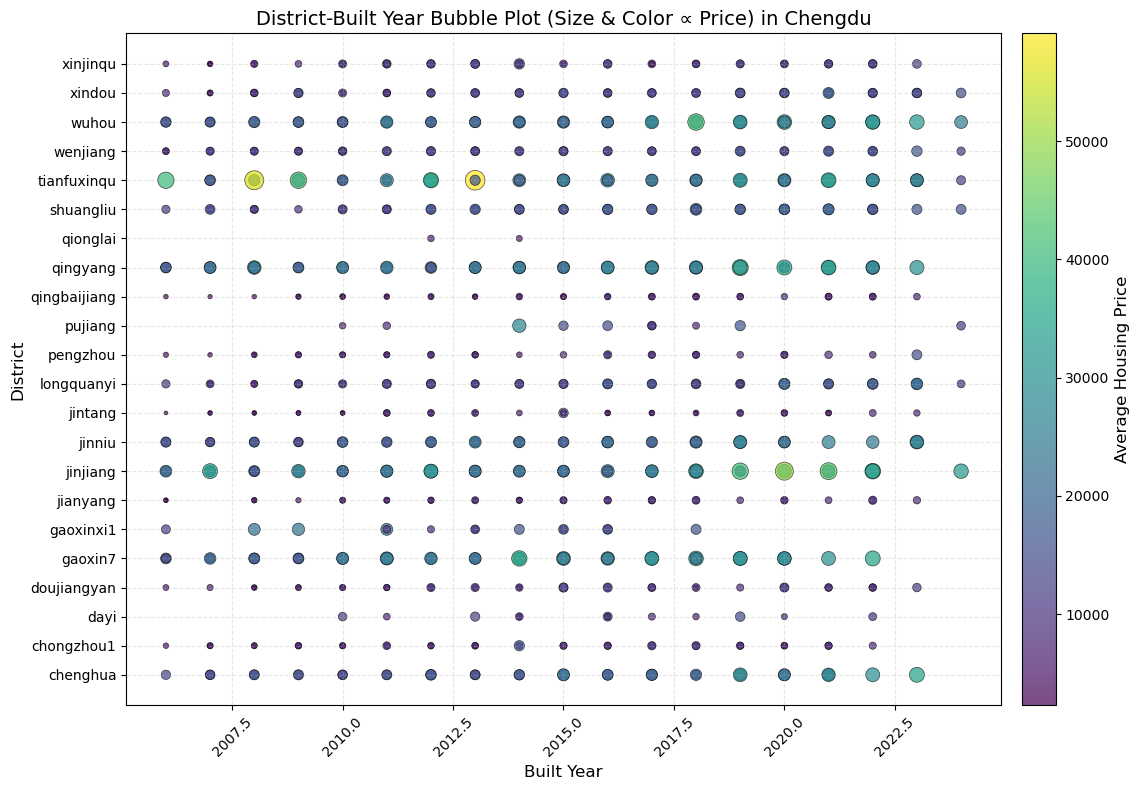

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

bubble_df = df.groupby(['district','built_year'], as_index=False)['price'].mean()
# 转 built_yeartime
bubble_df['built_year'] = bubble_df['built_year'].astype(int)

# 类别映射
cities = bubble_df['district'].unique().tolist()
mapping = {c:i for i,c in enumerate(cities)}
bubble_df['district_idx'] = bubble_df['district'].map(mapping)

# 气泡大小归一化到 [0, max_bubble]
max_bubble = 200
bubble_df['size'] = (bubble_df['price'] / bubble_df['price'].max()) * max_bubble

# 开白底
plt.style.use('default')
fig, ax = plt.subplots(figsize=(12,8))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# 画气泡
sc = ax.scatter(
    bubble_df['built_year'],
    bubble_df['district_idx'],
    s=bubble_df['size'],
    c=bubble_df['price'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='k',
    linewidth=0.5
)

# 坐标刻度
ax.set_yticks(list(mapping.values()))
ax.set_yticklabels(list(mapping.keys()), fontsize=10)
ax.set_xlabel('Built Year', fontsize=12)
ax.set_ylabel('District', fontsize=12)
plt.xticks(rotation=45)

# 网格 & 标题
ax.grid(True, linestyle='--', alpha=0.3)
ax.set_title('District-Built Year Bubble Plot (Size & Color ∝ Price) in Chengdu', fontsize=14)

# 颜色条
cbar = plt.colorbar(sc, ax=ax, pad=0.02)
cbar.set_label('Average Housing Price', fontsize=12)

plt.tight_layout()
plt.savefig('figs/district_built_year_bubble_plot.png', dpi=300)
plt.show()

### Correlation Matrix of the Features


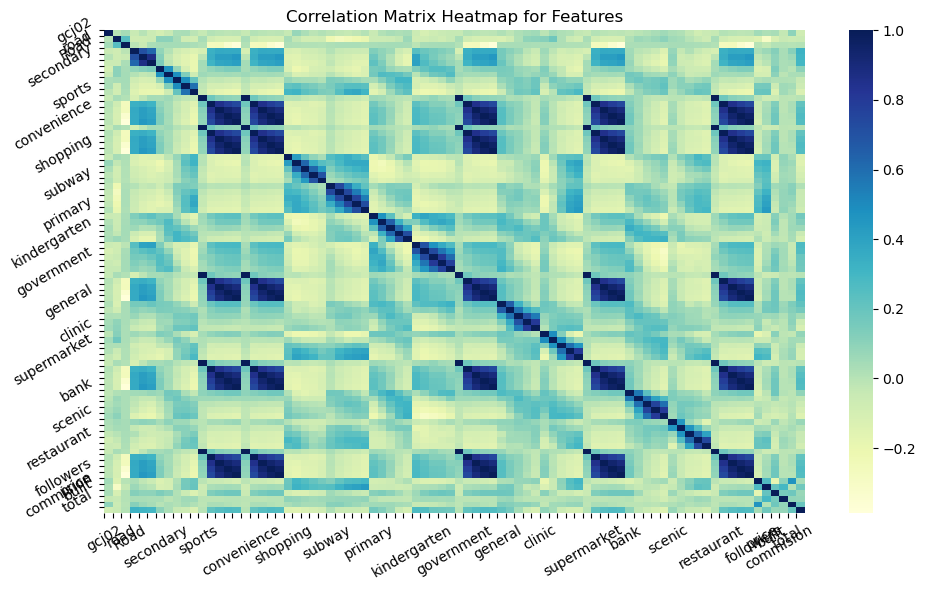

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
ax = sns.heatmap(corr, cmap='YlGnBu', annot=False, linewidths=0,
                 xticklabels=True, yticklabels=True)  # 确保全部 ticks 可见 :contentReference[oaicite:4]{index=4}

# 提取原始顺序及文本
xt = [lbl.get_text() for lbl in ax.get_xticklabels()]
yt = [lbl.get_text() for lbl in ax.get_yticklabels()]

# 构造 collapsed labels
def collapse_labels(labels):
    seen = set()
    new = []
    for txt in labels:
        grp = txt.split('_')[0]  # 提取组
        if grp not in seen:
            new.append(grp)
            seen.add(grp)
        else:
            new.append('')
    return new

new_xt = collapse_labels(xt)
new_yt = collapse_labels(yt)

# 强制同步 tick 位置与长度一致
ax.set_xticks(range(len(new_xt)))
ax.set_xticklabels(new_xt, rotation=30)

ax.set_yticks(range(len(new_yt)))
ax.set_yticklabels(new_yt, rotation=30)
plt.title('Correlation Matrix Heatmap for Features')
plt.tight_layout()
plt.savefig('figs/correlation_matrix.png')
plt.show()


### Regional Housing Parallel Coordinates Plot

In [3]:
city_list = df['district'].unique().tolist()
# city_list

In [10]:
YOUR_KEY = "1e4fd148f495f934a59cec725056d5e1"

In [ ]:
# import requests
# http://t0.tianditu.gov.cn/img_w/wmts?SERVICE=WMTS&REQUEST=GetTile&VERSION=1.0.0&LAYER=img&STYLE=default&TILEMATRIXSET=w&FORMAT=tiles&TILEMATRIX={z}&TILEROW={y}&TILECOL={x}&tk={YOUR_KEY}

#### 天地图调用示例

In [11]:
import cartopy.io.img_tiles as cimgt
# 天地图矢量
class TDT_vec(cimgt.GoogleWTS):
    def _image_url(self, tile):
        x, y, z = tile
        key = YOUR_KEY
        url = 'http://t0.tianditu.gov.cn/DataServer?T=vec_w&x=%s&y=%s&l=%s&tk=%s' % (x, y, z, key)
        return url

# 天地图遥感
class TDT_img(cimgt.GoogleWTS):
    def _image_url(self, tile):
        x, y, z = tile
        key = YOUR_KEY
        url = 'http://t0.tianditu.gov.cn/DataServer?T=img_w&x=%s&y=%s&l=%s&tk=%s' % (x, y, z, key)
        return url

# 天地图地形
class TDT_ter(cimgt.GoogleWTS):
    def _image_url(self, tile):
        x, y, z = tile
        key = YOUR_KEY
        url = 'http://t0.tianditu.gov.cn/DataServer?T=ter_w&x=%s&y=%s&l=%s&tk=%s' % (x, y, z, key)
        return url

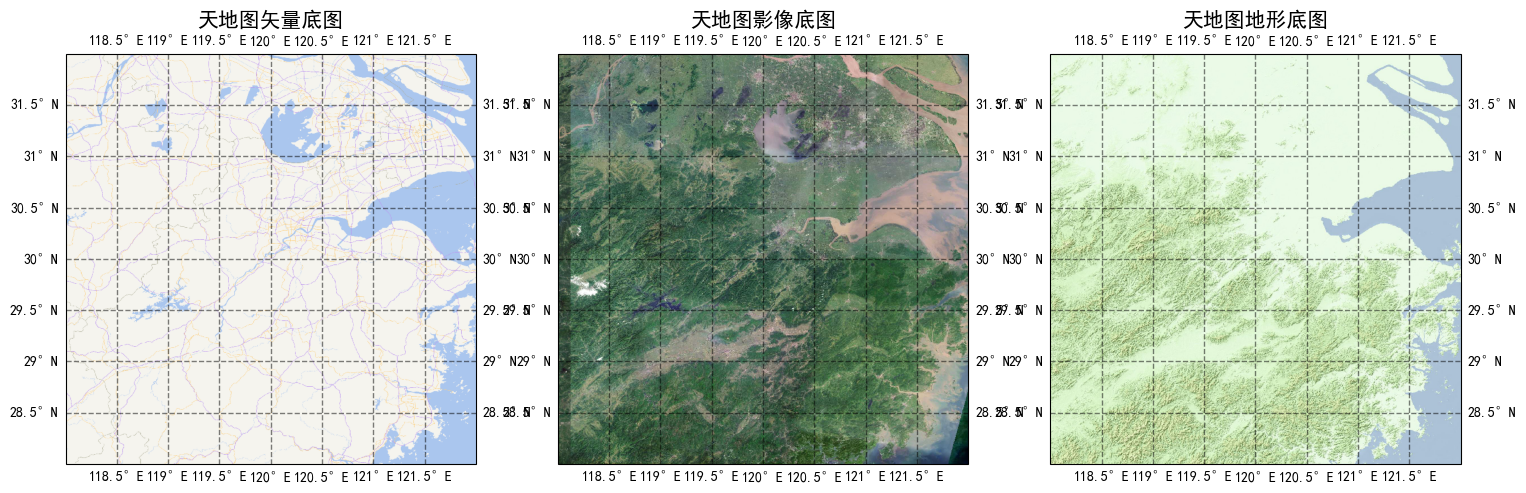

In [24]:
# 导入模块
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import cartopy.io.shapereader as shpreader
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

fig = plt.figure(figsize=(18, 12))

ax = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree())
ax.set_extent([118, 122, 28, 32],crs=ccrs.PlateCarree())
request = TDT_vec()
ax.add_image(request, 9)
ax.set_title('天地图矢量底图',fontsize=15)
gl = ax.gridlines(draw_labels=True, linewidth=1, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = gl.ylabels_right = False 
gl.xformatter = LONGITUDE_FORMATTER 
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree())
ax.set_extent([118, 122, 28, 32],crs=ccrs.PlateCarree())
request = TDT_img()
ax.add_image(request, 9)
ax.set_title('天地图影像底图',fontsize=15)
gl = ax.gridlines(draw_labels=True, linewidth=1, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = gl.ylabels_right = False 
gl.xformatter = LONGITUDE_FORMATTER 
gl.yformatter = LATITUDE_FORMATTER

ax = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree())
ax.set_extent([118, 122, 28, 32],crs=ccrs.PlateCarree())
request = TDT_ter()
ax.add_image(request, 9)
ax.set_title('天地图地形底图',fontsize=15)
gl = ax.gridlines(draw_labels=True, linewidth=1, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = gl.ylabels_right = False 
gl.xformatter = LONGITUDE_FORMATTER 
gl.yformatter = LATITUDE_FORMATTER
plt.show()

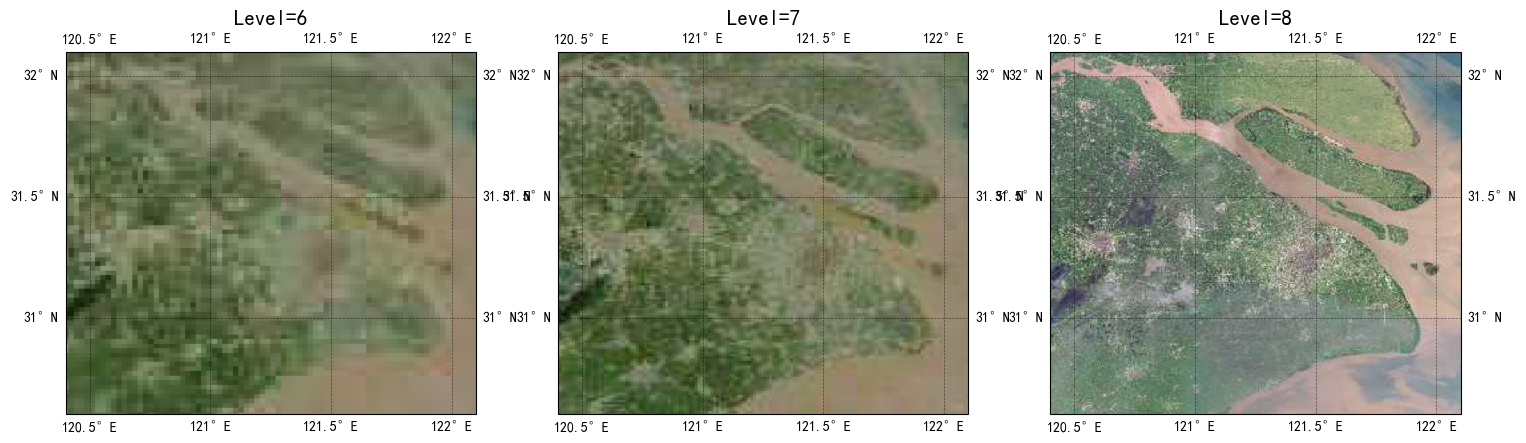

In [25]:
fig = plt.figure(figsize=(18, 12))
for i in range(6,9):
    ax = fig.add_subplot(1, 3, i-5, projection=ccrs.PlateCarree())
    ax.set_extent([120.4, 122.1, 30.6, 32.1],crs=ccrs.PlateCarree())
    request = TDT_img()
    ax.add_image(request, i)
    ax.set_title('Level='+str(i),fontsize=15)
    gl = ax.gridlines(xlocs=np.arange(120.5, 122.5, 0.5),
                      ylocs=np.arange(30, 32.5, 0.5),
                      draw_labels=True,linewidth = 0.5,color='k',
                      alpha=0.5,linestyle='--')
    gl.xlabels_top = gl.ylabels_right = False
plt.show()

#### Real Plot

In [13]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# ax.set_extent([102.5, 104.5, 29.5, 31.5], crs=ccrs.PlateCarree())
# ax.set_extent([102.9,104.88,30.08,31.5], crs=ccrs.PlateCarree())
ax.set_extent([103,104,30.5,31.5], crs=ccrs.PlateCarree())

request = TDT_img()
ax.add_image(request, 20)

NameError: name 'ccrs' is not defined

In [1]:
import geopandas as gpd
from shapely.geometry import Point
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [ ]:
# C:\Dataset\中国行政区矢量图\成都市行政区划图\成都市_市.shp

In [27]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.mask import mask
from shapely.geometry import Point
from scipy.interpolate import griddata
from rasterio.plot import plotting_extent
def save_city_price_contour_with_shp_check(
    df: pd.DataFrame,
    city_name: str,
    output_path: str,
    grid_res: int = 300,
    contour_levels: int = 15,
    shp_path: str = r"C:\Dataset\中国行政区矢量图\成都市行政区划图\成都行政区__加高新天府东区.shp"
):
    # 读取行政区 SHP（EPSG:3857）
    city_shp = gpd.read_file(shp_path).to_crs(epsg=3857)
    poly = city_shp.unary_union  # 合并所有 polygon

    # 读取并转换点数据
    df_city = df[df['district'].str.lower()==city_name.lower()].copy()
    if df_city.empty:
        raise ValueError(f"No data for city '{city_name}'")
    gdf = gpd.GeoDataFrame(
        df_city,
        geometry=[Point(xy) for xy in zip(df_city.gcj02_lng, df_city.gcj02_lat)],
        crs="EPSG:4326"
    ).to_crs(epsg=3857)

    # 过滤出在行政区内的点
    inside_mask = gdf.geometry.within(poly)
    if not inside_mask.any():
        raise ValueError(f"All points for city '{city_name}' are outside boundary!")
    gdf = gdf.loc[inside_mask]
    print(f"{len(gdf)} points within the boundary / {len(df_city)} total")

    # 插值网格
    minx, miny, maxx, maxy = gdf.total_bounds
    xi = np.linspace(minx, maxx, grid_res)
    yi = np.linspace(miny, maxy, grid_res)
    X, Y = np.meshgrid(xi, yi)
    Z = griddata(
        (gdf.geometry.x, gdf.geometry.y),
        gdf['price'],
        (X, Y),
        method='linear'
    )

    # 检查网格中心是否在多边形内
    sample_pt = Point(X.mean(), Y.mean())
    if not sample_pt.within(poly):
        print("⚠ WARNING: grid center is OUTSIDE the boundary. Check bounds!")

    # rasterIO 临时栅格 mask 插值
    transform = rasterio.transform.from_bounds(minx, miny, maxx, maxy, grid_res, grid_res)
    with rasterio.open(
        "C:/tmp/temp.tif", "w",
        driver="GTiff",
        height=grid_res, width=grid_res,
        count=1, dtype=Z.dtype,
        crs="EPSG:3857", transform=transform
    ) as tmp:
        tmp.write(Z, 1)
    # with rasterio.open("C:/tmp/temp.tif") as src:
        # out_image, out_transform = mask(src, [poly], crop=True)
    # extent = rasterio.plot.plotting_extent(src)
    fig, ax = plt.subplots(figsize=(10,10))
    # extent = plotting_extent(out_image[0], out_transform)
    # ax.imshow(out_image[0], extent=extent, cmap='gray', alpha=0.4)
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    ax.set_extent([minx, maxx, miny, maxy], crs=ccrs.PlateCarree())

    request = TDT_vec()
    ax.add_image(request, 20)
    # 绘图
    # fig, ax = plt.subplots(figsize=(10,10))
    # ax.imshow(out_image[0], transform=out_transform, cmap='gray', alpha=0.4)
    cs = ax.contourf(X, Y, Z, levels=contour_levels, cmap='viridis', alpha=0.6)
    cbar = fig.colorbar(cs, ax=ax, shrink=0.7)
    cbar.set_label('Price')

    gdf.plot(ax=ax, markersize=10, color='#b2df8a', alpha=0.7, label='Listings')
    ax.legend(frameon=True, title='Type', loc='lower right')
    ax.set_title(f"{city_name} Price Contour (SH Check)", fontsize=16)
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(output_path, dpi=300)
    plt.close()
    print(f"Saved to {output_path}")



In [28]:
for city in city_list[0]:
    save_city_price_contour_with_shp_check(df, city, f"figs/Price_contour_{city}.png")

C:\Users\Fisher Man\AppData\Local\Temp\ipykernel_19804\1173435274.py:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poly = city_shp.unary_union  # 合并所有 polygon


ValueError: No data for city 'j'

## Prepare Data

In [ ]:
# gcj02_lng gcj02_lat
city_center = [104.065861,30.657401] # 天府广场
city_subcenter = [104.066301,30.572961] # 成都市政府

def distance(lng, lat, city_center):
    """Haversine公式,采用地球平均半径6371km（适用于千米量级计算）,
    长距离计算建议改用Vincenty公式"""
    from math import radians, cos, sin, asin, sqrt
    lng1, lat1 = city_center
    lng2, lat2 = lng, lat
    lng1, lat1, lng2, lat2 = map(radians, [lng1, lat1, lng2, lat2])
    dlng = lng2 - lng1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

df['center_distance'] = df.apply(lambda x: distance(x['gcj02_lng'], x['gcj02_lat'], city_center), axis=1)
df['subcenter_distance'] = df.apply(lambda x: distance(x['gcj02_lng'], x['gcj02_lat'], city_subcenter), axis=1)

df.to_csv('POI_study.csv', index=False,encoding='utf-8-sig')

## ML Data

In [18]:
df = pd.read_csv('POI_study.csv')
df.dropna(inplace=True)
df.head()

Unnamed: 0  district                                             link  \
0           0  jinjiang     https://cd.lianjia.com/xiaoqu/3011052976570/   
1           1  jinjiang     https://cd.lianjia.com/xiaoqu/3011053437765/   
2           2  jinjiang     https://cd.lianjia.com/xiaoqu/1611061607677/   
3           3  jinjiang  https://cd.lianjia.com/xiaoqu/1620024208685305/   
4           4  jinjiang     https://cd.lianjia.com/xiaoqu/3011052642927/   

  district_CN      output_address   gcj02_lng  gcj02_lat  road_count  \
0         锦江区      四川省成都市锦江区皇经楼街道  104.108740  30.603456         3.0   
1         锦江区       四川省成都市锦江区上东家园  104.108157  30.599572         3.0   
2         锦江区  四川省成都市锦江区皇经楼新居二期B区  104.108489  30.590993         3.0   
3         锦江区  四川省成都市锦江区绿地中心468星朗  104.155499  30.602128         3.0   
4         锦江区   四川省成都市锦江区皇经楼二街68号  104.108362  30.592522         3.0   

   Road_1_distance  Road_2_distance  ...  electricity_type  \
0           22.479           33.509  ...                民电   
1           91.011          107.052  ...             商电/民电   
2           80.128          107.028  ...                民电   
3           58.242           62.030  ...             商电/民电   
4           79.791          111.436  ...                民电   

   property_management          developer    price  built_year  commision_fee  \
0                 首东置业                 -1   9819.0      2008.0          0.750   
1               业主自筹物业       成都千和物业发展有限公司  11030.0      2006.0          0.550   
2                 首东置业                 -1  11347.0      2013.0          0.625   
3       成都嘉诚新悦物业管理有限公司  绿地集团成都蜀峰房地产开发有限公司  11365.0      2020.0          3.940   
4        成都恒远房地产有限责任公司               无开发商  11540.0      2014.0          1.230   

   total_housing  total_buildings  center_distance  subcenter_distance  
0          313.0             12.0         7.267241            5.291570  
1          595.0              8.0         7.597801            4.980830  
2         2370.0              6.0         8.435901            4.508918  
3         1467.0              2.0        10.551437            9.133467  
4          430.0              3.0         8.281496            4.576324  

[5 rows x 98 columns]

In [3]:
# df.columns

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
import multiprocessing

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

threads = multiprocessing.cpu_count()-2

keep_cols = ['district',
       'gcj02_lng', 'gcj02_lat', 'road_count', 'Road_1_distance',
       'Road_2_distance', 'Road_3_distance', 'secondary_school_1_distance',
       'secondary_school_2_distance', 'secondary_school_3_distance',
       'secondary_school_4_distance', 'secondary_school_5_distance',
       'sports_recreation_1_distance', 'sports_recreation_2_distance',
       'sports_recreation_3_distance', 'sports_recreation_4_distance',
       'sports_recreation_5_distance', 'convenience_store_1_distance',
       'convenience_store_2_distance', 'convenience_store_3_distance',
       'convenience_store_4_distance', 'convenience_store_5_distance',
       'shopping_mall_1_distance', 'shopping_mall_2_distance',
       'shopping_mall_3_distance', 'shopping_mall_4_distance',
       'shopping_mall_5_distance', 'subway_station_1_distance',
       'subway_station_2_distance', 'subway_station_3_distance',
       'subway_station_4_distance', 'subway_station_5_distance',
       'primary_school_1_distance', 'primary_school_2_distance',
       'primary_school_3_distance', 'primary_school_4_distance',
       'primary_school_5_distance', 'kindergarten_1_distance',
       'kindergarten_2_distance', 'kindergarten_3_distance',
       'kindergarten_4_distance', 'kindergarten_5_distance',
       'government_office_1_distance', 'government_office_2_distance',
       'government_office_3_distance', 'government_office_4_distance',
       'government_office_5_distance', 'general_hospital_1_distance',
       'general_hospital_2_distance', 'general_hospital_3_distance',
       'general_hospital_4_distance', 'general_hospital_5_distance',
       'clinic_1_distance', 'clinic_2_distance', 'clinic_3_distance',
       'clinic_4_distance', 'clinic_5_distance', 'supermarket_1_distance',
       'supermarket_2_distance', 'supermarket_3_distance',
       'supermarket_4_distance', 'supermarket_5_distance', 'bank_1_distance',
       'bank_2_distance', 'bank_3_distance', 'bank_4_distance',
       'bank_5_distance', 'scenic_spot_1_distance', 'scenic_spot_2_distance',
       'scenic_spot_3_distance', 'scenic_spot_4_distance',
       'scenic_spot_5_distance', 'restaurant_1_distance',
       'restaurant_2_distance', 'restaurant_3_distance',
       'restaurant_4_distance', 'restaurant_5_distance', 'followers_count',
       'building_type', 'green_rate', 'floor_area_ratio',
       'electricity_type','center_distance', 'subcenter_distance',
       'built_year', 'commision_fee', 'total_housing', 'total_buildings']

X = df[keep_cols]

y = df['price']

print(X.shape, y.shape)
print(X.columns)
print(y.head())


(3171, 88) (3171,)
Index(['district', 'gcj02_lng', 'gcj02_lat', 'road_count', 'Road_1_distance',
       'Road_2_distance', 'Road_3_distance', 'secondary_school_1_distance',
       'secondary_school_2_distance', 'secondary_school_3_distance',
       'secondary_school_4_distance', 'secondary_school_5_distance',
       'sports_recreation_1_distance', 'sports_recreation_2_distance',
       'sports_recreation_3_distance', 'sports_recreation_4_distance',
       'sports_recreation_5_distance', 'convenience_store_1_distance',
       'convenience_store_2_distance', 'convenience_store_3_distance',
       'convenience_store_4_distance', 'convenience_store_5_distance',
       'shopping_mall_1_distance', 'shopping_mall_2_distance',
       'shopping_mall_3_distance', 'shopping_mall_4_distance',
       'shopping_mall_5_distance', 'subway_station_1_distance',
       'subway_station_2_distance', 'subway_station_3_distance',
       'subway_station_4_distance', 'subway_station_5_distance',
       'primar

In [20]:
"""
Data Wrangler 生成的单元格。
"""
import pandas as pd

def clean_data(X):
    # 独热编码列: 'electricity_type', 'building_type', 'district'
    for column in ['electricity_type', 'building_type', 'district']:
        insert_loc = X.columns.get_loc(column)
        X = pd.concat([X.iloc[:,:insert_loc], pd.get_dummies(X.loc[:, [column]]), X.iloc[:,insert_loc+1:]], axis=1)
    # object:20% ->float 0.20
    X['green_rate'] = X['green_rate'].str.replace('%', '').astype(float) / 100  
    X.fillna(-1, inplace=True)
    return X

X_clean = clean_data(X.copy())
# print(X_clean.head())
X_clean.head()


district_chenghua  district_chongzhou1  district_dayi  \
0              False                False          False   
1              False                False          False   
2              False                False          False   
3              False                False          False   
4              False                False          False   

   district_doujiangyan  district_gaoxin7  district_gaoxinxi1  \
0                 False             False               False   
1                 False             False               False   
2                 False             False               False   
3                 False             False               False   
4                 False             False               False   

   district_jianyang  district_jinjiang  district_jinniu  district_jintang  \
0              False               True            False             False   
1              False               True            False             False   
2              False               True            False             False   
3              False               True            False             False   
4              False               True            False             False   

   ...  electricity_type_-1  electricity_type_商电  electricity_type_商电/民电  \
0  ...                False                False                   False   
1  ...                False                False                    True   
2  ...                False                False                   False   
3  ...                False                False                    True   
4  ...                False                False                   False   

   electricity_type_民电  center_distance  subcenter_distance  built_year  \
0                 True         7.267241            5.291570      2008.0   
1                False         7.597801            4.980830      2006.0   
2                 True         8.435901            4.508918      2013.0   
3                False        10.551437            9.133467      2020.0   
4                 True         8.281496            4.576324      2014.0   

   commision_fee  total_housing  total_buildings  
0          0.750          313.0             12.0  
1          0.550          595.0              8.0  
2          0.625         2370.0              6.0  
3          3.940         1467.0              2.0  
4          1.230          430.0              3.0  

[5 rows x 127 columns]

## ML Part

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, median_absolute_error, r2_score,mean_absolute_percentage_error
import matplotlib.pyplot as plt
import pandas as pd
param_grids={
    'Ridge':{
        'ridge__alpha':[ 0.01, 0.1, 1, 10, 100,]
    },
    'Lasso':{
        'lasso__alpha':[ 0.01, 0.1, 1, 10, 100]
    },
    'ElasticNet':{
        'elasticnet__alpha':[ 0.01, 0.1, 1, 10],
        'elasticnet__l1_ratio':[0.1,0.3,0.5,0.7,0.9]
    },
    'SVR':{
        'svr__C': [0.01,0.1, 1, 10, 100],
        'svr__kernel': ['rbf'],
        'svr__gamma': [0.01,0.1, 1, 10, 100]
    },
    'Decision_Tree':{
        'decision_tree__max_depth': [2, 4, 6, 8, 10, 12, 14],
        'decision_tree__min_samples_split': [2, 5, 10, 20]
    },
    'Random_Forest':{
        'random_forest__max_depth': [2, 4, 6, 8, 10, 12, 14],
        'random_forest__min_samples_split': [2, 5, 10, 20],
        'random_forest__n_estimators': [10, 50, 100, 200]
    },
    'xgb':{
        'xgb__max_depth': [2, 4, 6, 8, 10, 12, 14],
        'xgb__min_child_weight': [1, 2, 3, 4, 5],
        'xgb__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
        'xgb__n_estimators': [10, 50, 100, 200]
    }
}
random_state= 2025
best_params = {
    'Ridge': {'ridge__alpha': [100]},
    'Lasso': {'lasso__alpha': [100]},
    'ElasticNet': {'elasticnet__alpha': [0.1], 'elasticnet__l1_ratio': [0.5]},
    'Decision_Tree': {'decision_tree__max_depth': [6], 'decision_tree__min_samples_split': [20]},
    'Random_Forest': {'random_forest__max_depth': [14], 'random_forest__min_samples_split': [2], 'random_forest__n_estimators': [200]},
    'xgb': {'xgb__learning_rate': [0.1], 'xgb__max_depth': [4], 'xgb__min_child_weight':[2], 'xgb__n_estimators': [200]}
}

param_grids = best_params

# Best Params
# N/A
# {'ridge__alpha': 100}
# {'lasso__alpha': 100}
# {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.5}
# {'decision_tree__max_depth': 6, 'decision_tree__min_samples_split': 20}
# {'random_forest__max_depth': 14, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 200}
# {'xgb__learning_rate': 0.1, 'xgb__max_depth': 4, 'xgb__min_child_weight': 2, 'xgb__n_estimators': 200}

models={
    'OLS': LinearRegression(),
    'Ridge': Ridge(random_state=random_state),
    'Lasso': Lasso(random_state=random_state),
    'ElasticNet': ElasticNet(random_state=random_state),
    # 'SVR':SVR(),
    'Decision_Tree': DecisionTreeRegressor(random_state=random_state),
    'Random_Forest': RandomForestRegressor(random_state=random_state),
    'xgb': xgb.XGBRegressor(random_state=random_state)
    
}


In [22]:
results = pd.DataFrame(columns=['Model', 'Best Params', 'RMSE', 'MAE', 'MeAE', 'R-squared'])
coef_df = pd.DataFrame()

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)
# 其他代码保持不变
print('Training set size:', X_train.shape)

Training set size: (2536, 127)


In [24]:
# 在循环中，修改模型名称与步骤名称的一致性
for name, model in models.items():
    print(f'Training {name} model...')
    if name in param_grids:
        # 创建管道
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (name.lower(), model)
        ])
        # 设置网格搜索
        grid = GridSearchCV(pipeline, param_grid=param_grids[name], cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error', refit=True)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        # 创建管道
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (name.lower(), model)
        ])
        pipeline.fit(X_train, y_train)
        best_model = pipeline
        best_params = 'N/A'
    print(f'Best {name} model parameters: {best_params}')
    
    # 在验证集上进行预测
    y_pred = best_model.predict(X_test)

    # 计算性能指标
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

    # 将结果添加到 DataFrame
    new_row = pd.DataFrame({
        'Model': [name],
        'Best Params': [best_params],
        'RMSE': [rmse],
        'MAE': [mae],
        'MeAE': [medae],
        'R-squared': [r2],
        'Adj. R-squared': [adj_r2],
        'MAPE': [mape]
    })
    results = pd.concat([results, new_row], ignore_index=True)

    # 如果模型具有系数属性，保存系数
    if hasattr(best_model.named_steps[name.lower()], 'coef_'):
        coef = best_model.named_steps[name.lower()].coef_
        coef_df[name] = coef

# 设置系数 DataFrame 的索引
coef_df.index = X_clean.columns
coef_df.index.name = 'Variables'

# 输出结果
print(results)
print(coef_df)

import os
coef_df_tr = coef_df.transpose()
os.makedirs('./output', exist_ok=True)
coef_df_tr.to_csv(f'./output/coef_df_tr.csv')
results.to_csv(f'./output/results.csv')
print(f'Coef DataFrame and Results saved to output/*.csv')

Training OLS model...
Best OLS model parameters: N/A
Training Ridge model...


C:\Users\Fisher Man\AppData\Local\Temp\ipykernel_20704\1629803302.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


Best Ridge model parameters: {'ridge__alpha': 100}
Training Lasso model...
Best Lasso model parameters: {'lasso__alpha': 100}
Training ElasticNet model...


c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.355e+10, tolerance: 2.298e+07
  model = cd_fast.enet_coordinate_descent(


Best ElasticNet model parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.5}
Training Decision_Tree model...
Best Decision_Tree model parameters: {'decision_tree__max_depth': 6, 'decision_tree__min_samples_split': 20}
Training Random_Forest model...
Best Random_Forest model parameters: {'random_forest__max_depth': 14, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 200}
Training xgb model...
Best xgb model parameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 4, 'xgb__min_child_weight': 2, 'xgb__n_estimators': 200}
           Model                                        Best Params  \
0            OLS                                                N/A   
1          Ridge                              {'ridge__alpha': 100}   
2          Lasso                              {'lasso__alpha': 100}   
3     ElasticNet  {'elasticnet__alpha': 0.1, 'elasticnet__l1_rat...   
4  Decision_Tree  {'decision_tree__max_depth': 6, 'decision_tree...   
5  Random_Fore

### SHAP Analysis



In [23]:
best_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=200)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [ ]:
X_train.sort_order()

一、地理区位特征（总重要性 4,817）

城市中心距离：3930 + 446 
subcenter_distance (3,930)
center_distance (446)
轨道交通：338+158
subway_station_4_distance (338)
subway_station_5_distance (158)

二、行政区划特征（总重要性 1,115）

青羊区 district_qingyang (264)
天府新区 district_tianfuxinqu (262)
锦江区 district_jinjiang (205)
双流区 district_shuangliu (187)
高新区 district_gaoxin7 (140)
三、社区特征（总重要性 2,735 + 2464 + 879 = 6078）

基本属性：
built_year (672)
floor_area_ratio (198)
green_rate (133)
关注度：
followers_count (483)
建筑类型：
板楼/塔板结合 (91)
板楼 (43)

commision_fee (2,464) # 需确认业务含义
total_housing (879) # 需确认业务含义

四、POI设施（按类型聚合）97 + 95 + 105 + 93 + 83 + 68 + 255 + 149 + 166 + 126 = 1237

教育设施：
primary_school_3_distance (97)
kindergarten_5_distance (95)
商业配套：
shopping_mall_4_distance (105)
shopping_mall_2_distance (93)
金融服务：
bank_3_distance (83)
bank_1_distance (68)
医疗服务：
clinic_5_distance (255)
clinic_3_distance (149)
文体设施：
sports_recreation_2_distance (166)
scenic_spot_4_distance (126)
五、特殊发现

坐标系影响：
gcj02_lat (226)
gcj02_lng (203)
异常特征：


In [ ]:
from PIL import Image, ImageDraw, ImageFont

# 📌 路径请保持一致，含百分号和完整目录
paths = [
    r"C:\Users\Fisher Man\OneDrive\Desktop\Work Sheet\Py\Some Projects\Urban_Econ\Eassay3\HousingPriceCrawler\figs\percentile_20%.png",
    r"C:\Users\Fisher Man\OneDrive\Desktop\Work Sheet\Py\Some Projects\Urban_Econ\Eassay3\HousingPriceCrawler\figs\percentile_40%.png",
    r"C:\Users\Fisher Man\OneDrive\Desktop\Work Sheet\Py\Some Projects\Urban_Econ\Eassay3\HousingPriceCrawler\figs\percentile_60%.png",
    r"C:\Users\Fisher Man\OneDrive\Desktop\Work Sheet\Py\Some Projects\Urban_Econ\Eassay3\HousingPriceCrawler\figs\percentile_80%.png"
]
subtitles = ["(1) 20th Percentile", "(2) 40th Percentile", "(3) 60th Percentile", "(4) 80th Percentile"]

# 加载图片并统一尺寸
images = [Image.open(p) for p in paths]
max_w = max(img.width for img in images)
max_h = max(img.height for img in images)
images = [img.resize((max_w, max_h), Image.Resampling.LANCZOS) for img in images]

# 设置标题与子标题字体与区域高度
title_text = "Percentile Housing Price SHAP Contribution"
title_h = 100
subtitle_h = 40  # 给子标题留空间
cell_h = max_h + subtitle_h
final_w = 2 * max_w
final_h = title_h + 2 * cell_h

# 新建画布
canvas = Image.new('RGB', (final_w, final_h), (255, 255, 255))
draw = ImageDraw.Draw(canvas)

# 加载字体
try:
    font_title = ImageFont.truetype("arial.ttf", 40)
    font_sub = ImageFont.truetype("arial.ttf", 24)
except IOError:
    font_title = ImageFont.load_default()
    font_sub = ImageFont.load_default()

# 绘制主标题（居中）使用 textbbox :contentReference[oaicite:3]{index=3}
bbox = draw.textbbox((0, 0), title_text, font=font_title)
tw, th = bbox[2] - bbox[0], bbox[3] - bbox[1]
draw.text(
    ((final_w - tw)//2, (title_h - th)//2),
    title_text,
    fill="black",
    font=font_title
)

# 粘贴子图并写子标题
for idx, img in enumerate(images):
    row = idx // 2
    col = idx % 2
    x0 = col * max_w
    y0 = title_h + row * cell_h
    canvas.paste(img, (x0, y0))
    # 子标题居中绘制于子图下方区域中央
    sub = subtitles[idx]
    bbox2 = draw.textbbox((0,0), sub, font=font_sub)
    sw, sh = bbox2[2]-bbox2[0], bbox2[3]-bbox2[1]
    draw.text(
        (x0 + (max_w - sw)//2, y0 + max_h + (subtitle_h - sh)//2),
        sub,
        fill="black",
        font=font_sub
    )

# 保存
output = r"C:\Users\Fisher Man\OneDrive\Desktop\Work Sheet\Py\Some Projects\Urban_Econ\Eassay3\HousingPriceCrawler\figs\merged_housing_prices_with_titles.png"
canvas.save(output)
print(f"合并图片已保存为：{output}")


合并图片已保存为：C:\Users\Fisher Man\OneDrive\Desktop\Work Sheet\Py\Some Projects\Urban_Econ\Eassay3\HousingPriceCrawler\figs\merged_housing_prices_with_titles.png


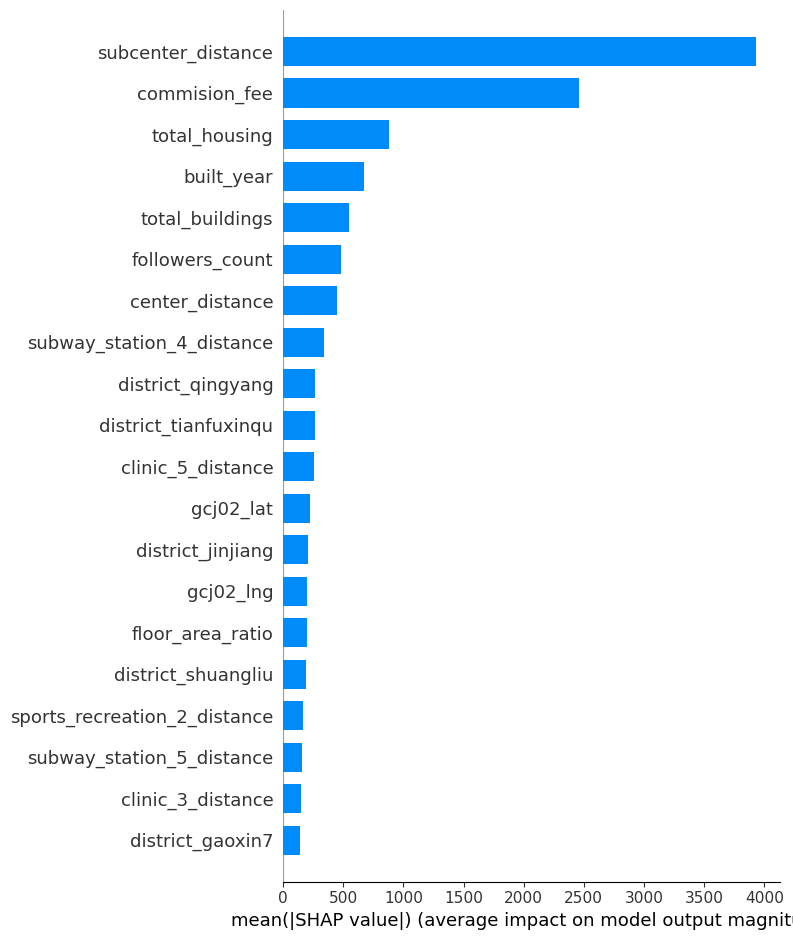

In [30]:
import shap

# 使用 TreeExplainer 替代 shap.Explainer
explainer = shap.TreeExplainer(best_model)

# 对数据集进行抽样，例如取1000个样本
# X_train_sample = X_train.sample(n=1000)

# 计算SHAP值，这里使用抽样的数据集
shap_values = explainer.shap_values(X_train)

# 可视化SHAP值
# SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_train.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df.to_csv('SHAP_feature_importance.csv', index=False)

In [52]:

# 创建一个解释器
explainer = shap.Explainer(best_model)

# 计算SHAP值
shap_values = explainer(X_clean)  # X是您的数据集


In [77]:
plt.close()

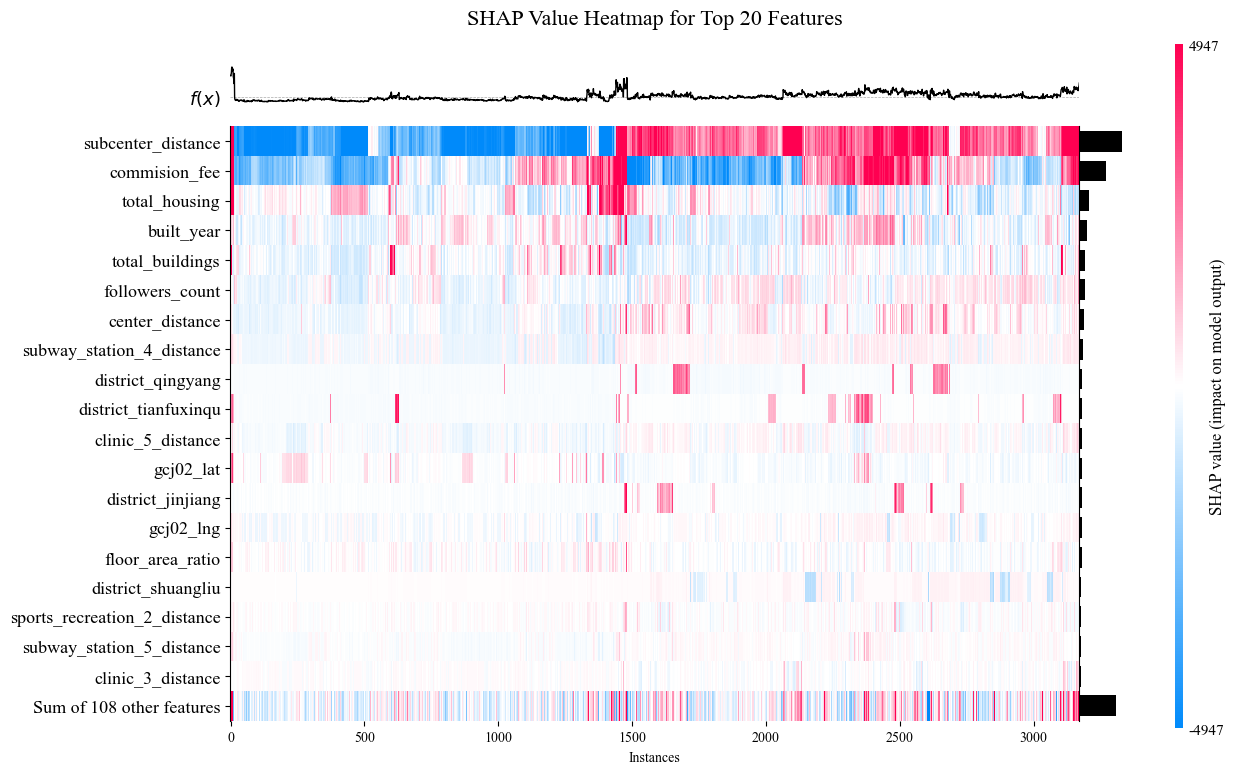

In [78]:
import matplotlib.pyplot as plt
import shap

fig, ax = plt.subplots(figsize=(12, 8))
shap.plots.heatmap(shap_values, max_display=20, ax=ax, show=False)

ax.set_title("SHAP Value Heatmap for Top 20 Features", fontsize=16, pad=20)

fig.tight_layout()
fig.savefig("SHAP_Value_Heatmap.png", dpi=150, bbox_inches='tight')
plt.show()


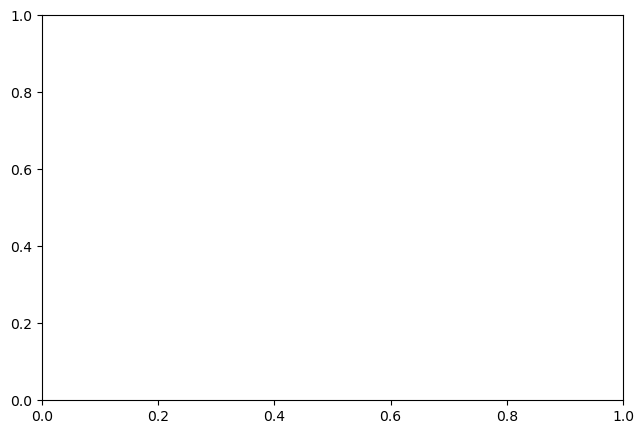

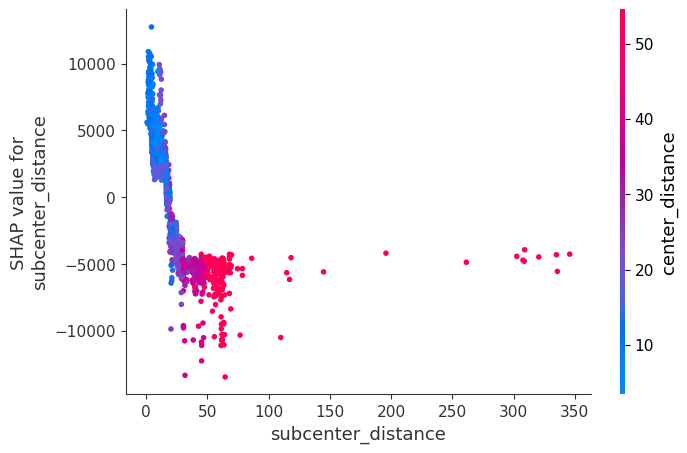

In [60]:
shap.dependence_plot(
    'subcenter_distance',
    shap_values.values,   # 或者 shap_values[: , 'subcenter_distance']
    X_clean,              # 原始特征 DataFrame
    interaction_index='center_distance'
)


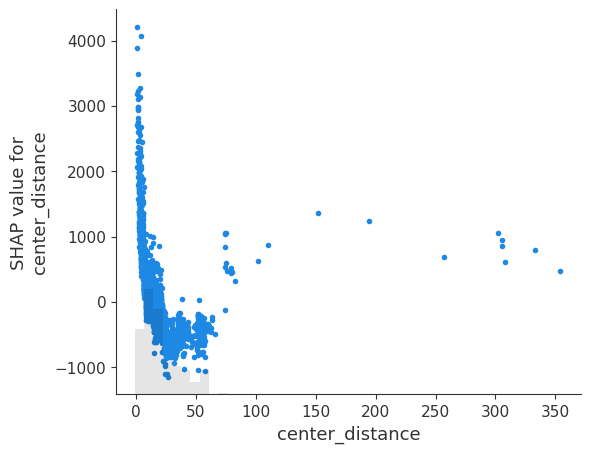

In [50]:
shap.plots.scatter(shap_values[:,'center_distance'], ylabel="SHAP value\n(higher means more likely to Higher Price)")


In [41]:
percentiles = [0.2, 0.4, 0.6, 0.8]
price_quants = np.quantile(y_train, percentiles)

# 为每个分位数找到最接近的样本索引
idxs = [ (y_train - q).abs().idxmin() for q in price_quants ]

# 显示这几个索引
print("Selected rows at quantiles:", idxs)

Selected rows at quantiles: [2485, 1489, 1665, 480]


In [38]:
# shap.plots.waterfall(shap_values[idxs[0]], max_display=14)

In [5]:
# !pip install --upgrade pillow


In [13]:
from PIL import Image, ImageDraw, ImageFont

# 📌 路径请保持一致，含百分号和完整目录
paths = [
    r"C:\Users\Fisher Man\OneDrive\Desktop\Work Sheet\Py\Some Projects\Urban_Econ\Eassay3\HousingPriceCrawler\figs\percentile_20%.png",
    r"C:\Users\Fisher Man\OneDrive\Desktop\Work Sheet\Py\Some Projects\Urban_Econ\Eassay3\HousingPriceCrawler\figs\percentile_40%.png",
    r"C:\Users\Fisher Man\OneDrive\Desktop\Work Sheet\Py\Some Projects\Urban_Econ\Eassay3\HousingPriceCrawler\figs\percentile_60%.png",
    r"C:\Users\Fisher Man\OneDrive\Desktop\Work Sheet\Py\Some Projects\Urban_Econ\Eassay3\HousingPriceCrawler\figs\percentile_80%.png"
]
subtitles = ["(1) 20th Percentile", "(2) 40th Percentile", "(3) 60th Percentile", "(4) 80th Percentile"]

# 加载图片并统一尺寸
images = [Image.open(p) for p in paths]
max_w = max(img.width for img in images)
max_h = max(img.height for img in images)
images = [img.resize((max_w, max_h), Image.Resampling.LANCZOS) for img in images]

# 设置标题与子标题字体与区域高度
title_text = "Percentile Housing Price SHAP Contribution"
title_h = 100
subtitle_h = 40  # 给子标题留空间
cell_h = max_h + subtitle_h
final_w = 2 * max_w
final_h = title_h + 2 * cell_h

# 新建画布
canvas = Image.new('RGB', (final_w, final_h), (255, 255, 255))
draw = ImageDraw.Draw(canvas)

# 加载字体
try:
    font_title = ImageFont.truetype("arial.ttf", 40)
    font_sub = ImageFont.truetype("arial.ttf", 24)
except IOError:
    font_title = ImageFont.load_default()
    font_sub = ImageFont.load_default()

# 绘制主标题（居中）使用 textbbox :contentReference[oaicite:3]{index=3}
bbox = draw.textbbox((0, 0), title_text, font=font_title)
tw, th = bbox[2] - bbox[0], bbox[3] - bbox[1]
draw.text(
    ((final_w - tw)//2, (title_h - th)//2),
    title_text,
    fill="black",
    font=font_title
)

# 粘贴子图并写子标题
for idx, img in enumerate(images):
    row = idx // 2
    col = idx % 2
    x0 = col * max_w
    y0 = title_h + row * cell_h
    canvas.paste(img, (x0, y0))
    # 子标题居中绘制于子图下方区域中央
    sub = subtitles[idx]
    bbox2 = draw.textbbox((0,0), sub, font=font_sub)
    sw, sh = bbox2[2]-bbox2[0], bbox2[3]-bbox2[1]
    draw.text(
        (x0 + (max_w - sw)//2, y0 + max_h + (subtitle_h - sh)//2),
        sub,
        fill="black",
        font=font_sub
    )

# 保存
output = r"C:\Users\Fisher Man\OneDrive\Desktop\Work Sheet\Py\Some Projects\Urban_Econ\Eassay3\HousingPriceCrawler\figs\merged_housing_prices_with_titles.png"
canvas.save(output)
print(f"合并图片已保存为：{output}")


合并图片已保存为：C:\Users\Fisher Man\OneDrive\Desktop\Work Sheet\Py\Some Projects\Urban_Econ\Eassay3\HousingPriceCrawler\figs\merged_housing_prices_with_titles.png


In [42]:
plt.close()

In [72]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Microsoft YaHei'  # 或 DejaVu Sans
plt.rcParams['axes.unicode_minus'] = False       # 正常显示负号

for i, percentile in enumerate(percentiles):
    idx = idxs[i]

    # 创建新图（必须）
    plt.figure(figsize=(10, 5))

    # 绘制 SHAP waterfall 图
    shap.plots.waterfall(shap_values[idx], max_display=14, show=False)

    # 设置标题
    plt.title(f'Percentile: {percentile * 100:.0f}%')

    # 保存图像
    plt.savefig(f'percentile_{percentile * 100:.0f}%.png', bbox_inches='tight', dpi=150)

    # 关闭当前图
    plt.close()


c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


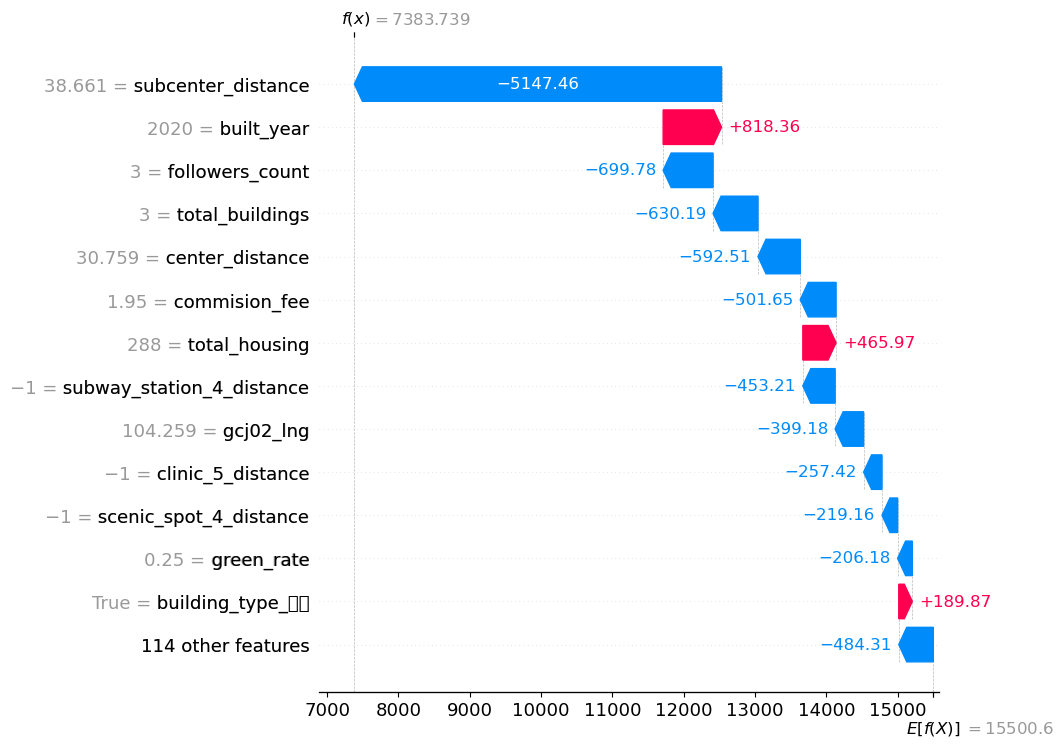

In [63]:
shap.plots.waterfall(shap_values[idxs[0]], max_display=14)

In [13]:
# import java
shap.initjs()
# 价格可以从20% 40% 60% 80% 这几个档位来看力量图
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])
shap.waterfall_plot(explainer.expected_value, shap_values[0], X_train.iloc[0,:])


TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.


district_chenghua



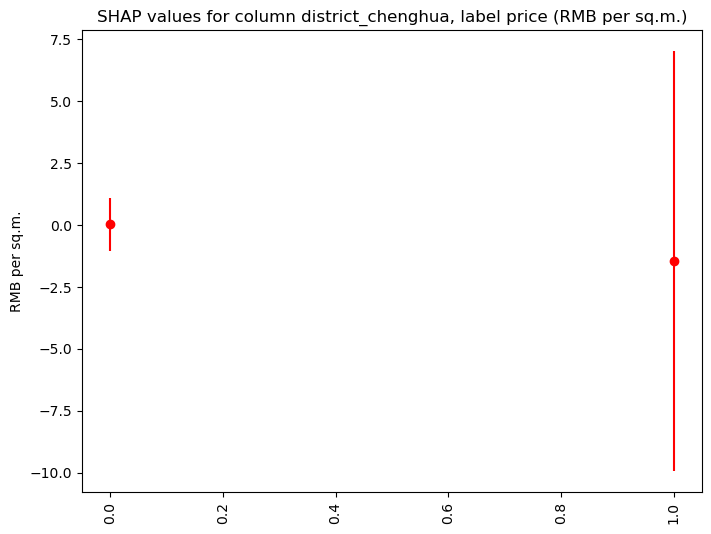

         gain  gain_std  count
col                           
False  0.0264    1.0748   2323
True  -1.4619    8.4754    213

district_chongzhou1



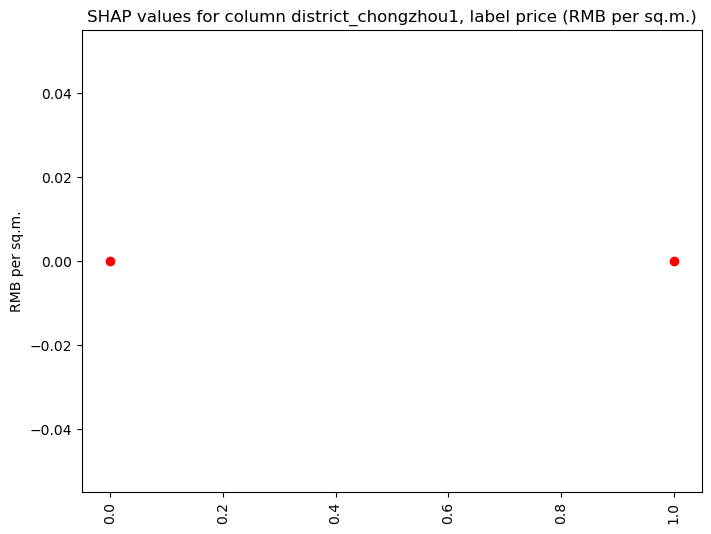

       gain  gain_std  count
col                         
False   0.0       0.0   2466
True    0.0       0.0     70

district_dayi



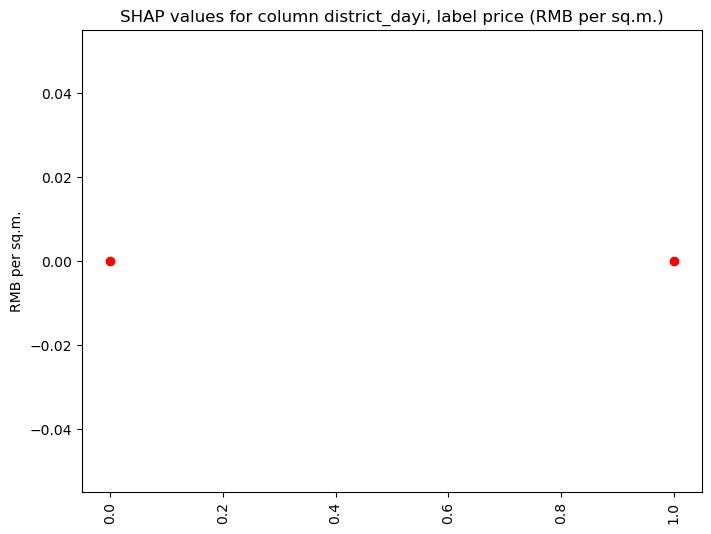

       gain  gain_std  count
col                         
False   0.0       0.0   2522
True    0.0       0.0     14

district_doujiangyan



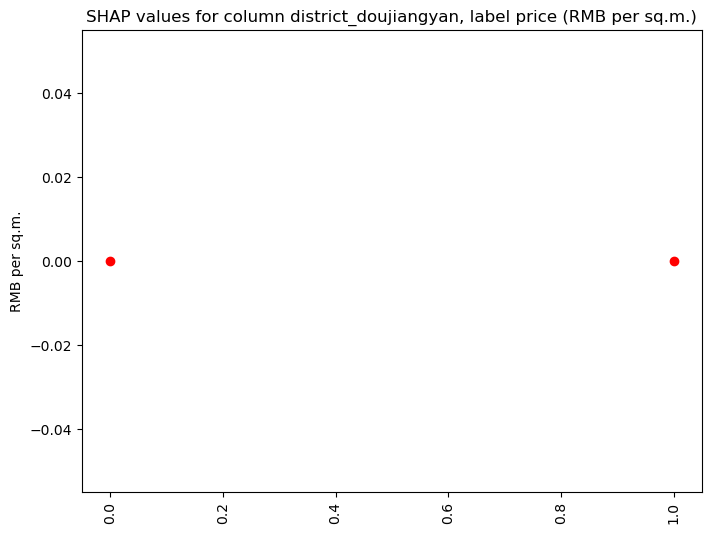

       gain  gain_std  count
col                         
False   0.0       0.0   2409
True    0.0       0.0    127

district_gaoxin7



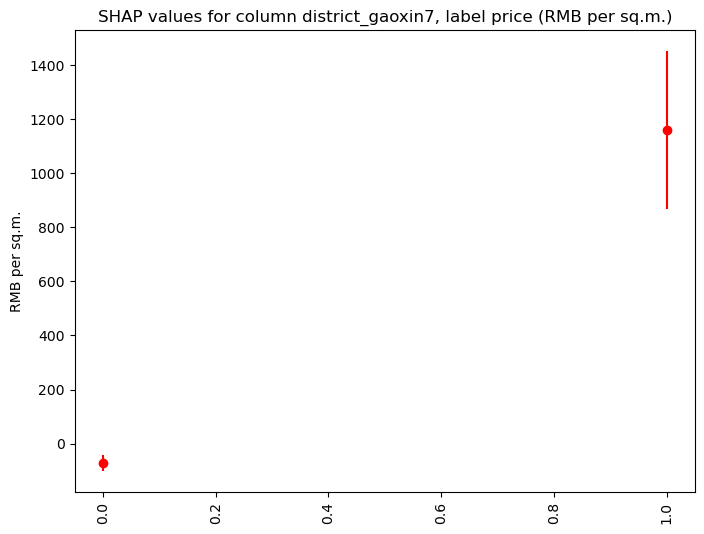

              gain    gain_std  count
col                                  
True   1158.946289  291.695496    161
False   -70.910202   30.401400   2375

district_gaoxinxi1



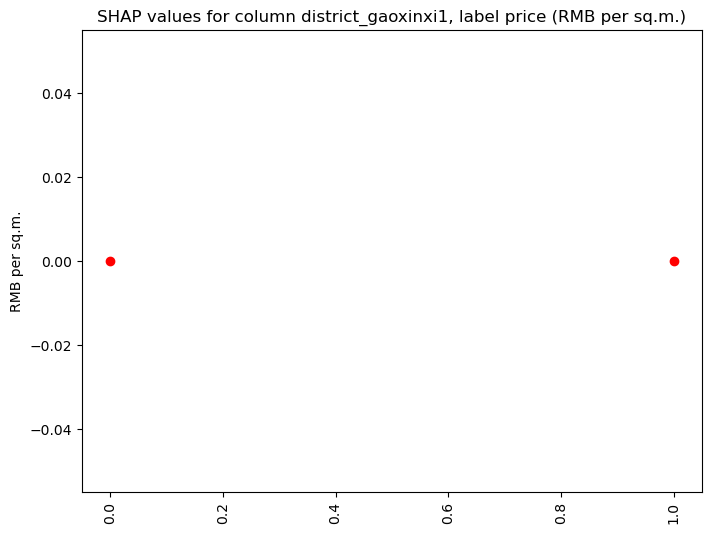

       gain  gain_std  count
col                         
False   0.0       0.0   2512
True    0.0       0.0     24

district_jianyang



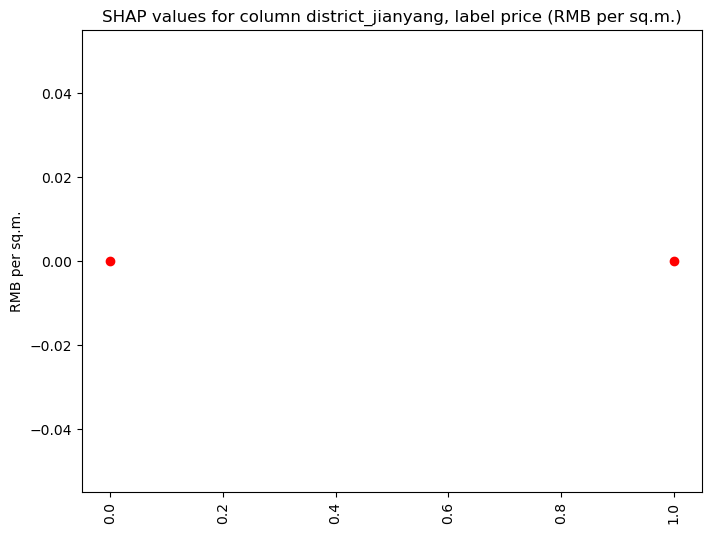

       gain  gain_std  count
col                         
False   0.0       0.0   2441
True    0.0       0.0     95

district_jinjiang



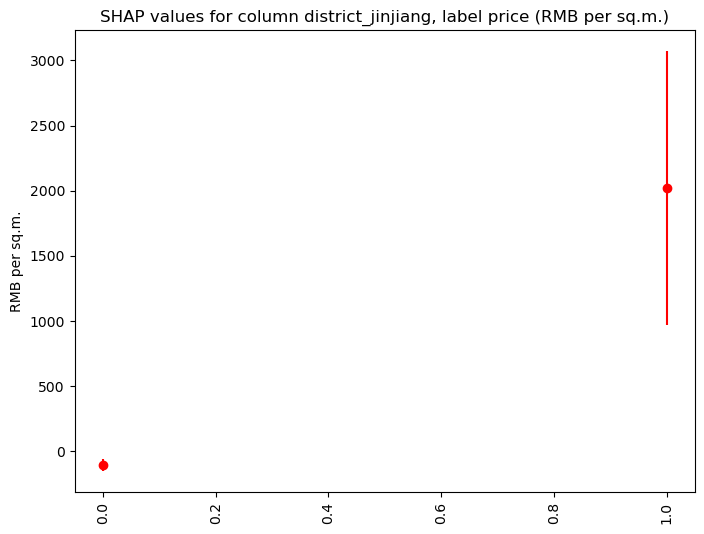

              gain     gain_std  count
col                                   
True   2018.531982  1052.498291    132
False  -105.552696    47.770500   2404

district_jinniu



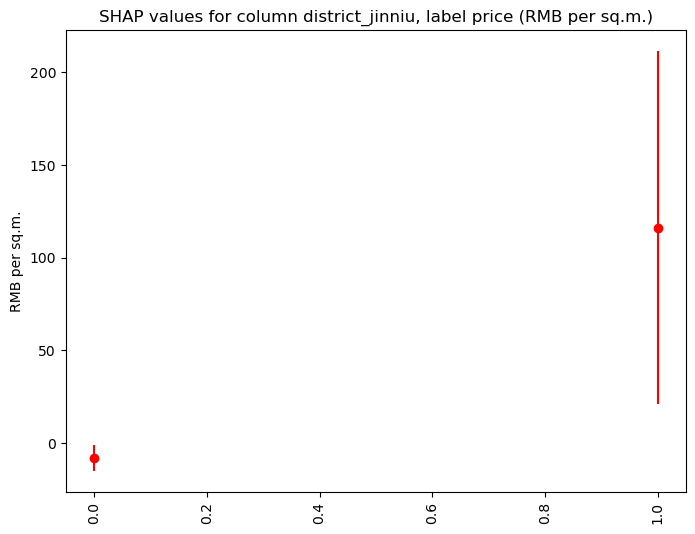

             gain   gain_std  count
col                                
True   116.094299  95.315697    171
False   -8.245800   6.948700   2365

district_jintang



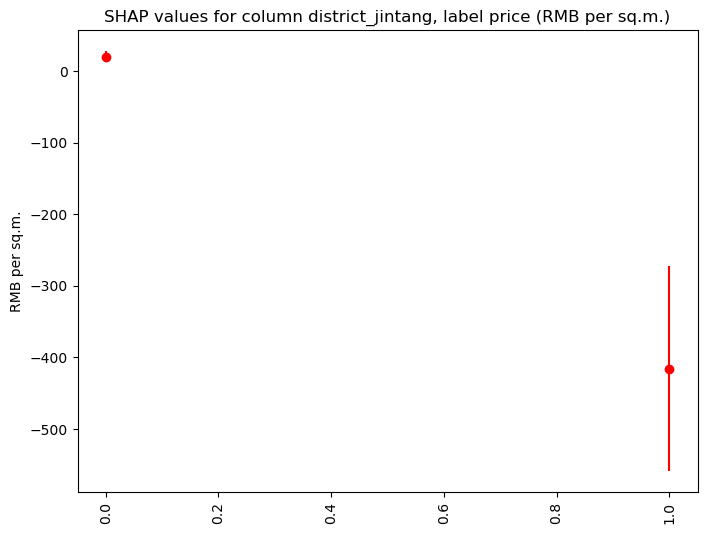

             gain    gain_std  count
col                                 
False   20.058201    7.857200   2445
True  -415.757996  143.359406     91

district_longquanyi



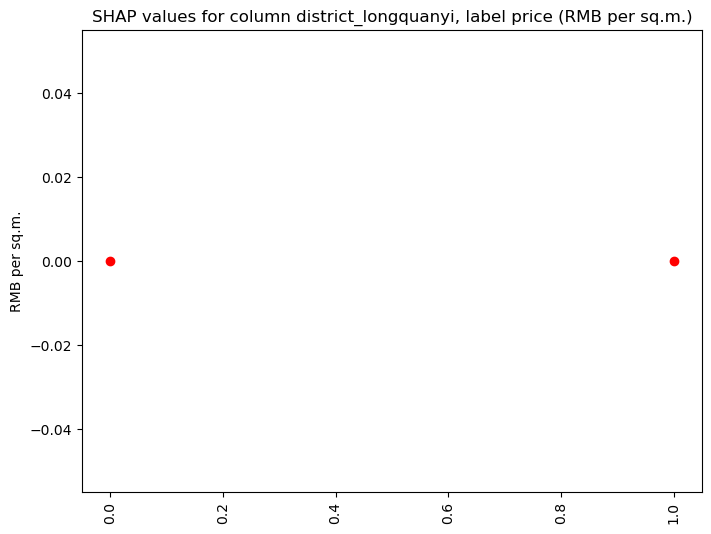

       gain  gain_std  count
col                         
False   0.0       0.0   2377
True    0.0       0.0    159

district_pengzhou



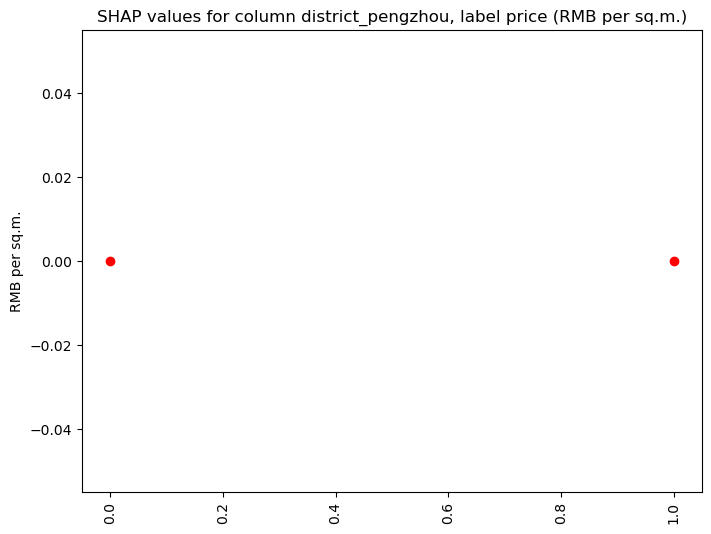

       gain  gain_std  count
col                         
False   0.0       0.0   2477
True    0.0       0.0     59

district_pujiang



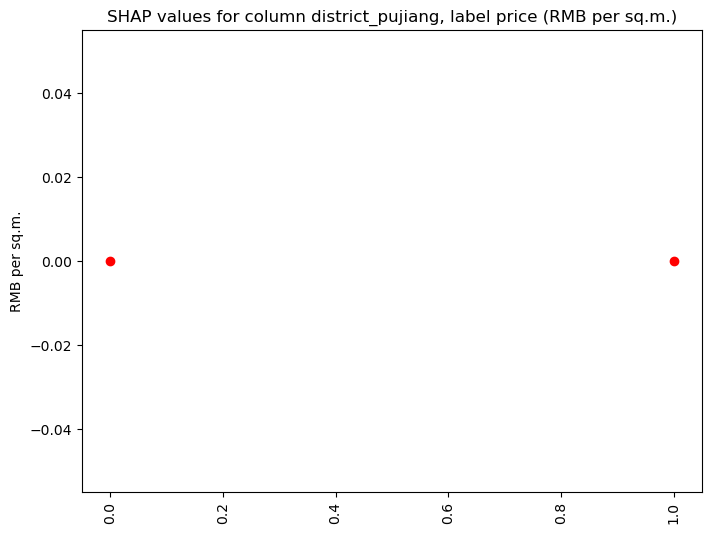

       gain  gain_std  count
col                         
False   0.0       0.0   2525
True    0.0       0.0     11

district_qingbaijiang



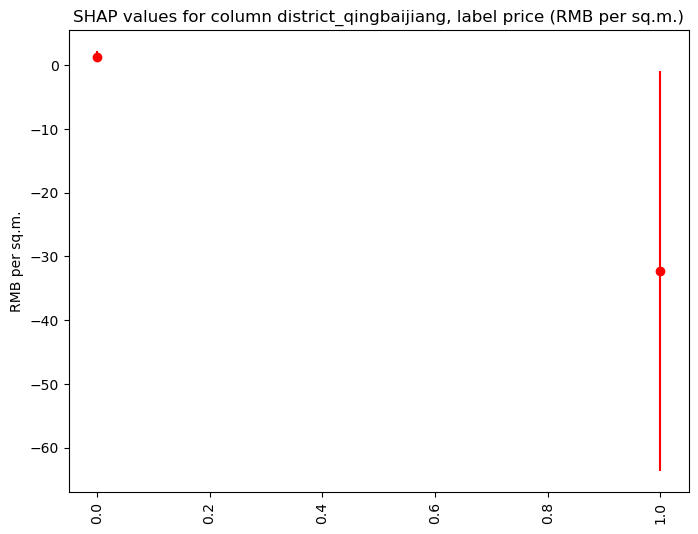

            gain  gain_std  count
col                              
False   1.317900    0.8722   2455
True  -32.316399   31.3459     81

district_qingyang



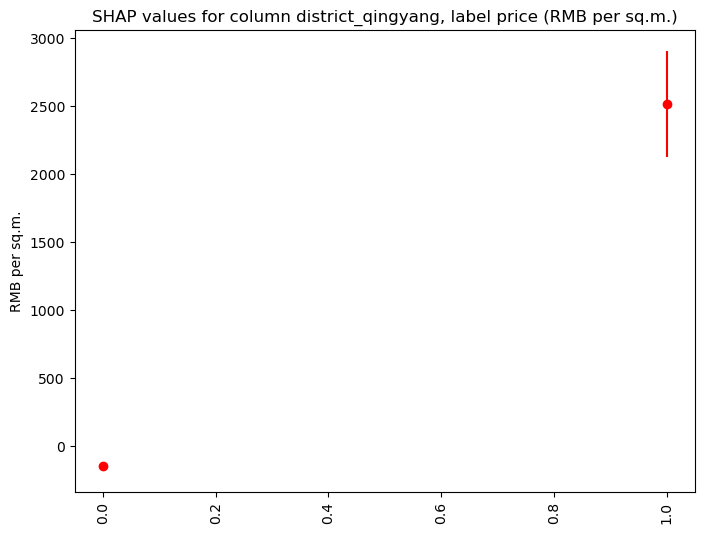

              gain    gain_std  count
col                                  
True   2515.371582  390.528198    121
False  -150.759995   35.464298   2415

district_qionglai



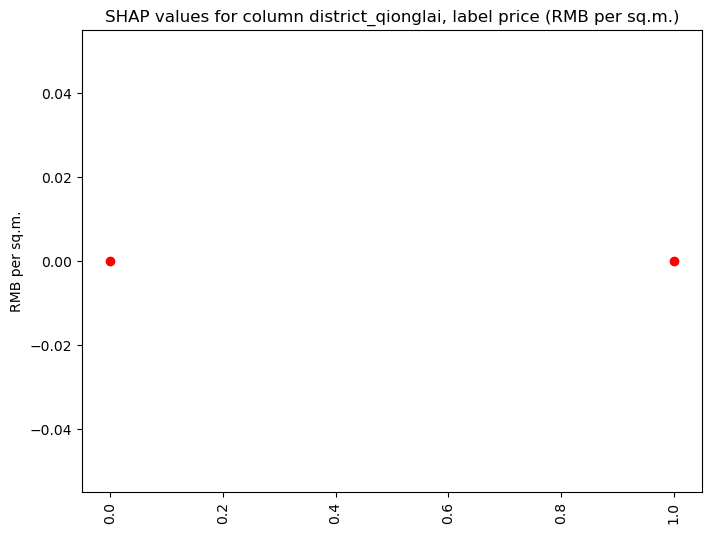

       gain  gain_std  count
col                         
False   0.0       0.0   2534
True    0.0       0.0      2

district_shuangliu



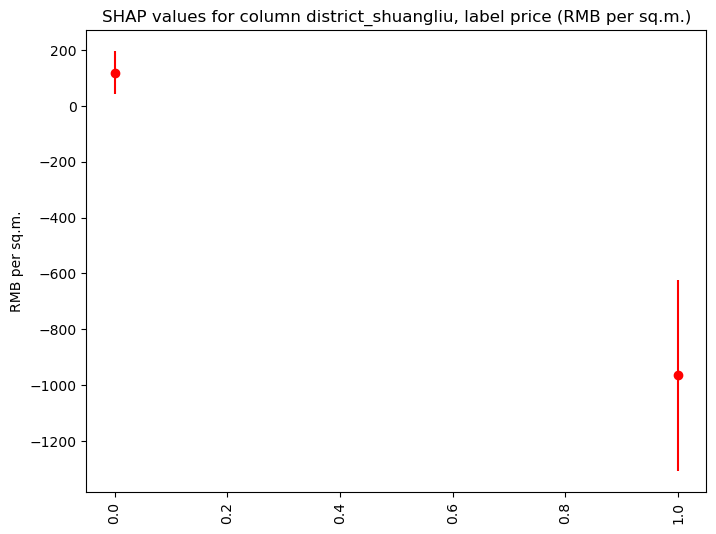

             gain    gain_std  count
col                                 
False  119.128799   77.105103   2332
True  -965.713623  342.789093    204

district_tianfuxinqu



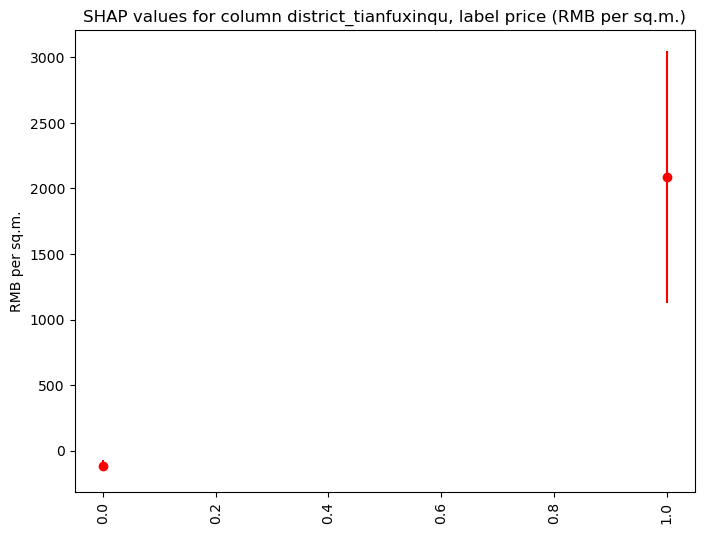

              gain    gain_std  count
col                                  
True   2084.969238  961.932007    189
False  -114.671898   41.365601   2347

district_wenjiang



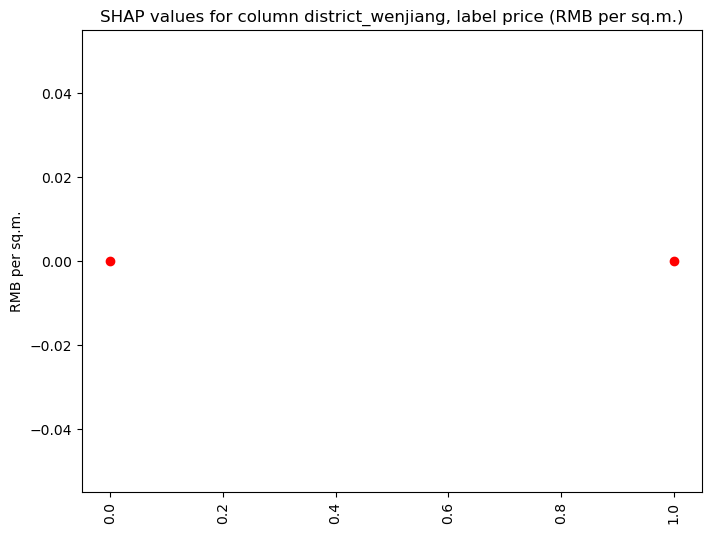

       gain  gain_std  count
col                         
False   0.0       0.0   2344
True    0.0       0.0    192

district_wuhou



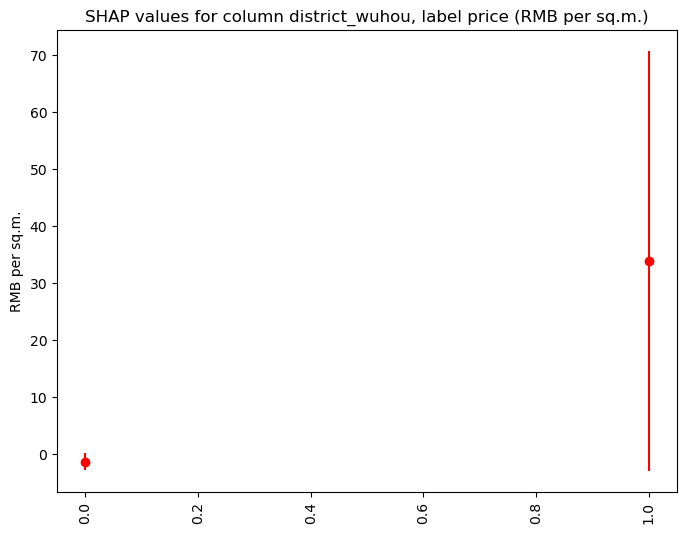

            gain   gain_std  count
col                               
True   33.867001  36.878899    165
False  -1.388000   1.485300   2371

district_xindou



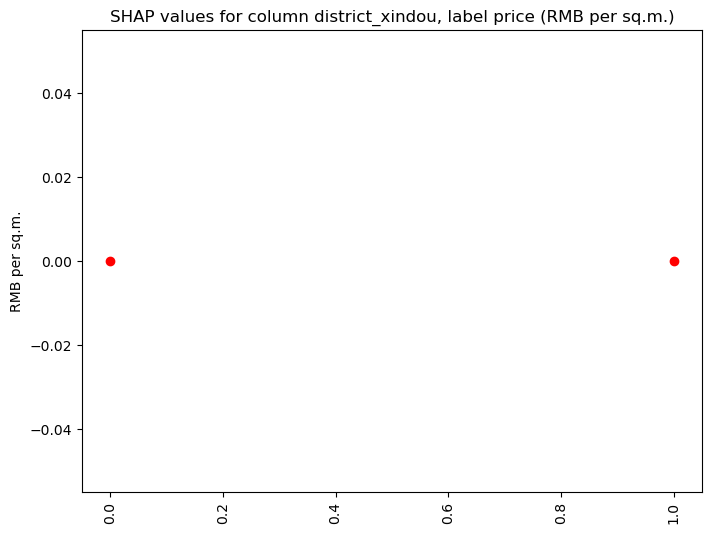

       gain  gain_std  count
col                         
False   0.0       0.0   2364
True    0.0       0.0    172

district_xinjinqu



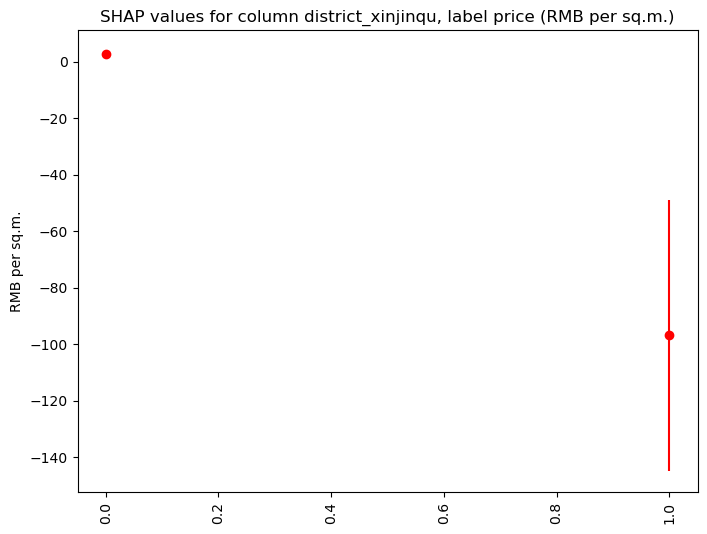

            gain   gain_std  count
col                               
False   2.529700   1.163800   2453
True  -96.900398  48.044102     83

gcj02_lng



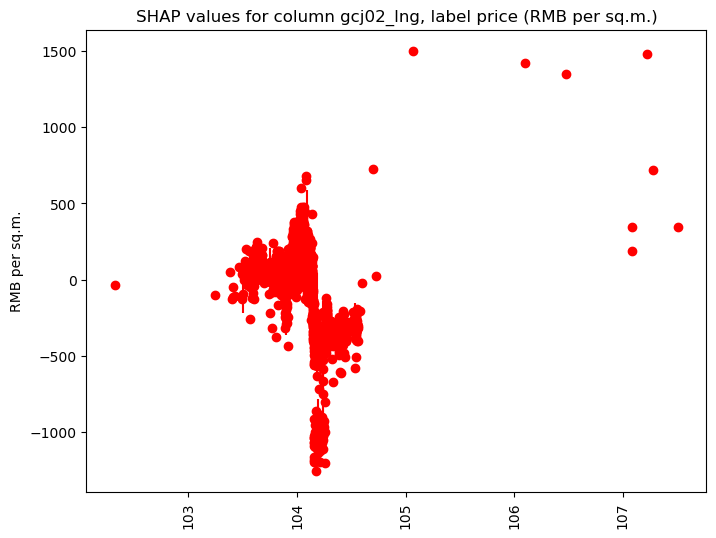

                   gain  gain_std  count
col                                     
105.067671  1501.170532       NaN      1
107.223758  1481.780762       NaN      1
106.094757  1423.394287       NaN      1
106.479585  1346.713623       NaN      1
104.695436   727.393677       NaN      1
...                 ...       ...    ...
104.208534 -1193.356689       NaN      1
104.158627 -1193.964233       NaN      1
104.164629 -1195.572754       NaN      1
104.252971 -1204.046875       NaN      1
104.173385 -1252.119629       NaN      1

[2273 rows x 3 columns]

gcj02_lat



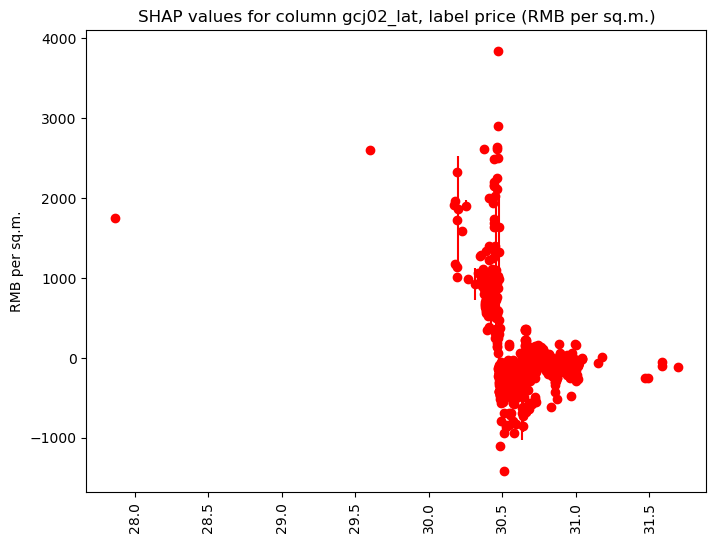

                  gain  gain_std  count
col                                    
30.466774  3837.745605       NaN      1
30.467350  2903.069336       NaN      1
30.460225  2645.097900       NaN      1
30.465113  2618.018799       NaN      1
30.376726  2608.664062       NaN      1
...                ...       ...    ...
30.523639  -861.351013       NaN      1
30.578614  -932.773987       NaN      1
30.507960  -933.752319       NaN      1
30.483772 -1101.815552   15.2023      2
30.512009 -1418.027466       NaN      1

[2269 rows x 3 columns]

road_count



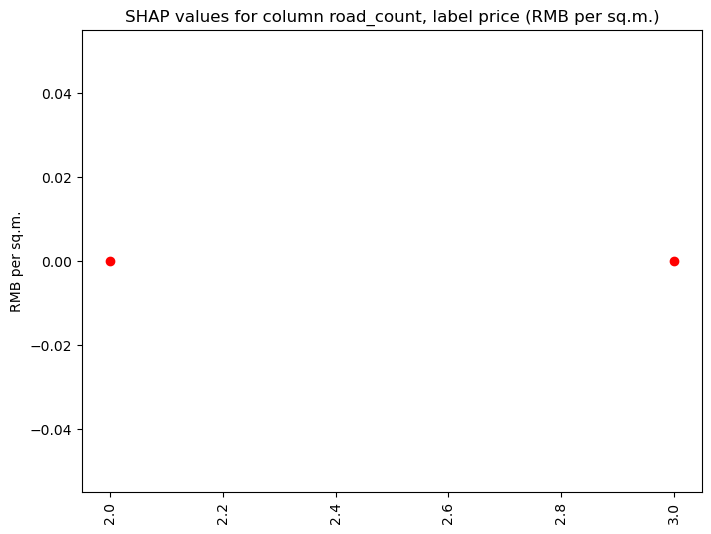

     gain  gain_std  count
col                       
2.0   0.0       NaN      1
3.0   0.0       0.0   2535

Road_1_distance



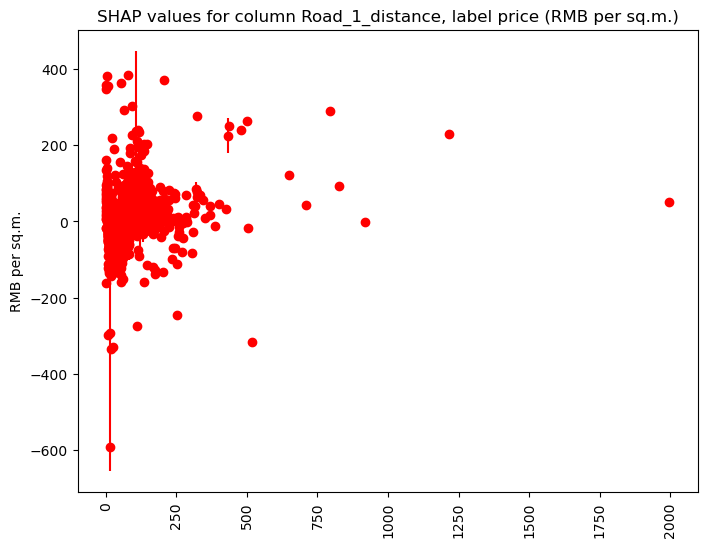

               gain  gain_std  count
col                                 
78.885   386.155914       NaN      1
3.075    383.024597       NaN      1
205.428  372.181396       NaN      1
55.796   364.703094       NaN      1
0.489    358.161987    0.1438      2
...             ...       ...    ...
9.677   -297.898712    0.7045      2
517.171 -315.998688       NaN      1
27.244  -330.777100       NaN      1
18.497  -336.077911       NaN      1
15.691  -593.893188       NaN      1

[2256 rows x 3 columns]

Road_2_distance



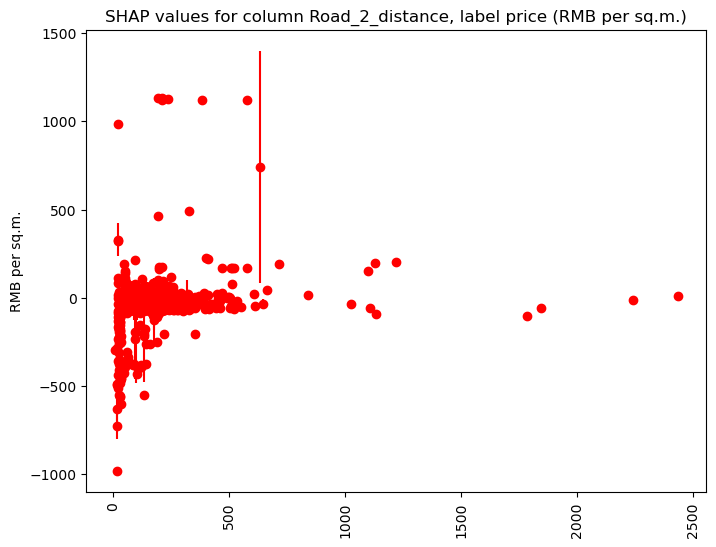

                gain   gain_std  count
col                                   
195.899  1133.192261        NaN      1
213.231  1131.233398        NaN      1
237.705  1127.276733        NaN      1
211.342  1123.119873        NaN      1
577.824  1121.607056        NaN      1
...              ...        ...    ...
28.545   -564.738892        NaN      1
34.053   -603.286377        NaN      1
17.453   -632.417480        NaN      1
19.594   -723.972595  76.334602      2
17.393   -980.071472        NaN      1

[2260 rows x 3 columns]

Road_3_distance



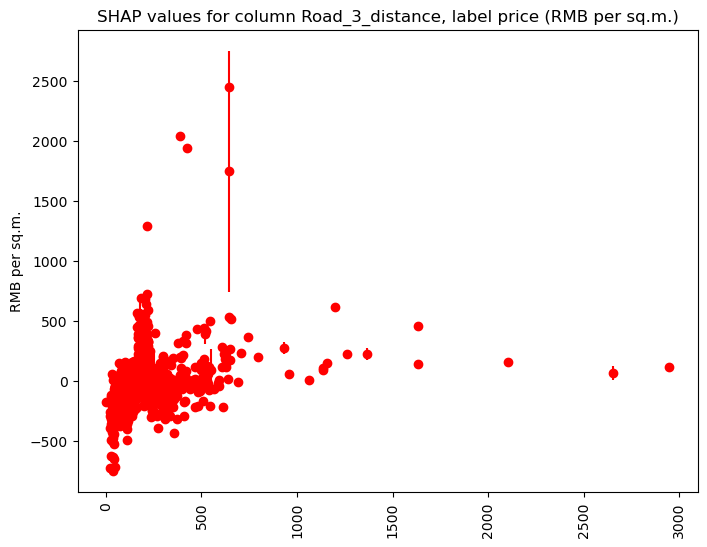

                gain     gain_std  count
col                                     
643.201  2450.837402          NaN      1
388.669  2045.773804          NaN      1
425.183  1945.107178          NaN      1
645.481  1748.411255  1004.060913      3
216.693  1296.005615          NaN      1
...              ...          ...    ...
36.770   -634.530823          NaN      1
43.843   -648.864014          NaN      1
45.582   -719.021423          NaN      1
23.305   -721.267212          NaN      1
35.275   -746.425598          NaN      1

[2265 rows x 3 columns]

secondary_school_1_distance



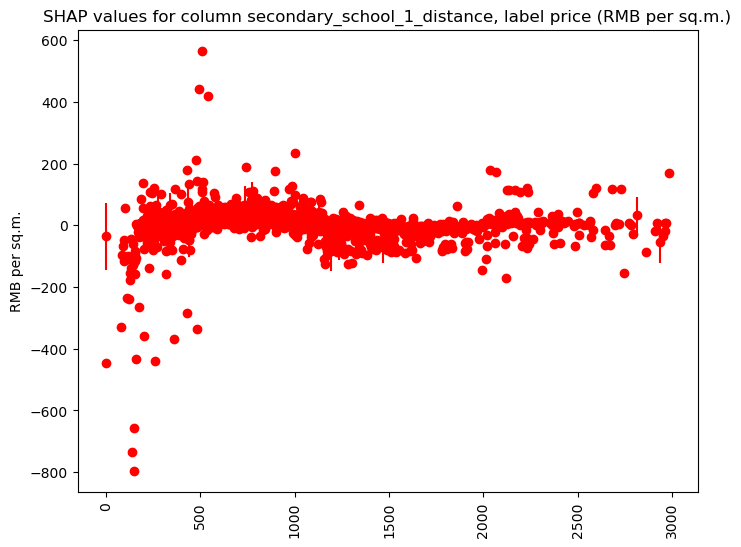

               gain  gain_std  count
col                                 
507.583  565.527771       NaN      1
490.601  440.989288       NaN      1
540.033  418.127991       NaN      1
999.865  233.402206       NaN      1
475.729  212.714294       NaN      1
...             ...       ...    ...
261.509 -438.249908       NaN      1
0.000   -447.539215       NaN      1
149.181 -655.922791       NaN      1
140.816 -733.891907       NaN      1
149.871 -795.497803       NaN      1

[2247 rows x 3 columns]

secondary_school_2_distance



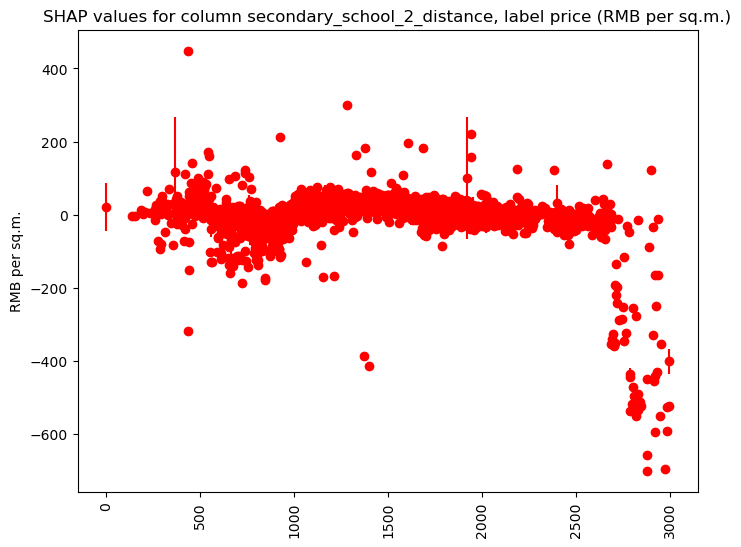

                gain  gain_std  count
col                                  
436.172   448.464386       NaN      1
1284.270  299.605103       NaN      1
1940.740  220.089203       NaN      1
926.422   213.578094       NaN      1
1605.680  196.642807       NaN      1
...              ...       ...    ...
2982.900 -592.720093       NaN      1
2920.700 -595.024475       NaN      1
2875.860 -658.294189       NaN      1
2971.190 -696.561584       NaN      1
2875.640 -700.344116       NaN      1

[2141 rows x 3 columns]

secondary_school_3_distance



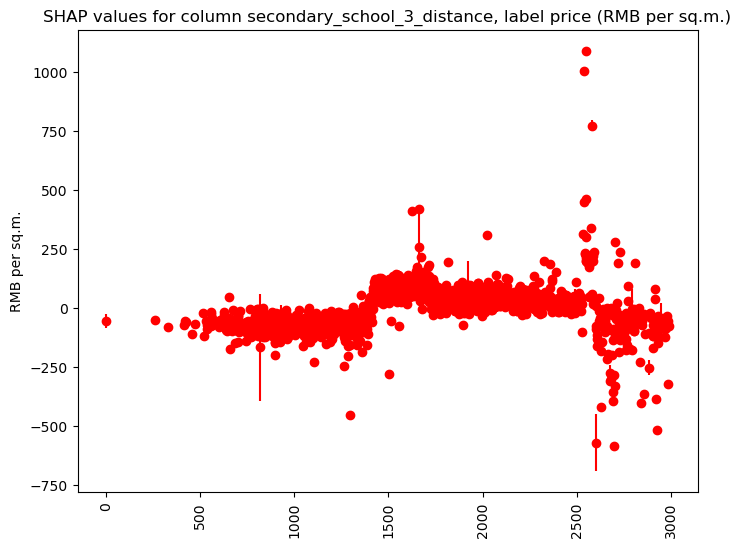

                gain    gain_std  count
col                                    
2550.19  1089.306030         NaN      1
2541.05  1004.905212         NaN      1
2579.20   772.415100   22.185900      2
2547.03   462.762085         NaN      1
2538.61   450.480713         NaN      1
...              ...         ...    ...
2630.38  -418.489410         NaN      1
1294.72  -452.683594         NaN      1
2925.83  -517.255676         NaN      1
2604.22  -570.440002  119.287399      2
2697.15  -583.786499         NaN      1

[1998 rows x 3 columns]

secondary_school_4_distance



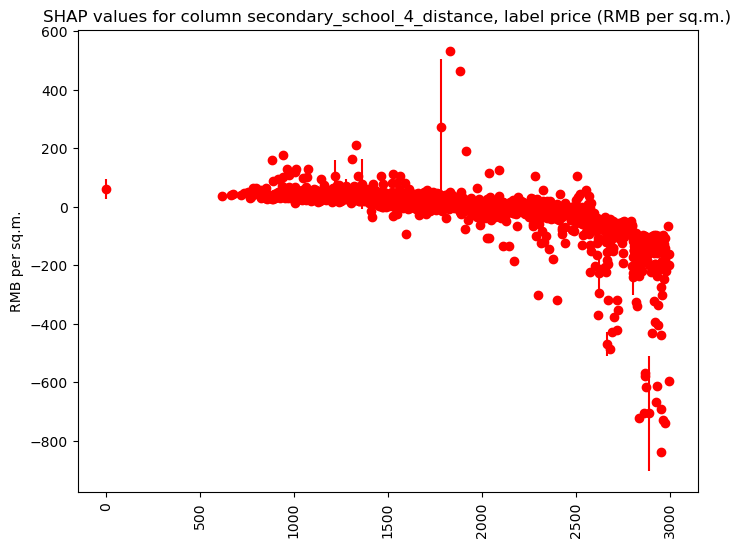

               gain    gain_std  count
col                                   
1833.20  533.040283         NaN      1
1886.51  463.588409         NaN      1
1785.98  272.089905  232.054199      3
1328.92  211.048599         NaN      1
1917.96  190.931595         NaN      1
...             ...         ...    ...
2864.35 -706.789185         NaN      1
2839.68 -723.352478         NaN      1
2965.64 -730.538086         NaN      1
2974.02 -740.133484         NaN      1
2955.25 -838.085388         NaN      1

[1777 rows x 3 columns]

secondary_school_5_distance



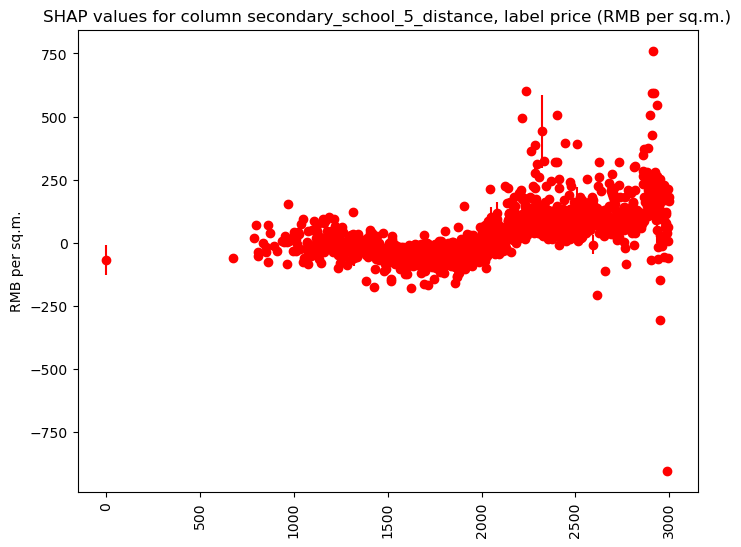

               gain  gain_std  count
col                                 
2911.32  760.697205       NaN      1
2235.62  600.108398       NaN      1
2909.43  594.635376       NaN      1
2915.57  593.681885       NaN      1
2935.01  547.090210       NaN      1
...             ...       ...    ...
1427.60 -177.316498       NaN      1
1624.42 -180.135605       NaN      1
2614.04 -205.742905       NaN      1
2952.13 -305.195587       NaN      1
2988.99 -904.188110       NaN      1

[1516 rows x 3 columns]

sports_recreation_1_distance



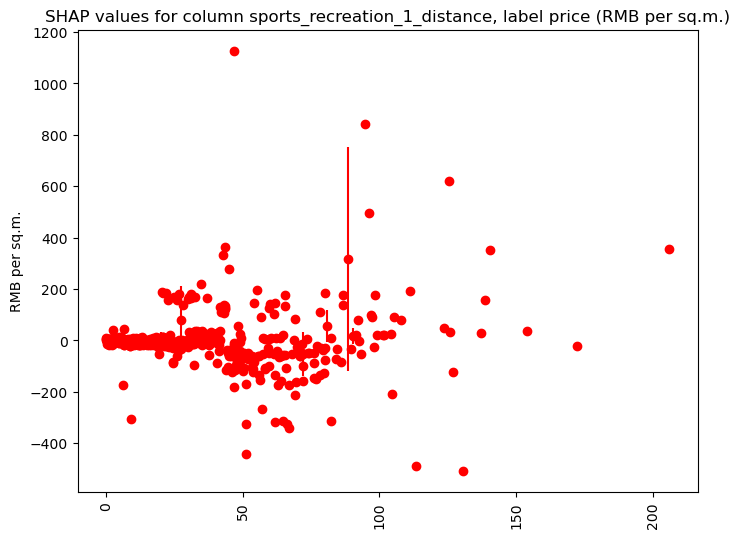

                gain  gain_std  count
col                                  
46.990   1127.791260       NaN      1
94.678    843.362610       NaN      1
125.302   619.565979       NaN      1
96.157    497.416687       NaN      1
43.556    364.783905       NaN      1
...              ...       ...    ...
66.346   -324.569305    1.3569      2
67.124   -339.321991       NaN      1
51.300   -440.642212       NaN      1
113.535  -489.378204       NaN      1
130.755  -506.626190       NaN      1

[567 rows x 3 columns]

sports_recreation_2_distance



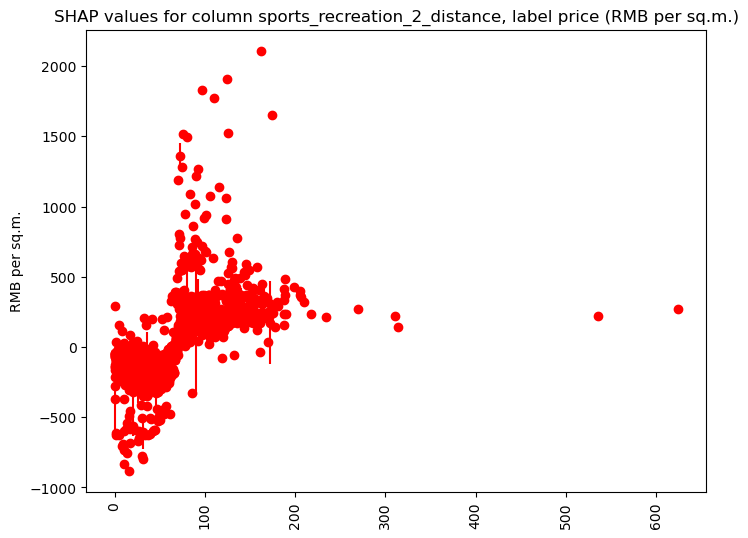

                gain  gain_std  count
col                                  
162.084  2109.480713       NaN      1
124.084  1910.404175       NaN      1
96.865   1829.944458       NaN      1
110.385  1774.155151       NaN      1
174.606  1648.431885       NaN      1
...              ...       ...    ...
13.430   -750.953613       NaN      1
30.634   -776.524597       NaN      1
31.365   -799.677979       NaN      1
10.126   -832.820801       NaN      1
15.471   -880.106873       NaN      1

[2225 rows x 3 columns]

sports_recreation_3_distance



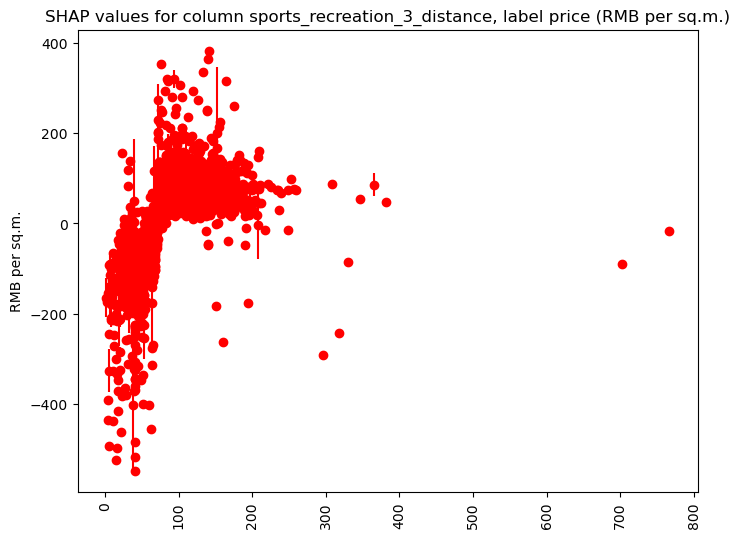

               gain  gain_std  count
col                                 
141.283  382.763214       NaN      1
139.874  364.480804       NaN      1
76.337   352.566101       NaN      1
133.271  336.205200       NaN      1
83.982   320.069611       NaN      1
...             ...       ...    ...
5.395   -494.455994       NaN      1
15.679  -497.450012       NaN      1
40.909  -518.677002       NaN      1
14.841  -525.107117       NaN      1
40.726  -548.247009       NaN      1

[2253 rows x 3 columns]

sports_recreation_4_distance



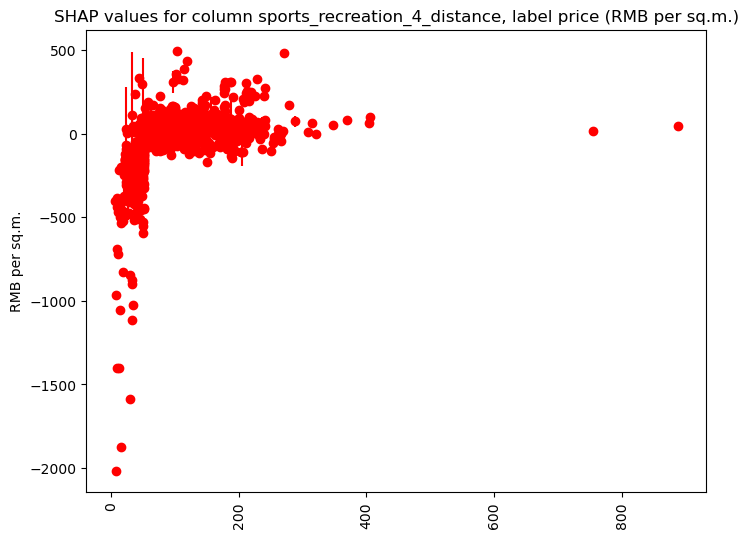

                gain  gain_std  count
col                                  
104.184   496.984009       NaN      1
270.291   480.572815       NaN      1
118.661   432.332214       NaN      1
114.133   389.431000       NaN      1
102.459   356.320587       NaN      1
...              ...       ...    ...
9.180   -1401.002563       NaN      1
12.797  -1404.762451       NaN      1
29.662  -1585.294312       NaN      1
16.328  -1875.203247       NaN      1
7.988   -2016.623047       NaN      1

[2261 rows x 3 columns]

sports_recreation_5_distance



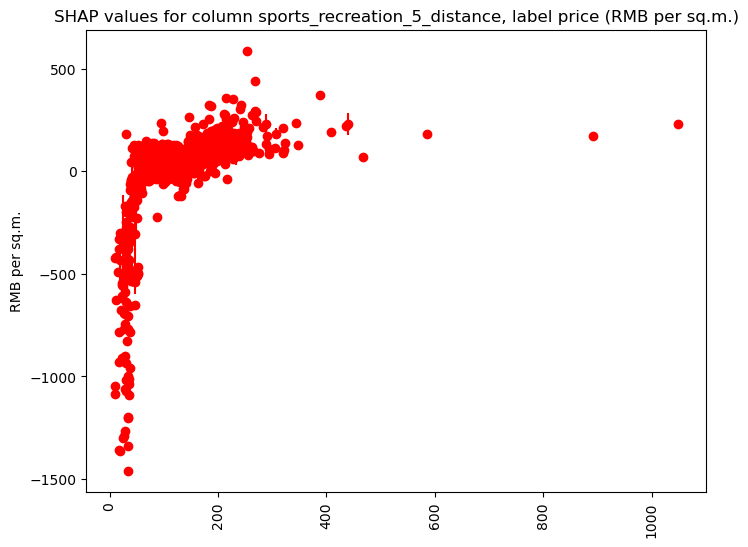

                gain  gain_std  count
col                                  
253.157   586.696899       NaN      1
269.031   438.761993       NaN      1
387.534   373.178986       NaN      1
214.635   356.402802       NaN      1
227.285   351.884094       NaN      1
...              ...       ...    ...
24.061  -1300.749878       NaN      1
34.710  -1336.728516       NaN      1
17.332  -1359.962402       NaN      1
18.726  -1362.015747       NaN      1
34.667  -1459.590698       NaN      1

[2252 rows x 3 columns]

convenience_store_1_distance



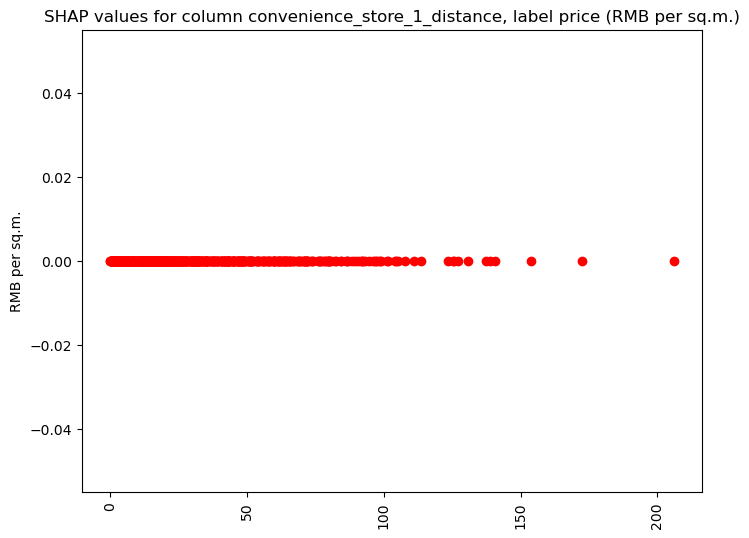

         gain  gain_std  count
col                           
0.000     0.0       0.0   1929
41.454    0.0       NaN      1
40.489    0.0       NaN      1
40.684    0.0       NaN      1
40.690    0.0       NaN      1
...       ...       ...    ...
15.854    0.0       NaN      1
15.767    0.0       NaN      1
15.378    0.0       NaN      1
15.285    0.0       NaN      1
205.982   0.0       NaN      1

[567 rows x 3 columns]

convenience_store_2_distance



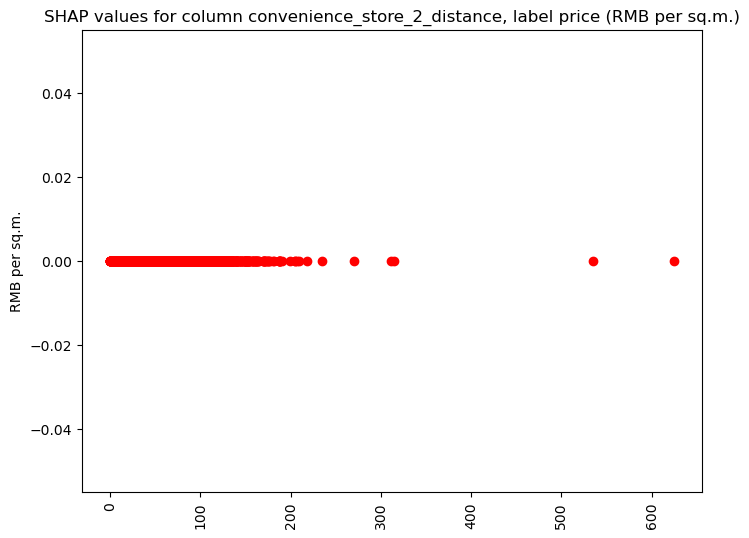

         gain  gain_std  count
col                           
0.000     0.0       0.0    142
77.221    0.0       NaN      1
76.937    0.0       NaN      1
77.098    0.0       NaN      1
77.147    0.0       NaN      1
...       ...       ...    ...
42.879    0.0       NaN      1
42.847    0.0       NaN      1
42.831    0.0       NaN      1
42.816    0.0       0.0      2
624.605   0.0       NaN      1

[2225 rows x 3 columns]

convenience_store_3_distance



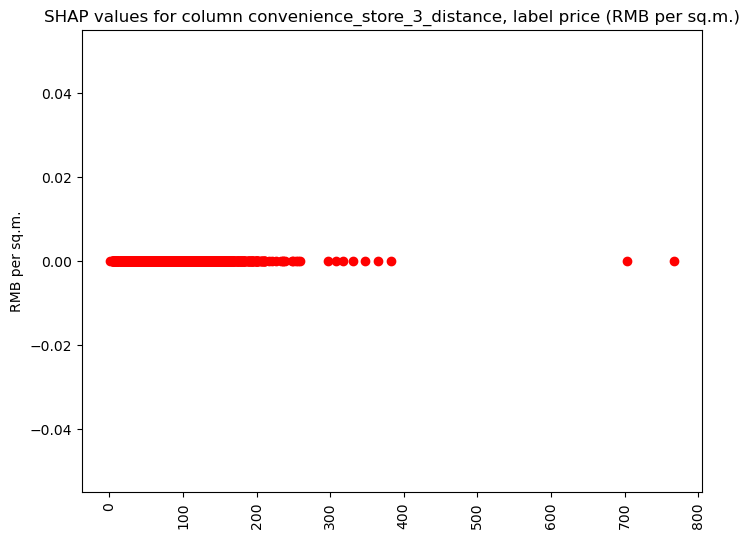

         gain  gain_std  count
col                           
0.992     0.0       0.0      9
99.860    0.0       NaN      1
99.103    0.0       NaN      1
99.373    0.0       NaN      1
99.409    0.0       NaN      1
...       ...       ...    ...
63.119    0.0       NaN      1
63.043    0.0       NaN      1
63.006    0.0       NaN      1
62.971    0.0       NaN      1
766.823   0.0       NaN      1

[2253 rows x 3 columns]

convenience_store_4_distance



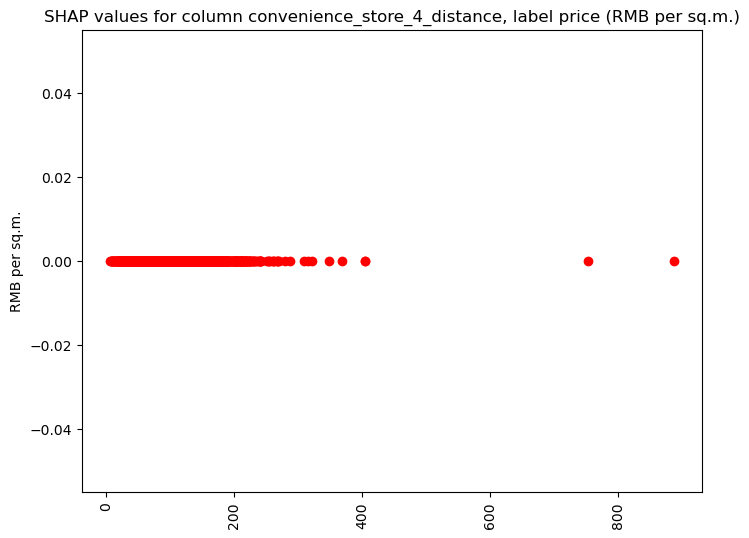

         gain  gain_std  count
col                           
6.052     0.0       NaN      1
116.926   0.0       NaN      1
116.135   0.0       NaN      1
116.403   0.0       NaN      1
116.462   0.0       NaN      1
...       ...       ...    ...
74.595    0.0       NaN      1
74.303    0.0       NaN      1
74.258    0.0       NaN      1
74.190    0.0       NaN      1
887.530   0.0       NaN      1

[2261 rows x 3 columns]

convenience_store_5_distance



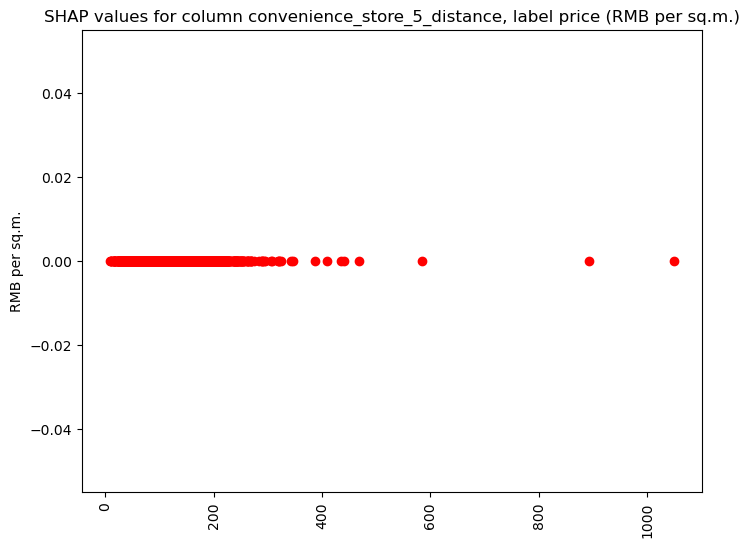

          gain  gain_std  count
col                            
9.233      0.0       NaN      1
130.746    0.0       NaN      1
130.369    0.0       NaN      1
130.412    0.0       NaN      1
130.425    0.0       NaN      1
...        ...       ...    ...
85.141     0.0       NaN      1
85.100     0.0       0.0      2
85.093     0.0       NaN      1
85.002     0.0       NaN      1
1048.840   0.0       NaN      1

[2252 rows x 3 columns]

shopping_mall_1_distance



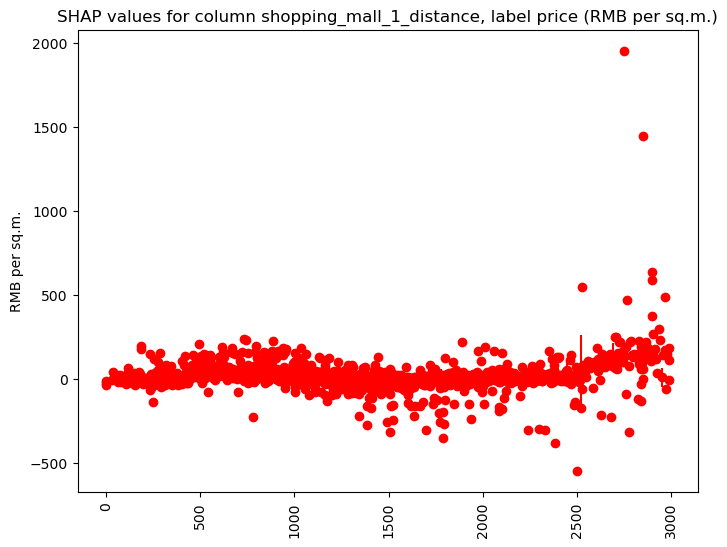

                gain  gain_std  count
col                                  
2749.56  1951.681396       NaN      1
2850.29  1444.705200       NaN      1
2900.53   634.939819       NaN      1
2898.01   588.758179       NaN      1
2526.44   548.921814       NaN      1
...              ...       ...    ...
1508.60  -312.965698       NaN      1
2775.40  -314.157013       NaN      1
1790.13  -347.427704       NaN      1
2385.85  -381.344513       NaN      1
2501.11  -544.725586       NaN      1

[1390 rows x 3 columns]

shopping_mall_2_distance



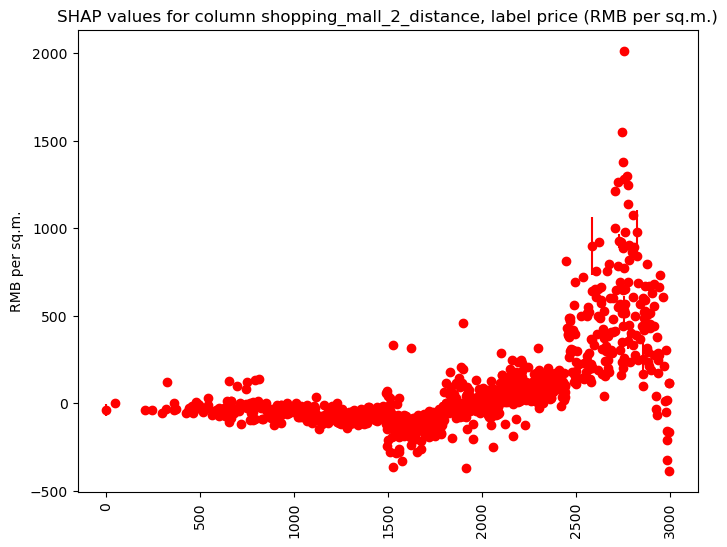

                gain  gain_std  count
col                                  
2752.83  2013.505859       NaN      1
2740.59  1549.815308       NaN      1
2747.76  1379.506226       NaN      1
2767.04  1295.269653       NaN      1
2754.86  1280.754517       NaN      1
...              ...       ...    ...
2982.06  -322.939606       NaN      1
1574.57  -331.760803       NaN      1
1528.38  -363.160004       NaN      1
1913.30  -368.479614       NaN      1
2991.30  -386.855011       NaN      1

[1001 rows x 3 columns]

shopping_mall_3_distance



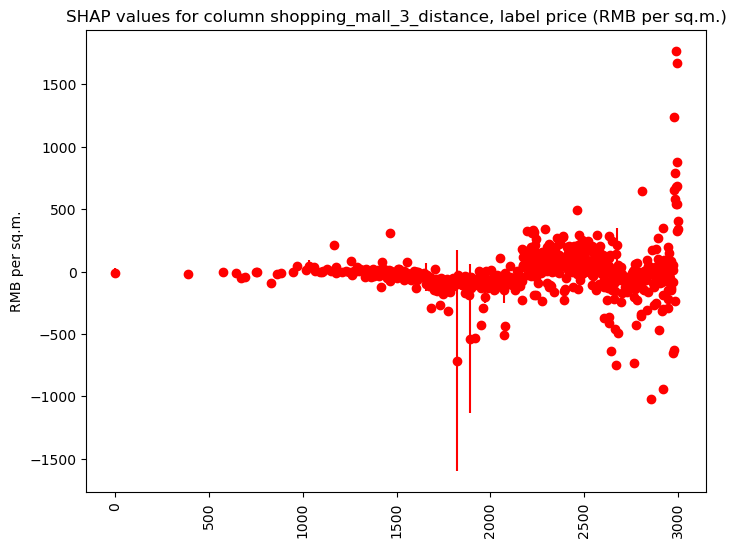

                gain    gain_std  count
col                                    
2986.82  1769.285156         NaN      1
2995.75  1668.083984         NaN      1
2976.75  1237.559937         NaN      1
2995.57   876.720520         NaN      1
2983.27   792.140198         NaN      1
...              ...         ...    ...
1823.01  -713.667786  883.474426      2
2762.43  -731.827026         NaN      1
2669.11  -747.552612         NaN      1
2921.40  -939.654419         NaN      1
2852.87 -1025.610352         NaN      1

[655 rows x 3 columns]

shopping_mall_4_distance



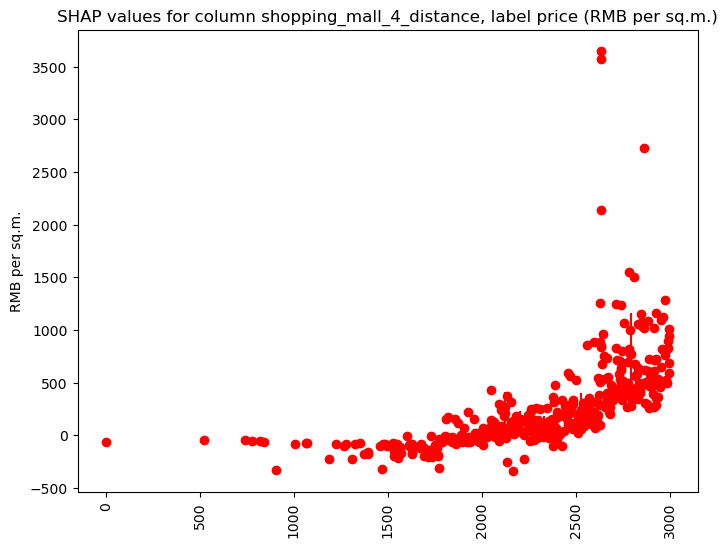

                 gain  gain_std  count
col                                   
2635.540  3650.556396       NaN      1
2636.650  3568.503662       NaN      1
2865.420  2723.092285       NaN      1
2636.160  2137.068359       NaN      1
2783.880  1551.543335       NaN      1
...               ...       ...    ...
2134.960  -253.783707       NaN      1
1771.390  -307.492188       NaN      1
1467.690  -319.411011       NaN      1
907.476   -335.076508       NaN      1
2168.940  -338.005005       NaN      1

[405 rows x 3 columns]

shopping_mall_5_distance



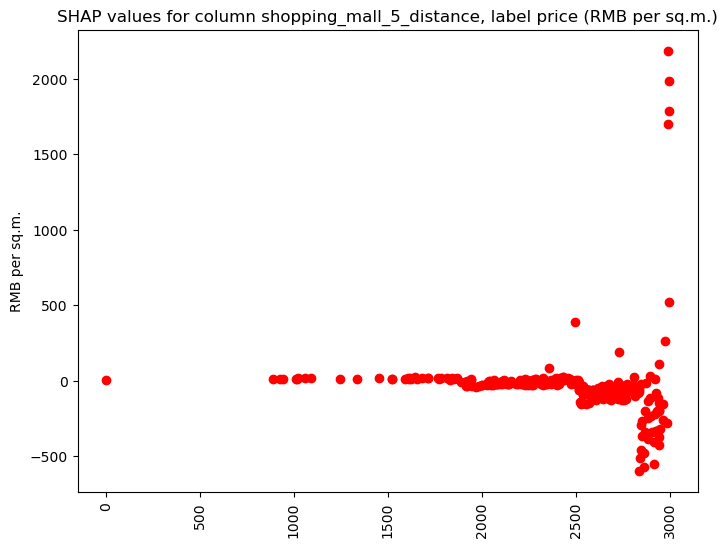

                gain  gain_std  count
col                                  
2988.44  2185.734375       NaN      1
2995.06  1982.935791       NaN      1
2997.17  1785.603760       NaN      1
2989.61  1700.118652       NaN      1
2993.05   518.677917       NaN      1
...              ...       ...    ...
2862.80  -483.251587       NaN      1
2839.70  -513.449219       NaN      1
2915.59  -556.578003       NaN      1
2864.16  -574.751099       NaN      1
2838.25  -598.264587       NaN      1

[264 rows x 3 columns]

subway_station_1_distance



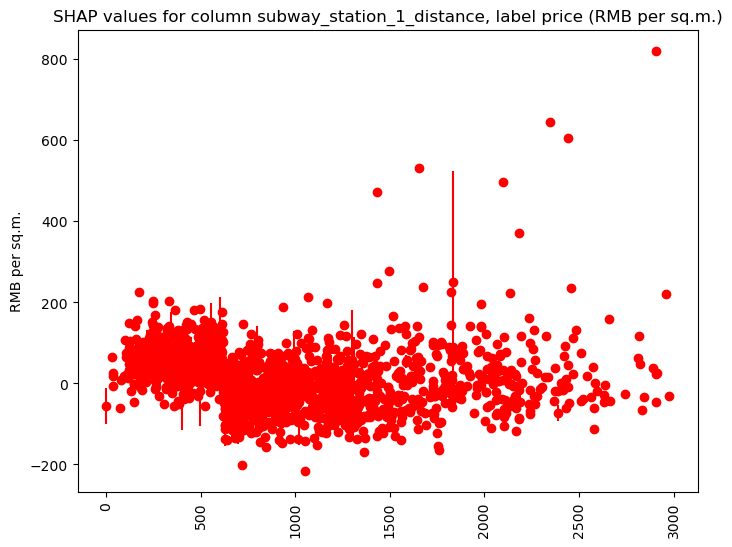

                gain  gain_std  count
col                                  
2908.730  821.352722       NaN      1
2344.160  646.703613       NaN      1
2441.260  605.578186       NaN      1
1652.240  531.195190       NaN      1
2096.260  496.633698       NaN      1
...              ...       ...    ...
847.276  -157.361603       NaN      1
1762.200 -163.647797       NaN      1
1364.620 -169.840897       NaN      1
720.204  -201.289703       NaN      1
1050.180 -215.596100       NaN      1

[1651 rows x 3 columns]

subway_station_2_distance



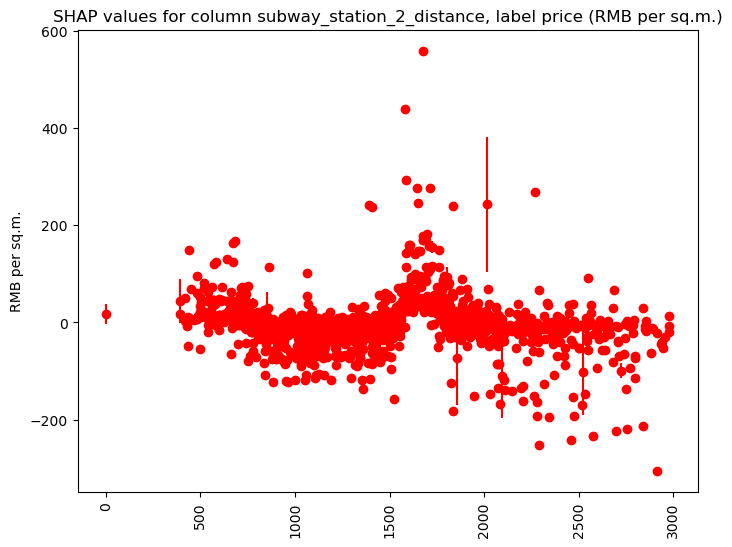

               gain  gain_std  count
col                                 
1676.99  558.426819       NaN      1
1584.07  438.468414       NaN      1
1587.08  292.463593       NaN      1
1643.86  277.305786       NaN      1
1715.80  277.100098       NaN      1
...             ...       ...    ...
2698.98 -222.541595       NaN      1
2578.11 -233.741699       NaN      1
2462.37 -240.715500       NaN      1
2288.71 -251.944199       NaN      1
2913.45 -304.815796       NaN      1

[1599 rows x 3 columns]

subway_station_3_distance



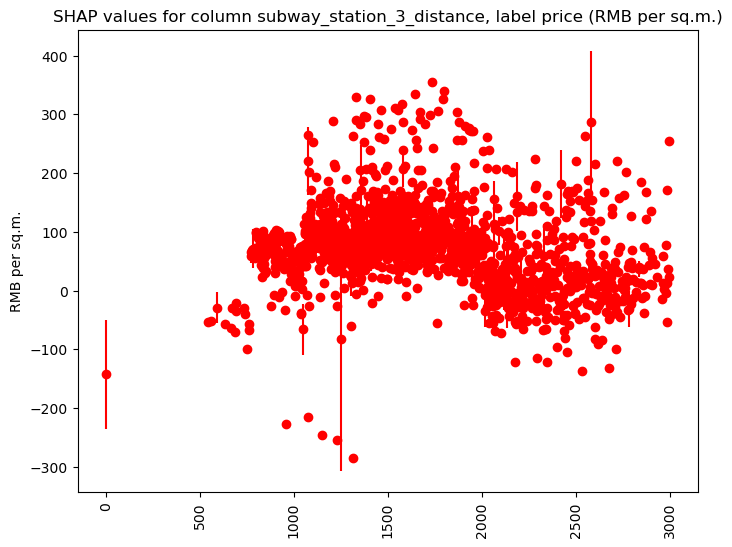

                gain  gain_std  count
col                                  
1736.100  354.512207       NaN      1
1798.120  339.764404       NaN      1
1645.700  334.070496       NaN      1
1328.390  329.493195       NaN      1
1406.330  325.844788       NaN      1
...              ...       ...    ...
1073.160 -215.454803       NaN      1
959.475  -227.561295       NaN      1
1151.690 -245.272202       NaN      1
1227.160 -254.658203       NaN      1
1311.930 -285.724792       NaN      1

[1496 rows x 3 columns]

subway_station_4_distance



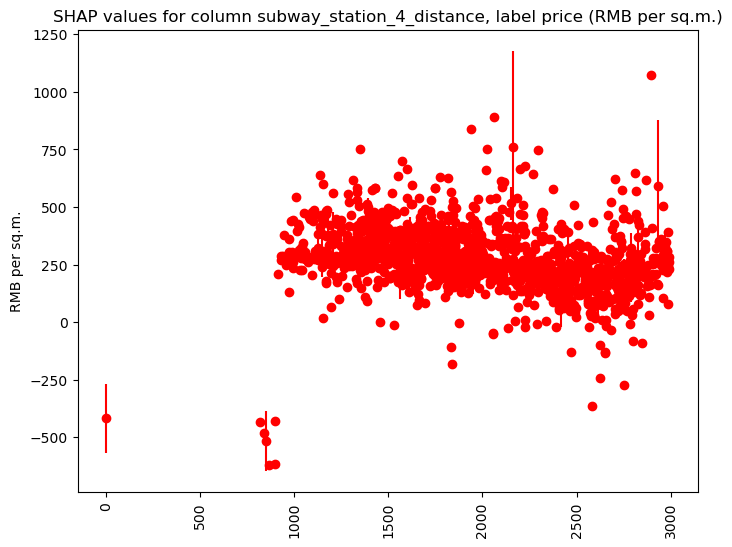

                 gain    gain_std  count
col                                     
2897.140  1072.508789         NaN      1
2060.660   890.096497         NaN      1
1939.910   838.890076         NaN      1
2161.270   759.968506  418.441498      3
1351.030   753.657715         NaN      1
...               ...         ...    ...
819.486   -432.506287         NaN      1
838.356   -480.662201         NaN      1
851.887   -514.120178  130.758194     13
896.460   -614.604614         NaN      1
868.601   -617.723572         NaN      1

[1364 rows x 3 columns]

subway_station_5_distance



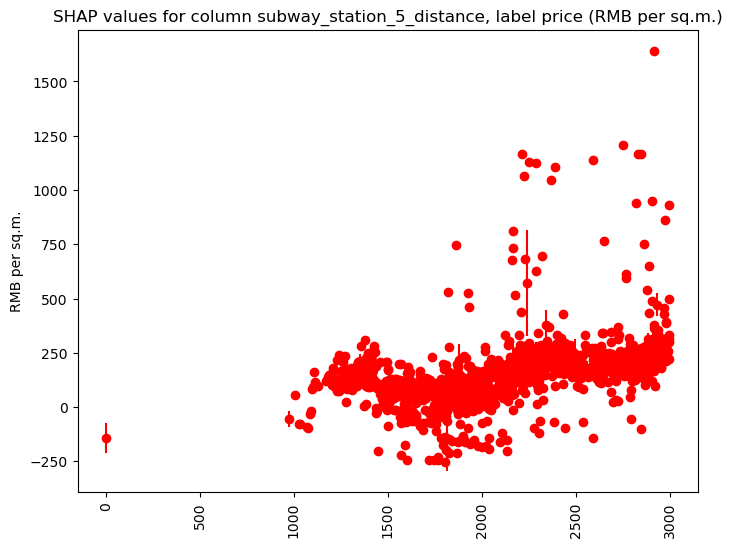

                gain  gain_std  count
col                                  
2915.49  1641.350098       NaN      1
2750.39  1205.579224       NaN      1
2215.26  1165.475098       NaN      1
2845.97  1164.438110       NaN      1
2830.50  1163.682861       NaN      1
...              ...       ...    ...
1765.69  -242.610794       NaN      1
1717.55  -243.498199       NaN      1
1603.98  -244.650208       NaN      1
1748.01  -245.537094       NaN      1
1801.23  -253.686096       NaN      1

[1165 rows x 3 columns]

primary_school_1_distance



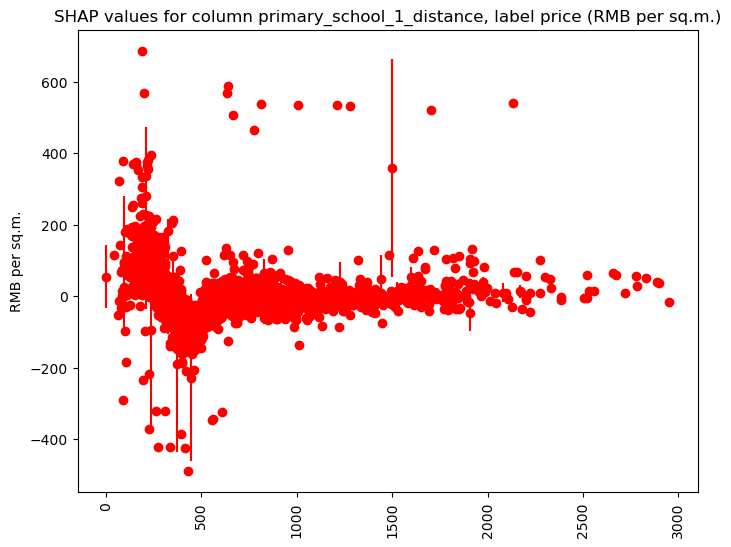

                gain  gain_std  count
col                                  
190.192   687.160706       NaN      1
640.968   589.608826       NaN      1
635.127   569.520813       NaN      1
197.479   568.214478       NaN      1
2134.940  540.138977       NaN      1
...              ...       ...    ...
393.834  -384.646698       NaN      1
273.156  -421.634491       NaN      1
336.473  -421.935913       NaN      1
414.119  -425.126709       NaN      1
427.656  -488.160004       NaN      1

[2239 rows x 3 columns]

primary_school_2_distance



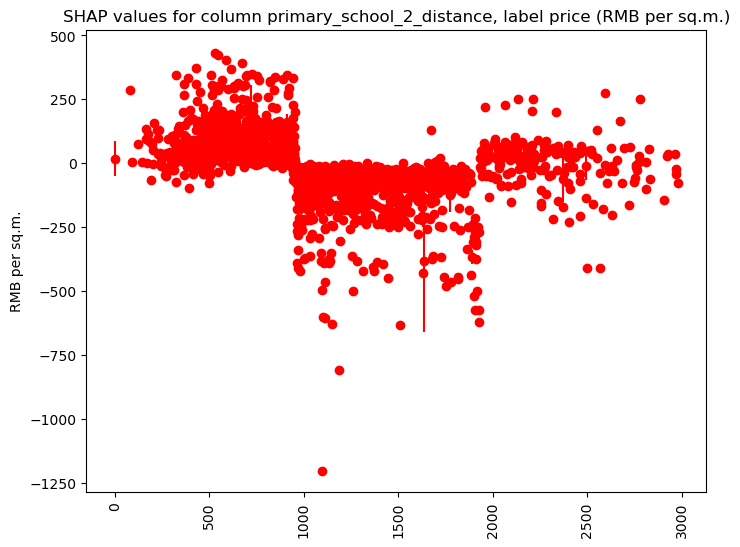

                 gain  gain_std  count
col                                   
529.383    433.144989    6.9978      3
543.371    422.227203       NaN      1
587.035    403.873688       NaN      1
674.752    394.183685       NaN      1
429.471    370.868896       NaN      1
...               ...       ...    ...
1928.770  -622.068604       NaN      1
1147.060  -626.374390       NaN      1
1509.270  -630.554077       NaN      1
1188.170  -806.316406       NaN      1
1096.290 -1202.233887       NaN      1

[2160 rows x 3 columns]

primary_school_3_distance



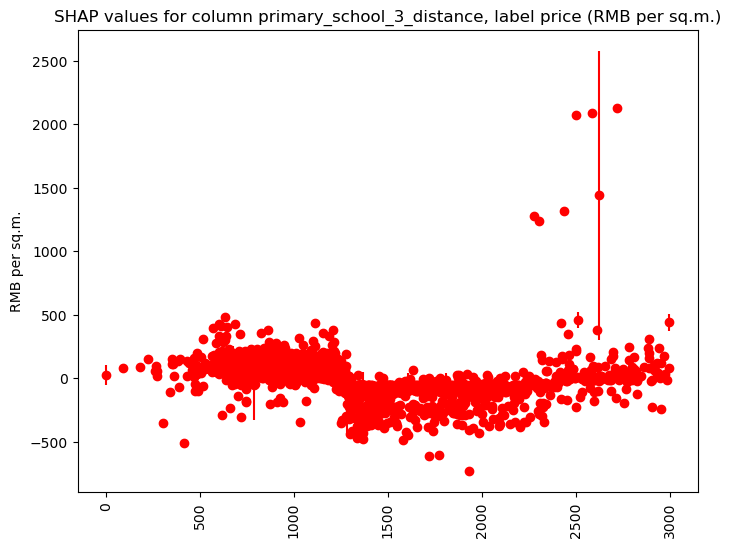

                gain     gain_std  count
col                                     
2722.35  2127.225586          NaN      1
2586.29  2084.655273          NaN      1
2500.60  2073.427734          NaN      1
2626.17  1440.003296  1137.307983      3
2436.08  1313.092163          NaN      1
...              ...          ...    ...
1583.50  -487.878601          NaN      1
413.63   -508.300201          NaN      1
1772.35  -603.394409          NaN      1
1717.23  -613.558777          NaN      1
1931.35  -728.749512          NaN      1

[2089 rows x 3 columns]

primary_school_4_distance



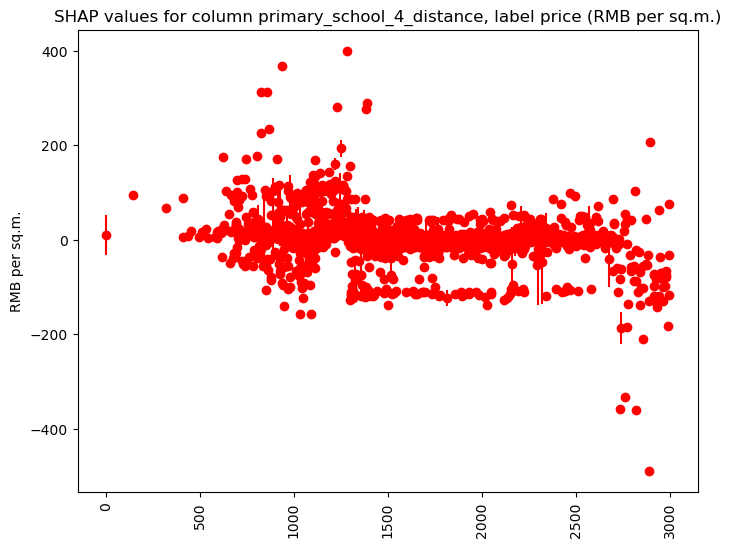

                gain  gain_std  count
col                                  
1284.920  399.575989       NaN      1
934.565   367.377106       NaN      1
826.928   312.568695       NaN      1
855.837   311.967590       NaN      1
1388.310  288.170807       NaN      1
...              ...       ...    ...
2858.300 -211.076706       NaN      1
2760.090 -332.735809       NaN      1
2734.060 -357.351105       NaN      1
2818.060 -360.536011       NaN      1
2888.350 -489.101990       NaN      1

[1999 rows x 3 columns]

primary_school_5_distance



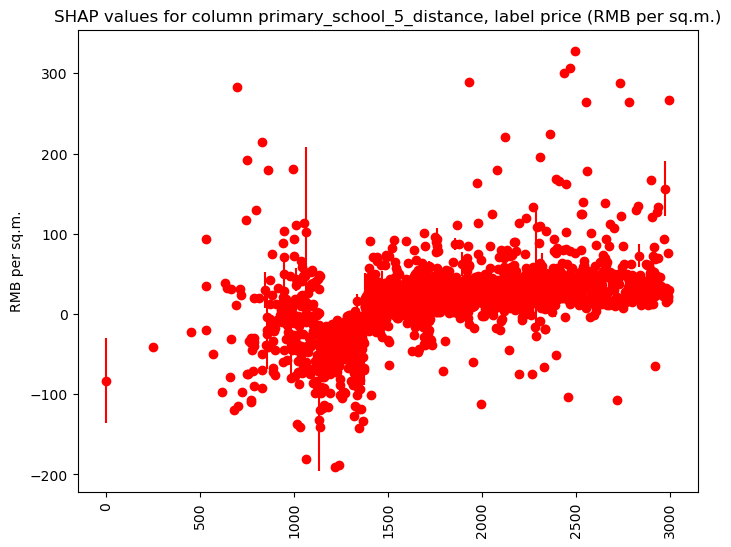

               gain  gain_std  count
col                                 
2494.78  328.161499       NaN      1
2468.22  306.813599       NaN      1
2436.98  300.980988       NaN      1
1929.96  289.752991       NaN      1
2731.86  287.667389       NaN      1
...             ...       ...    ...
1139.20 -140.412003       NaN      1
1344.60 -142.684692       NaN      1
1064.87 -180.139297       NaN      1
1237.83 -188.203598       NaN      1
1220.15 -191.155106       NaN      1

[1909 rows x 3 columns]

kindergarten_1_distance



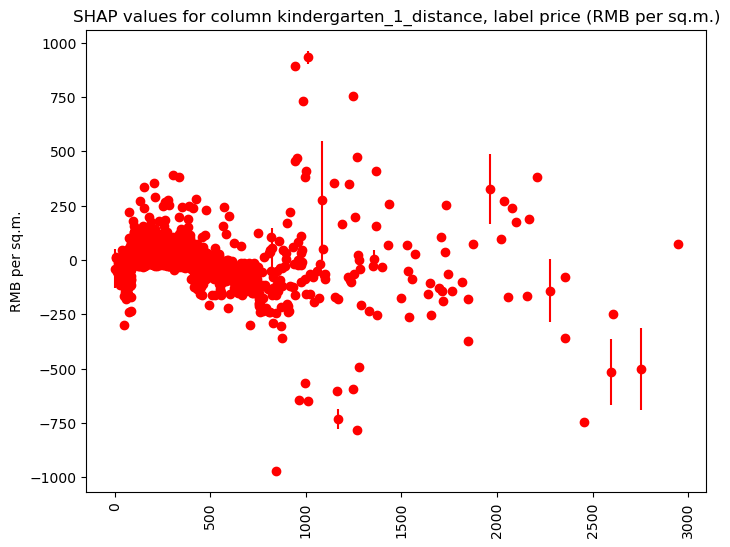

                gain  gain_std  count
col                                  
1012.820  932.815613   30.8778      2
942.865   894.452087       NaN      1
1249.050  754.914612       NaN      1
984.976   732.719788       NaN      1
1267.080  473.031189       NaN      1
...              ...       ...    ...
1010.130 -650.415771       NaN      1
1169.790 -732.560181   47.1381      2
2453.110 -745.869629       NaN      1
1268.890 -784.112793       NaN      1
841.507  -971.031128       NaN      1

[2263 rows x 3 columns]

kindergarten_2_distance



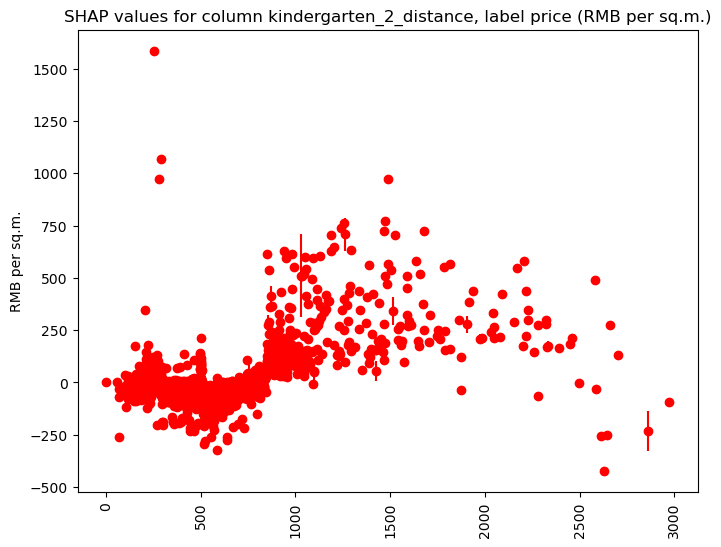

                 gain  gain_std  count
col                                   
252.407   1585.556519       NaN      1
288.179   1069.583374       NaN      1
278.940    974.785278       NaN      1
1488.230   974.704529       NaN      1
1475.020   769.507080       NaN      1
...               ...       ...    ...
636.669   -275.109009       NaN      1
520.719   -281.599792       NaN      1
518.487   -295.899811       NaN      1
586.792   -321.007507       NaN      1
2626.610  -422.105286       NaN      1

[2240 rows x 3 columns]

kindergarten_3_distance



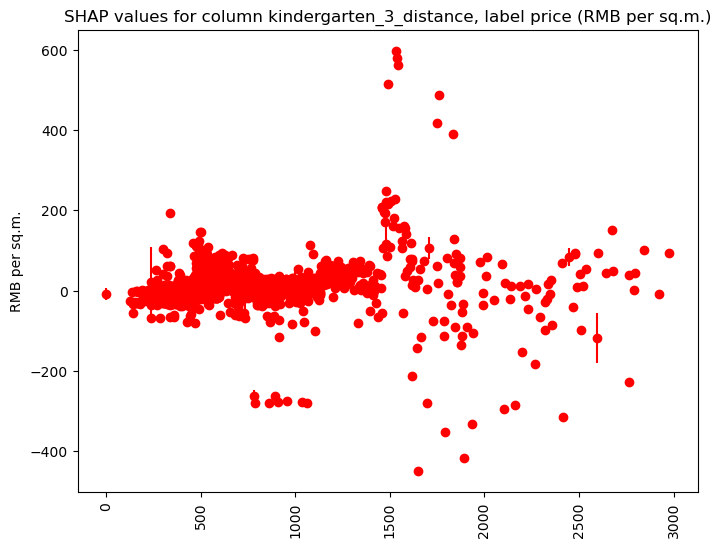

               gain  gain_std  count
col                                 
1533.75  597.908203       NaN      1
1536.00  579.389771       NaN      1
1543.95  563.211609       NaN      1
1489.32  515.014587       NaN      1
1760.89  486.989410       NaN      1
...             ...       ...    ...
2414.31 -314.888000       NaN      1
1937.22 -331.742798    4.1984      2
1794.37 -353.481415       NaN      1
1894.92 -416.204102       NaN      1
1650.44 -449.299194       NaN      1

[2232 rows x 3 columns]

kindergarten_4_distance



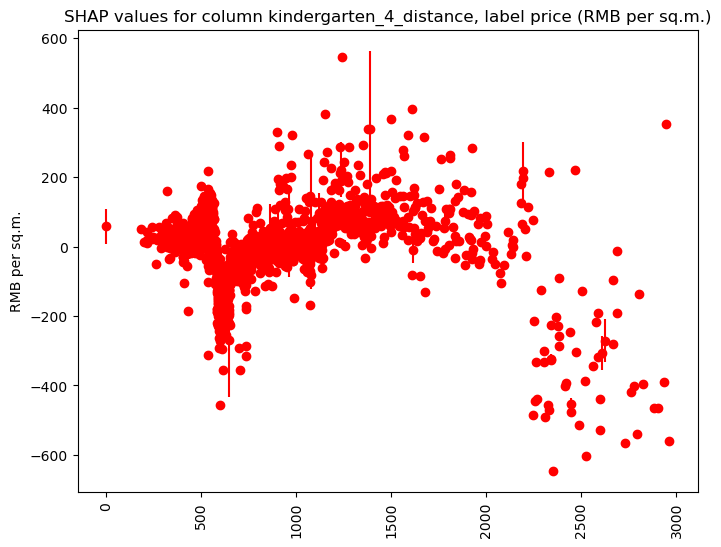

               gain  gain_std  count
col                                 
1242.16  545.769287       NaN      1
1611.49  395.821198       NaN      1
1149.75  380.973114       NaN      1
1500.40  368.141510       NaN      1
2945.82  352.734894       NaN      1
...             ...       ...    ...
2792.24 -538.529480       NaN      1
2962.55 -560.391418       NaN      1
2729.20 -566.368591       NaN      1
2523.17 -603.878906       NaN      1
2348.90 -645.486206       NaN      1

[2213 rows x 3 columns]

kindergarten_5_distance



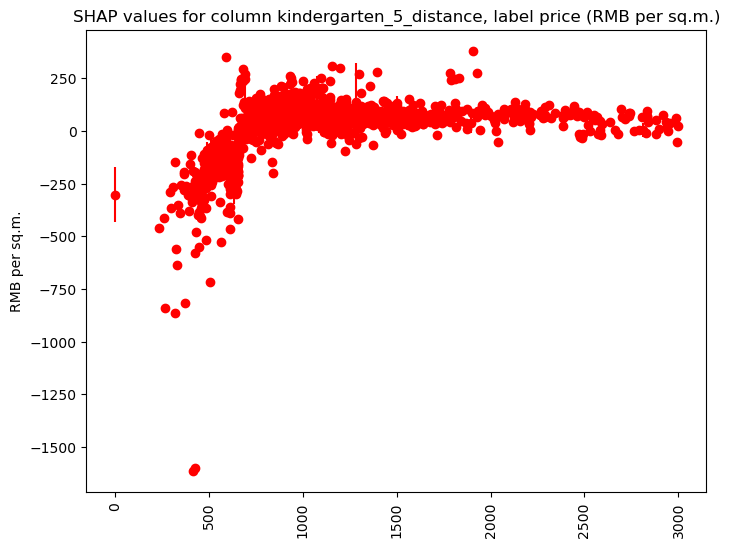

                 gain  gain_std  count
col                                   
1904.970   381.147003       NaN      1
591.322    350.830994       NaN      1
1153.820   309.212799       NaN      1
1198.320   300.212494       NaN      1
684.495    294.132904       NaN      1
...               ...       ...    ...
374.058   -818.281799       NaN      1
267.556   -842.492615       NaN      1
321.606   -865.711304       NaN      1
426.392  -1599.659424       NaN      1
413.695  -1612.986816       NaN      1

[2186 rows x 3 columns]

government_office_1_distance



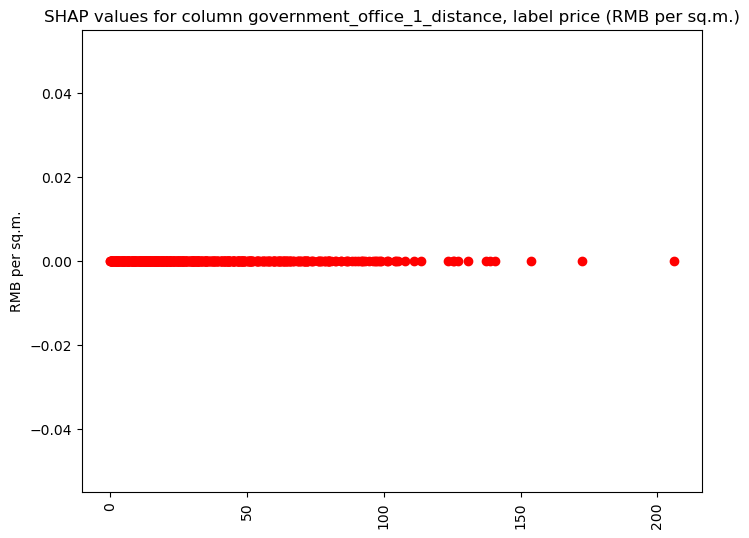

         gain  gain_std  count
col                           
0.000     0.0       0.0   1929
41.454    0.0       NaN      1
40.489    0.0       NaN      1
40.684    0.0       NaN      1
40.690    0.0       NaN      1
...       ...       ...    ...
15.854    0.0       NaN      1
15.767    0.0       NaN      1
15.378    0.0       NaN      1
15.285    0.0       NaN      1
205.982   0.0       NaN      1

[567 rows x 3 columns]

government_office_2_distance



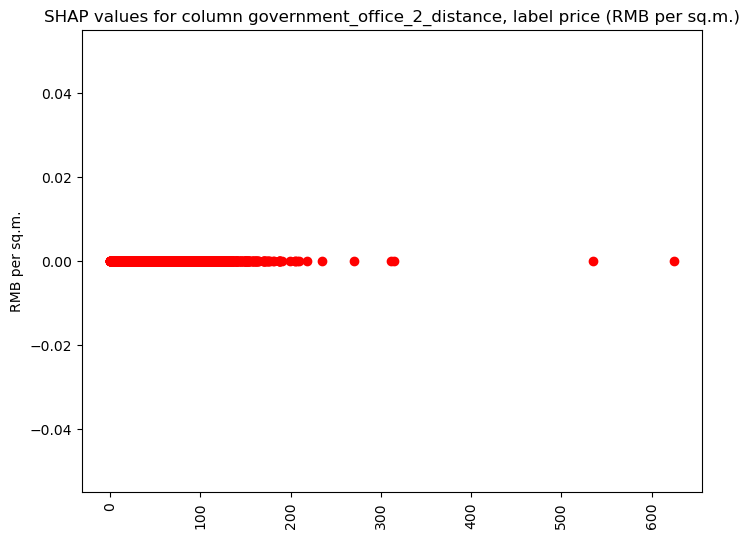

         gain  gain_std  count
col                           
0.000     0.0       0.0    142
77.221    0.0       NaN      1
76.937    0.0       NaN      1
77.098    0.0       NaN      1
77.147    0.0       NaN      1
...       ...       ...    ...
42.879    0.0       NaN      1
42.847    0.0       NaN      1
42.831    0.0       NaN      1
42.816    0.0       0.0      2
624.605   0.0       NaN      1

[2225 rows x 3 columns]

government_office_3_distance



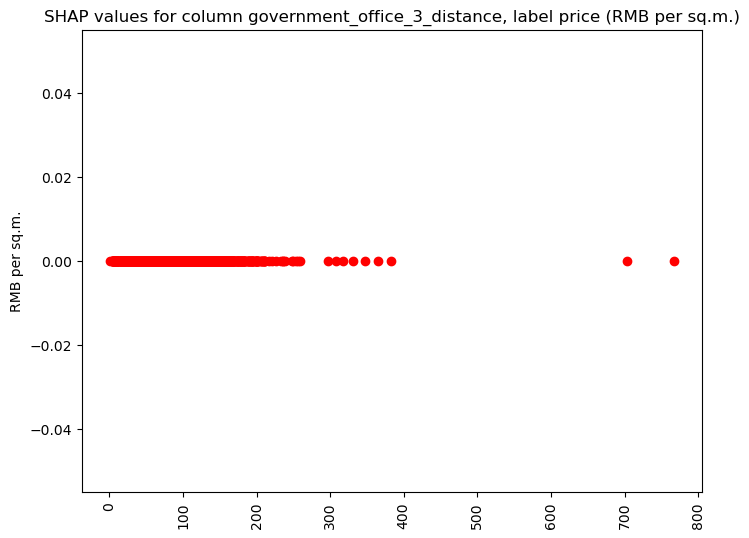

         gain  gain_std  count
col                           
0.992     0.0       0.0      9
99.860    0.0       NaN      1
99.103    0.0       NaN      1
99.373    0.0       NaN      1
99.409    0.0       NaN      1
...       ...       ...    ...
63.119    0.0       NaN      1
63.043    0.0       NaN      1
63.006    0.0       NaN      1
62.971    0.0       NaN      1
766.823   0.0       NaN      1

[2253 rows x 3 columns]

government_office_4_distance



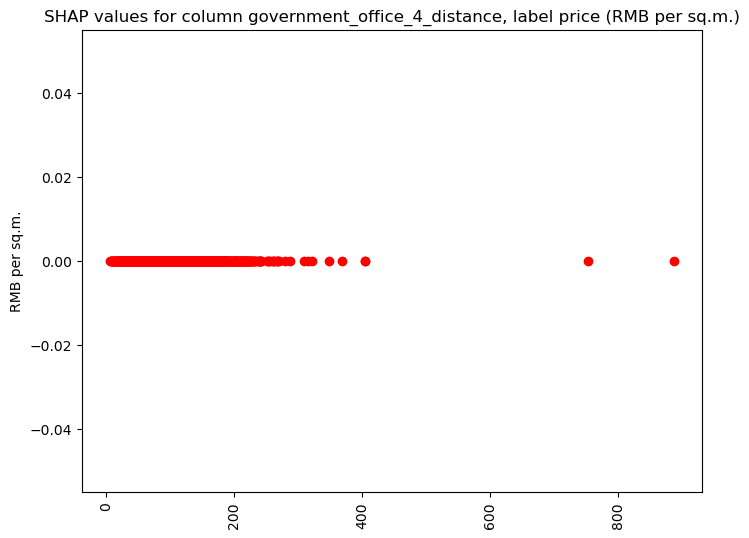

         gain  gain_std  count
col                           
6.052     0.0       NaN      1
116.926   0.0       NaN      1
116.135   0.0       NaN      1
116.403   0.0       NaN      1
116.462   0.0       NaN      1
...       ...       ...    ...
74.595    0.0       NaN      1
74.303    0.0       NaN      1
74.258    0.0       NaN      1
74.190    0.0       NaN      1
887.530   0.0       NaN      1

[2261 rows x 3 columns]

government_office_5_distance



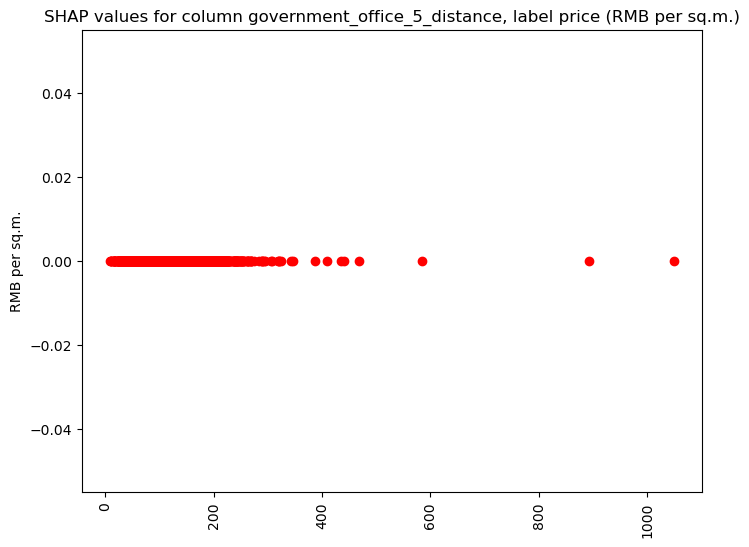

          gain  gain_std  count
col                            
9.233      0.0       NaN      1
130.746    0.0       NaN      1
130.369    0.0       NaN      1
130.412    0.0       NaN      1
130.425    0.0       NaN      1
...        ...       ...    ...
85.141     0.0       NaN      1
85.100     0.0       0.0      2
85.093     0.0       NaN      1
85.002     0.0       NaN      1
1048.840   0.0       NaN      1

[2252 rows x 3 columns]

general_hospital_1_distance



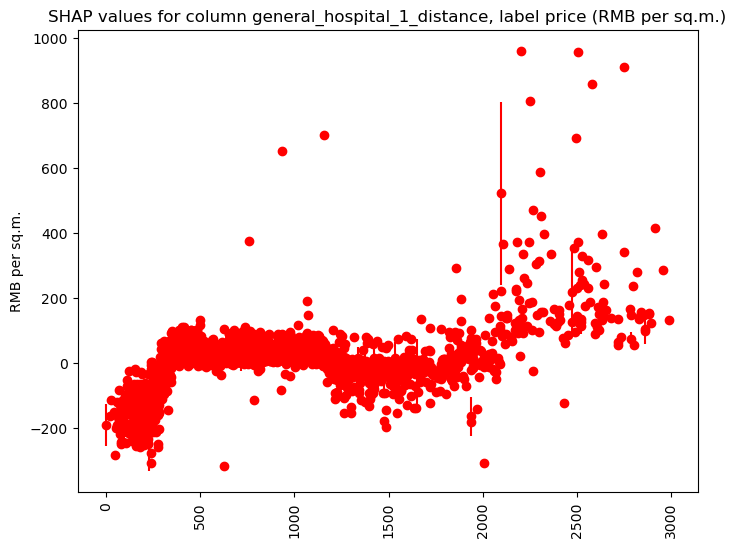

                gain  gain_std  count
col                                  
2202.240  959.717712       NaN      1
2505.100  956.222290       NaN      1
2749.640  911.374084       NaN      1
2578.420  858.521790       NaN      1
2252.570  803.803406       NaN      1
...              ...       ...    ...
238.794  -277.958801       NaN      1
49.267   -282.687805       NaN      1
241.605  -306.575104       NaN      1
2005.730 -308.853790       NaN      1
625.308  -315.867798       NaN      1

[2205 rows x 3 columns]

general_hospital_2_distance



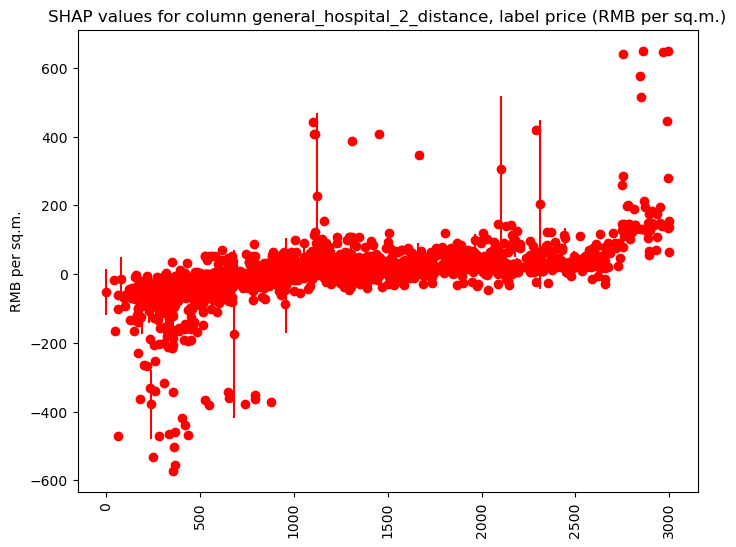

                gain  gain_std  count
col                                  
2858.150  649.441406       NaN      1
2994.530  649.436218       NaN      1
2964.740  646.022583       NaN      1
2753.750  640.005371       NaN      1
2843.780  575.063171       NaN      1
...              ...       ...    ...
281.863  -470.976807       NaN      1
360.134  -502.760986       NaN      1
251.015  -532.455994       NaN      1
366.354  -554.879211       NaN      1
355.398  -572.282776       NaN      1

[2086 rows x 3 columns]

general_hospital_3_distance



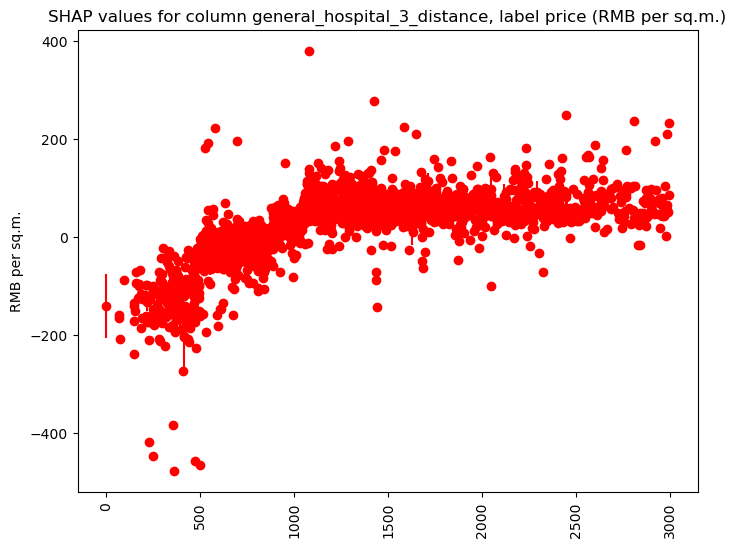

                gain  gain_std  count
col                                  
1082.000  380.291901       NaN      1
1425.620  278.294403       NaN      1
2447.240  249.445999       NaN      1
2808.880  236.617401       NaN      1
2994.490  232.839294       NaN      1
...              ...       ...    ...
228.720  -418.663391       NaN      1
249.652  -446.414795       NaN      1
475.441  -456.254486       NaN      1
500.055  -464.509491       NaN      1
364.300  -476.433990       NaN      1

[1940 rows x 3 columns]

general_hospital_4_distance



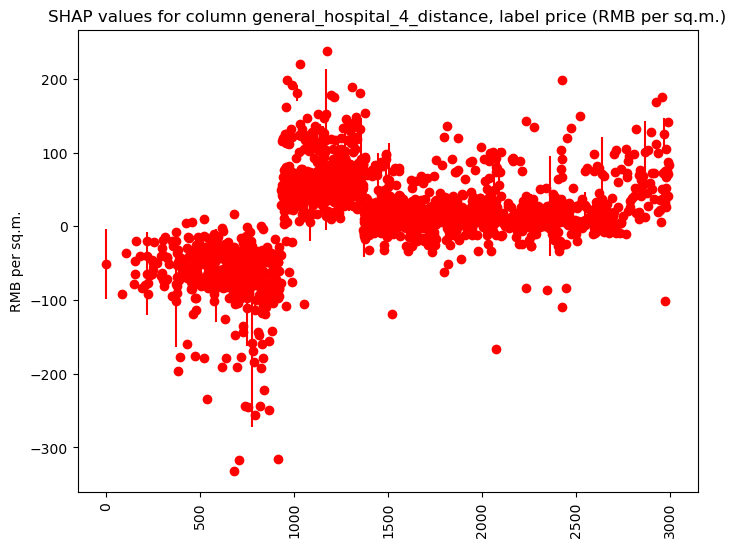

                gain  gain_std  count
col                                  
1173.130  238.206207       NaN      1
1030.400  219.798492       NaN      1
2427.470  198.452194       NaN      1
964.865   198.298904       NaN      1
989.675   191.408798       NaN      1
...              ...       ...    ...
866.314  -249.737396       NaN      1
792.480  -256.207001       NaN      1
914.224  -315.381104       NaN      1
708.824  -317.309906       NaN      1
683.423  -331.605103       NaN      1

[1837 rows x 3 columns]

general_hospital_5_distance



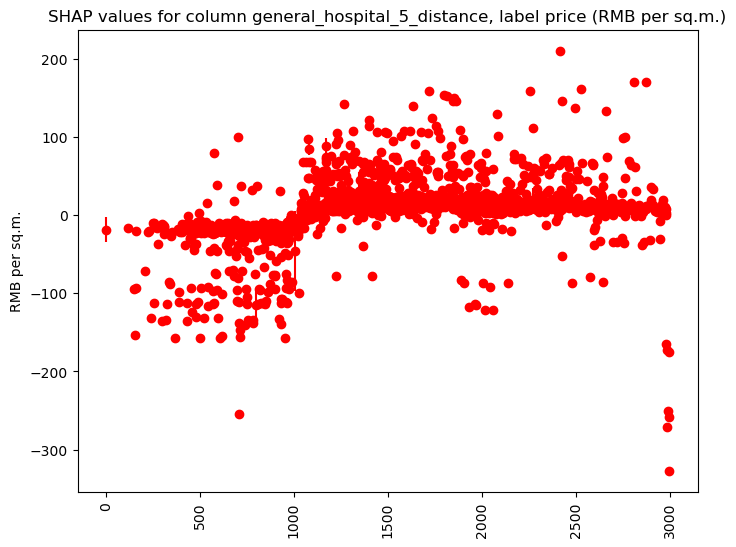

                gain  gain_std  count
col                                  
2416.850  210.139008       NaN      1
2873.480  170.687897       NaN      1
2809.720  169.954102       NaN      1
2528.140  160.889099       NaN      1
1721.190  158.182098       NaN      1
...              ...       ...    ...
2989.590 -250.996597       NaN      1
706.924  -254.155396       NaN      1
2994.820 -258.755798       NaN      1
2984.080 -270.422211       NaN      1
2998.980 -327.016602       NaN      1

[1757 rows x 3 columns]

clinic_1_distance



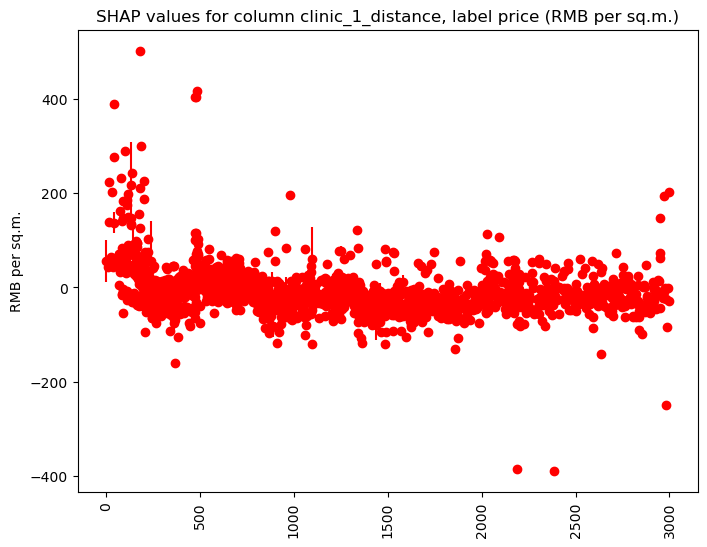

                gain  gain_std  count
col                                  
181.964   502.299194       NaN      1
486.428   416.924805       NaN      1
482.144   404.898010       NaN      1
474.358   404.240997       NaN      1
40.685    388.947113       NaN      1
...              ...       ...    ...
2635.220 -140.391006       NaN      1
368.220  -161.129303       NaN      1
2983.570 -249.297302       NaN      1
2186.770 -385.328705       NaN      1
2384.040 -389.027191       NaN      1

[1950 rows x 3 columns]

clinic_2_distance



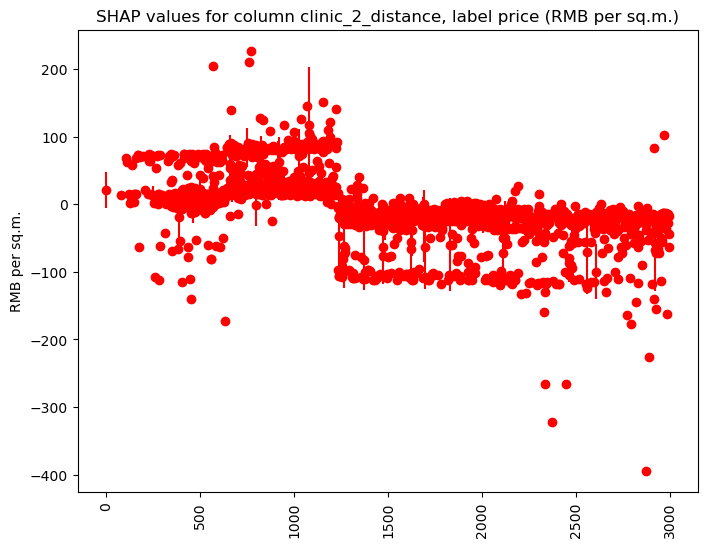

                gain  gain_std  count
col                                  
773.033   227.158295       NaN      1
759.769   210.459396       NaN      1
571.816   205.253403       NaN      1
1153.480  151.424393       NaN      1
1071.700  145.559799       NaN      1
...              ...       ...    ...
2889.740 -226.156601       NaN      1
2444.090 -265.633606       NaN      1
2332.210 -265.633606       NaN      1
2370.430 -321.554504       NaN      1
2872.500 -394.303314       NaN      1

[1722 rows x 3 columns]

clinic_3_distance



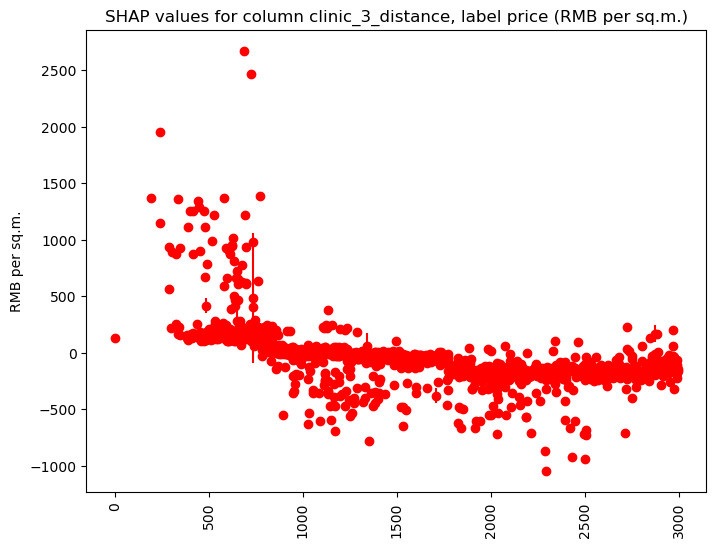

                 gain  gain_std  count
col                                   
688.866   2673.219727       NaN      1
725.115   2465.484131       NaN      1
240.793   1950.568359       NaN      1
773.390   1387.005737       NaN      1
581.329   1374.056396       NaN      1
...               ...       ...    ...
1354.370  -784.986206       NaN      1
2291.320  -871.048279       NaN      1
2431.520  -925.225830       NaN      1
2500.280  -943.710571       NaN      1
2293.170 -1044.693970       NaN      1

[1388 rows x 3 columns]

clinic_4_distance



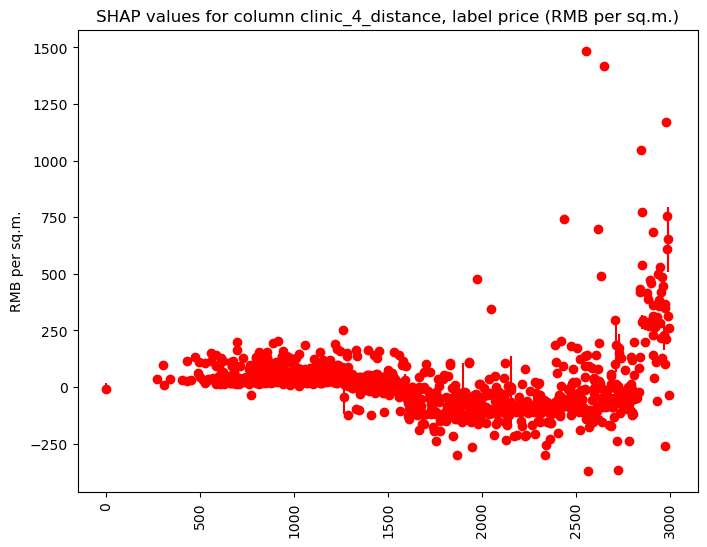

                gain  gain_std  count
col                                  
2551.65  1485.429688       NaN      1
2649.49  1416.124146       NaN      1
2979.76  1169.201660       NaN      1
2846.66  1045.452393       NaN      1
2849.17   771.357422       NaN      1
...              ...       ...    ...
1947.95  -265.656799       NaN      1
2333.49  -300.264191       NaN      1
1868.86  -301.445801       NaN      1
2724.57  -367.357300       NaN      1
2563.64  -369.836212       NaN      1

[1139 rows x 3 columns]

clinic_5_distance



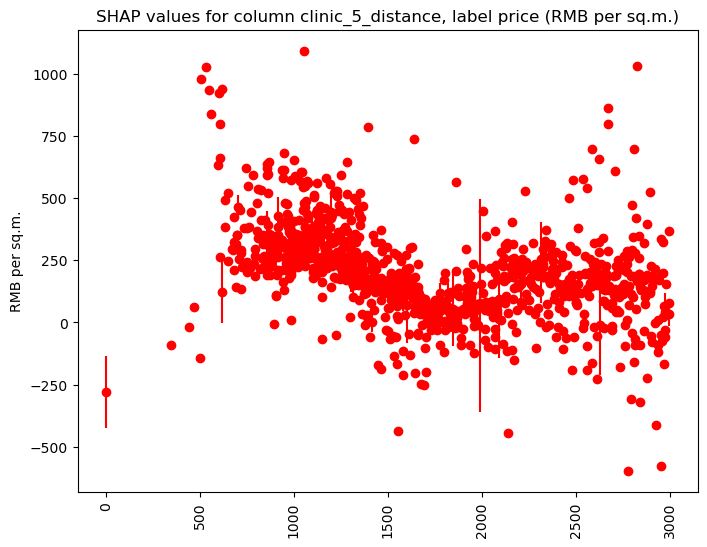

                 gain  gain_std  count
col                                   
1052.800  1092.533081       NaN      1
2823.400  1032.307983       NaN      1
534.215   1027.880127       NaN      1
506.824    979.566101       NaN      1
615.600    938.869812       NaN      1
...               ...       ...    ...
2928.380  -411.432495       NaN      1
1555.520  -434.646393       NaN      1
2137.820  -444.963989       NaN      1
2950.150  -578.966797       NaN      1
2778.740  -596.507202       NaN      1

[1046 rows x 3 columns]

supermarket_1_distance



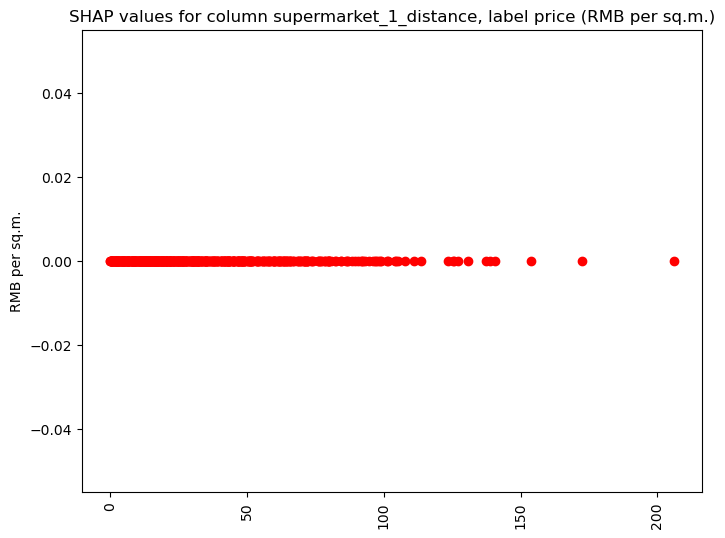

         gain  gain_std  count
col                           
0.000     0.0       0.0   1929
41.454    0.0       NaN      1
40.489    0.0       NaN      1
40.684    0.0       NaN      1
40.690    0.0       NaN      1
...       ...       ...    ...
15.854    0.0       NaN      1
15.767    0.0       NaN      1
15.378    0.0       NaN      1
15.285    0.0       NaN      1
205.982   0.0       NaN      1

[567 rows x 3 columns]

supermarket_2_distance



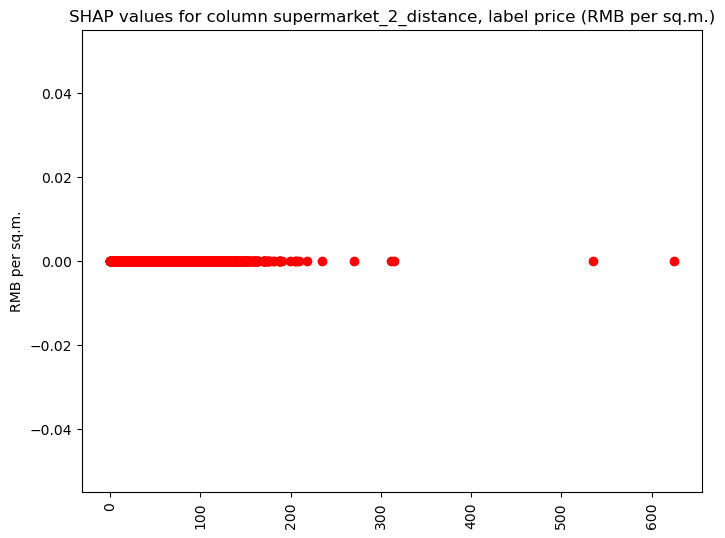

         gain  gain_std  count
col                           
0.000     0.0       0.0    142
77.221    0.0       NaN      1
76.937    0.0       NaN      1
77.098    0.0       NaN      1
77.147    0.0       NaN      1
...       ...       ...    ...
42.879    0.0       NaN      1
42.847    0.0       NaN      1
42.831    0.0       NaN      1
42.816    0.0       0.0      2
624.605   0.0       NaN      1

[2225 rows x 3 columns]

supermarket_3_distance



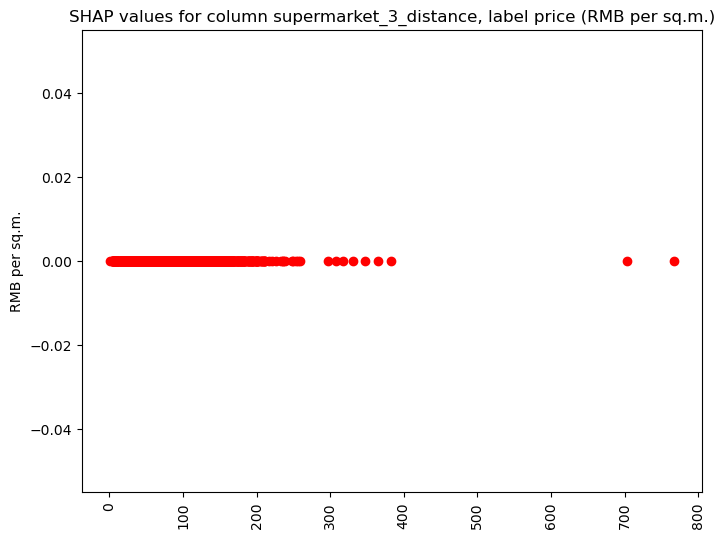

         gain  gain_std  count
col                           
0.992     0.0       0.0      9
99.860    0.0       NaN      1
99.103    0.0       NaN      1
99.373    0.0       NaN      1
99.409    0.0       NaN      1
...       ...       ...    ...
63.119    0.0       NaN      1
63.043    0.0       NaN      1
63.006    0.0       NaN      1
62.971    0.0       NaN      1
766.823   0.0       NaN      1

[2253 rows x 3 columns]

supermarket_4_distance



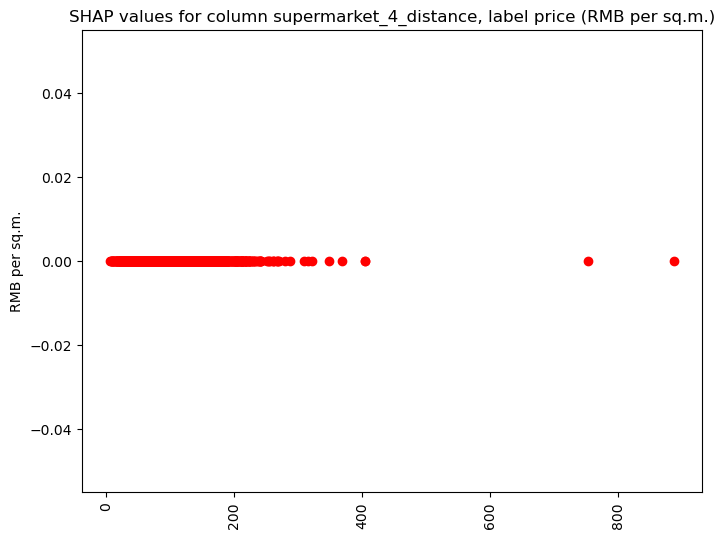

         gain  gain_std  count
col                           
6.052     0.0       NaN      1
116.926   0.0       NaN      1
116.135   0.0       NaN      1
116.403   0.0       NaN      1
116.462   0.0       NaN      1
...       ...       ...    ...
74.595    0.0       NaN      1
74.303    0.0       NaN      1
74.258    0.0       NaN      1
74.190    0.0       NaN      1
887.530   0.0       NaN      1

[2261 rows x 3 columns]

supermarket_5_distance



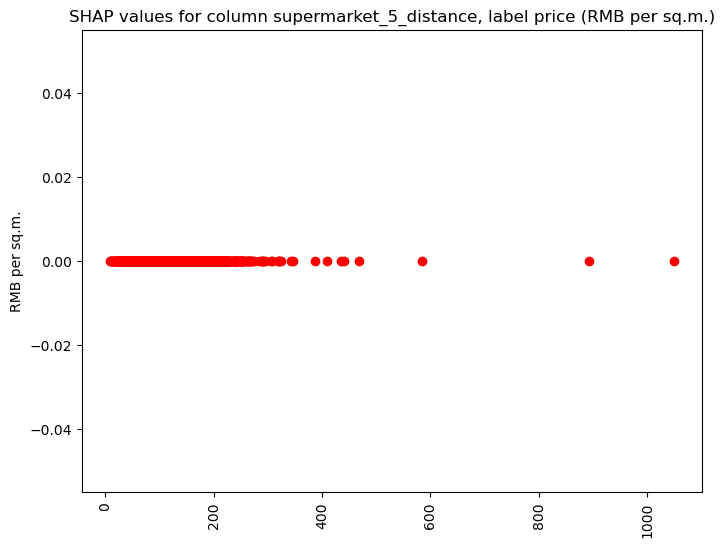

          gain  gain_std  count
col                            
9.233      0.0       NaN      1
130.746    0.0       NaN      1
130.369    0.0       NaN      1
130.412    0.0       NaN      1
130.425    0.0       NaN      1
...        ...       ...    ...
85.141     0.0       NaN      1
85.100     0.0       0.0      2
85.093     0.0       NaN      1
85.002     0.0       NaN      1
1048.840   0.0       NaN      1

[2252 rows x 3 columns]

bank_1_distance



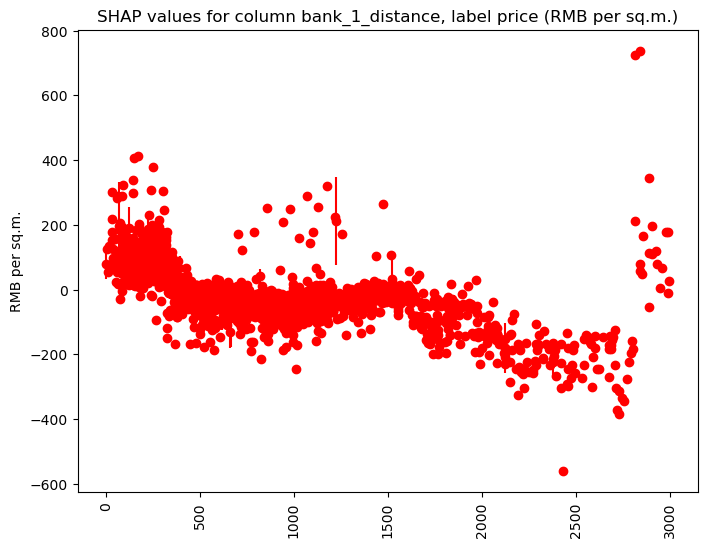

                gain  gain_std  count
col                                  
2840.650  737.841309       NaN      1
2815.880  724.267822       NaN      1
173.023   413.868500       NaN      1
147.115   407.515503       NaN      1
249.994   377.508606       NaN      1
...              ...       ...    ...
2746.710 -334.110291       NaN      1
2757.360 -345.370514       NaN      1
2719.400 -371.814606       NaN      1
2730.910 -383.516815       NaN      1
2429.650 -560.154419       NaN      1

[2103 rows x 3 columns]

bank_2_distance



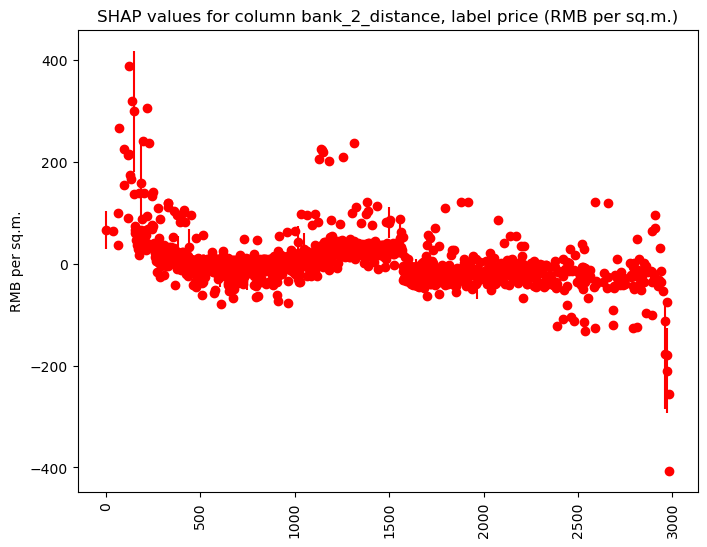

                gain    gain_std  count
col                                    
120.118   388.758514         NaN      1
136.910   318.820801         NaN      1
216.454   306.562012         NaN      1
149.704   299.494904  118.541000      2
70.397    265.591187         NaN      1
...              ...         ...    ...
2959.460 -177.176498  108.561996      3
2969.020 -179.975601         NaN      1
2972.610 -209.700104   83.961700      3
2979.740 -255.376007         NaN      1
2983.370 -406.445190         NaN      1

[1957 rows x 3 columns]

bank_3_distance



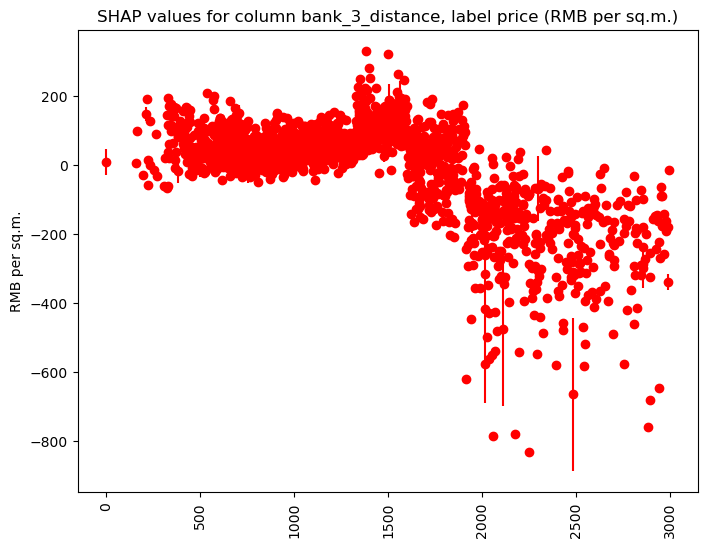

               gain  gain_std  count
col                                 
1383.25  332.125214       NaN      1
1500.68  323.820404       NaN      1
1400.53  281.061188       NaN      1
1553.07  264.006012       NaN      1
1405.83  252.063004       NaN      1
...             ...       ...    ...
2892.39 -680.728577       NaN      1
2883.22 -757.740417       NaN      1
2177.90 -779.117371       NaN      1
2061.07 -783.021484       NaN      1
2249.98 -832.051025       NaN      1

[1824 rows x 3 columns]

bank_4_distance



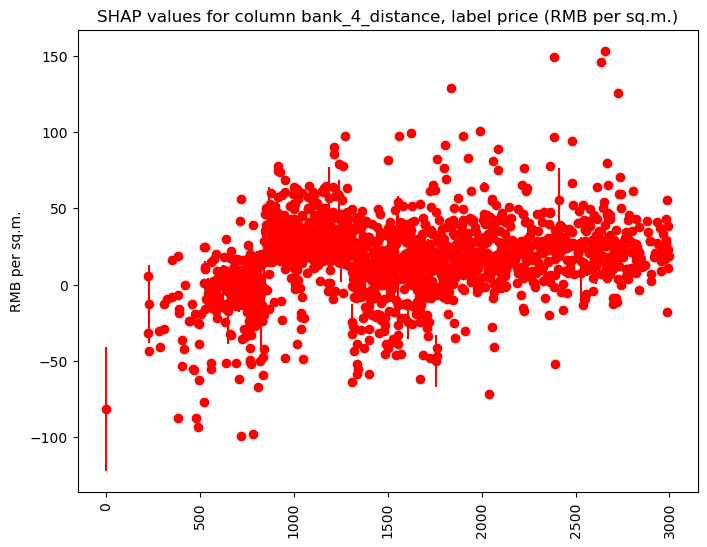

                gain  gain_std  count
col                                  
2658.040  153.286102       NaN      1
2383.420  149.395599       NaN      1
2637.010  146.250107       NaN      1
1838.590  128.867004       NaN      1
2724.070  125.542099       NaN      1
...              ...       ...    ...
384.686   -87.343903       NaN      1
477.886   -87.428101       NaN      1
487.701   -93.426399       NaN      1
782.388   -98.208702       NaN      1
721.775   -99.342300       NaN      1

[1724 rows x 3 columns]

bank_5_distance



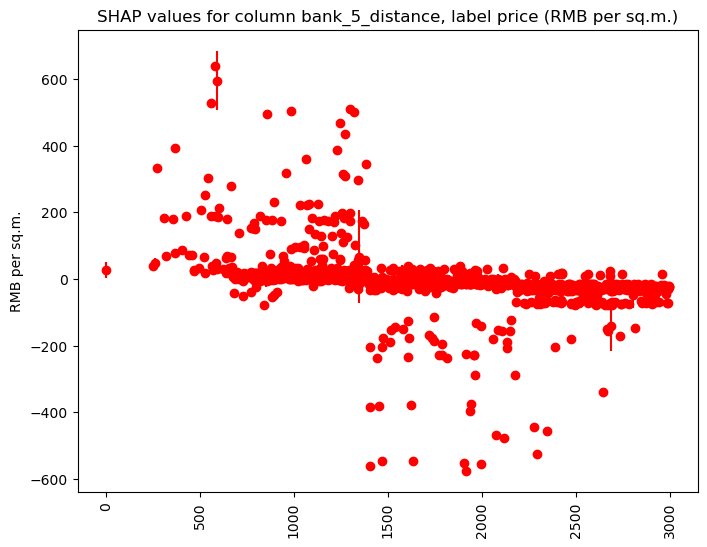

                gain  gain_std  count
col                                  
581.862   639.866699       NaN      1
591.496   595.821106   89.2836      3
560.801   528.086914       NaN      1
1301.210  509.051788       NaN      1
982.701   502.794006       NaN      1
...              ...       ...    ...
1633.110 -547.455505       NaN      1
1903.880 -553.874573       NaN      1
1998.180 -555.834229       NaN      1
1404.970 -561.930420       NaN      1
1918.910 -576.053589       NaN      1

[1643 rows x 3 columns]

scenic_spot_1_distance



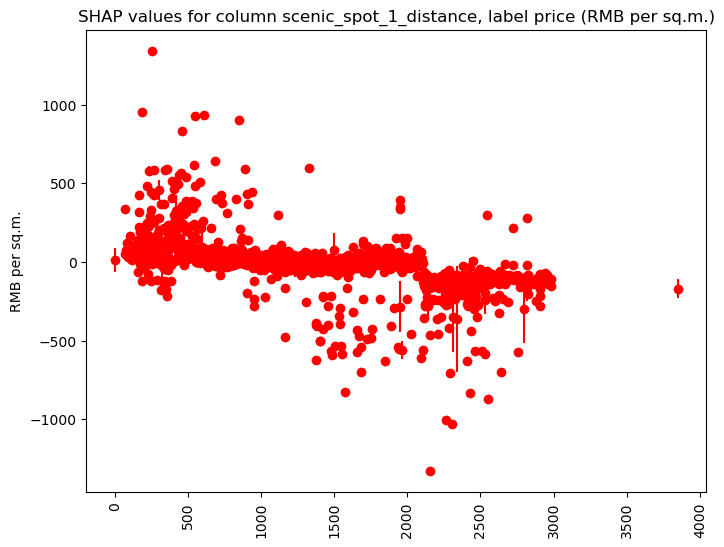

                 gain  gain_std  count
col                                   
256.551   1342.045776       NaN      1
184.879    952.121582       NaN      1
611.597    935.727173       NaN      1
547.009    929.592529       NaN      1
846.238    902.583313       NaN      1
...               ...       ...    ...
2429.010  -831.990784       NaN      1
2552.080  -873.867676       NaN      1
2265.030 -1004.968079       NaN      1
2304.640 -1029.094971       NaN      1
2158.380 -1326.945923       NaN      1

[2160 rows x 3 columns]

scenic_spot_2_distance



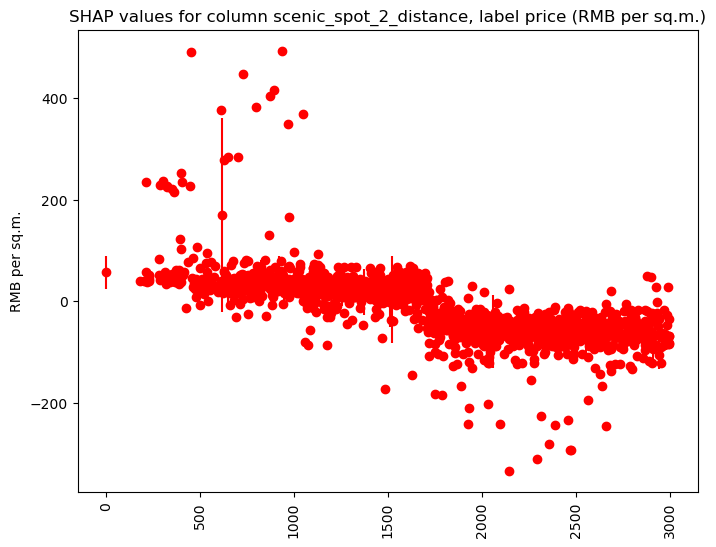

                gain  gain_std  count
col                                  
934.500   493.693115       NaN      1
455.166   491.771606       NaN      1
728.381   447.471985       NaN      1
896.038   416.702301       NaN      1
872.413   403.978699       NaN      1
...              ...       ...    ...
2355.450 -280.666595       NaN      1
2472.650 -292.631409       NaN      1
2471.690 -292.650909       NaN      1
2292.460 -310.655212       NaN      1
2143.060 -333.532410       NaN      1

[1949 rows x 3 columns]

scenic_spot_3_distance



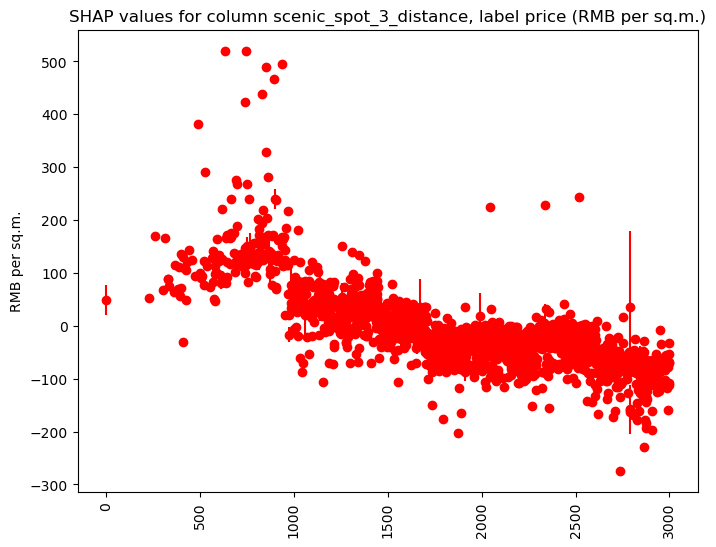

                gain  gain_std  count
col                                  
634.366   520.244690       NaN      1
747.083   520.049805       NaN      1
935.154   495.979187       NaN      1
854.040   489.024811       NaN      1
894.441   466.950592       NaN      1
...              ...       ...    ...
2875.920 -192.396194       NaN      1
2908.100 -197.478897       NaN      1
1875.280 -202.588806       NaN      1
2865.680 -229.297195       NaN      1
2739.120 -274.139008       NaN      1

[1694 rows x 3 columns]

scenic_spot_4_distance



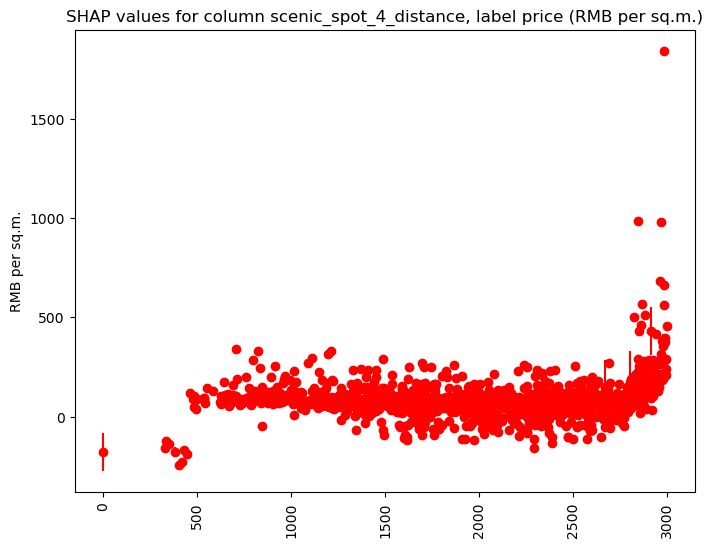

                  gain   gain_std  count
col                                     
 2983.740  1843.919556        NaN      1
 2845.730   985.581909        NaN      1
 2969.070   979.564270        NaN      1
 2961.450   682.120605        NaN      1
 2986.890   662.642090        NaN      1
...                ...        ...    ...
-1.000     -178.629593  94.646797    924
 383.149   -180.342804  24.933500      5
 447.088   -186.346893        NaN      1
 418.768   -228.703003        NaN      1
 403.746   -243.258408        NaN      1

[1430 rows x 3 columns]

scenic_spot_5_distance



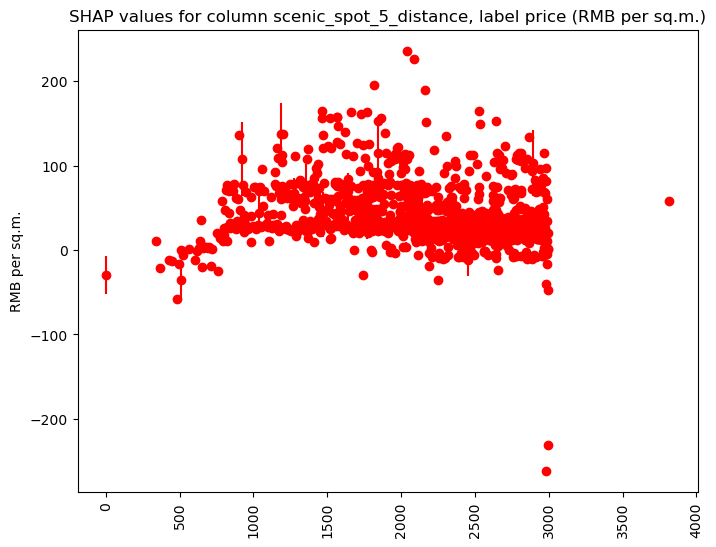

                gain  gain_std  count
col                                  
2038.930  236.043198       NaN      1
2087.190  226.785004       NaN      1
1813.560  196.061600       NaN      1
2159.610  189.608307       NaN      1
1460.890  164.773407       NaN      1
...              ...       ...    ...
2979.530  -39.979198       NaN      1
2992.270  -47.364700       NaN      1
479.621   -58.358398       NaN      1
2992.020 -231.362595       NaN      1
2982.490 -261.441406       NaN      1

[1254 rows x 3 columns]

restaurant_1_distance



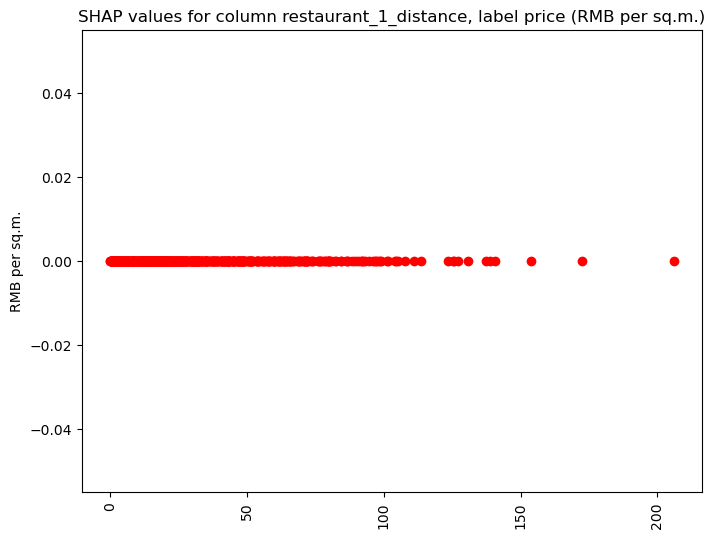

         gain  gain_std  count
col                           
0.000     0.0       0.0   1929
41.454    0.0       NaN      1
40.489    0.0       NaN      1
40.684    0.0       NaN      1
40.690    0.0       NaN      1
...       ...       ...    ...
15.854    0.0       NaN      1
15.767    0.0       NaN      1
15.378    0.0       NaN      1
15.285    0.0       NaN      1
205.982   0.0       NaN      1

[567 rows x 3 columns]

restaurant_2_distance



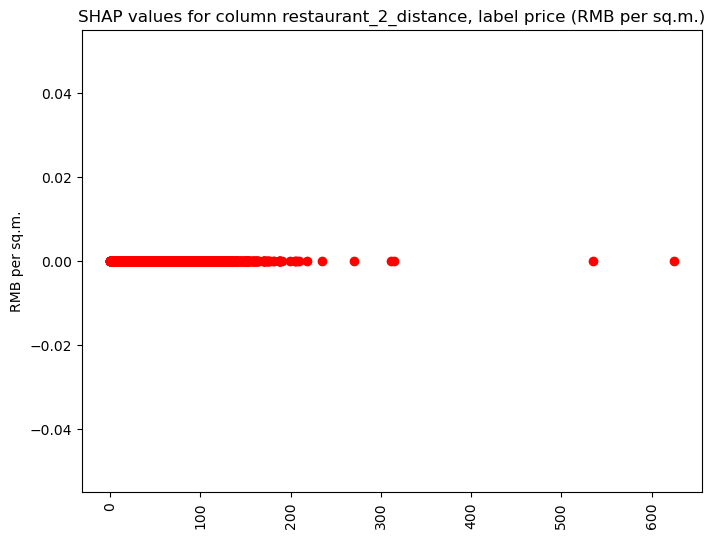

         gain  gain_std  count
col                           
0.000     0.0       0.0    142
77.221    0.0       NaN      1
76.937    0.0       NaN      1
77.098    0.0       NaN      1
77.147    0.0       NaN      1
...       ...       ...    ...
42.879    0.0       NaN      1
42.847    0.0       NaN      1
42.831    0.0       NaN      1
42.816    0.0       0.0      2
624.605   0.0       NaN      1

[2225 rows x 3 columns]

restaurant_3_distance



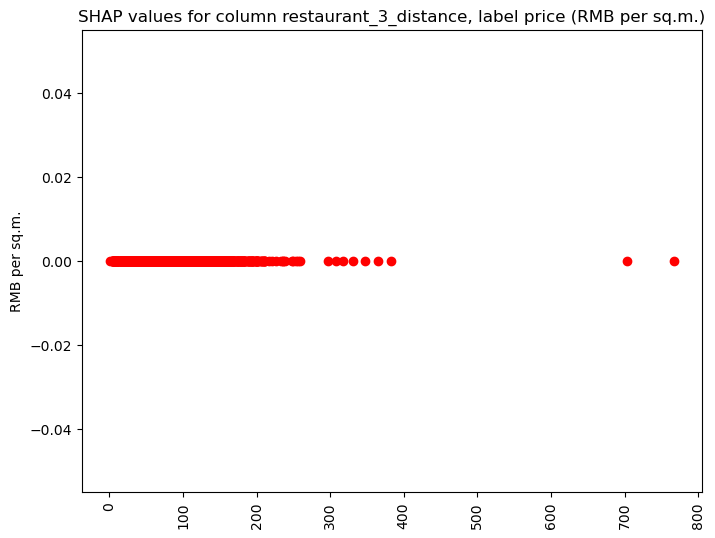

         gain  gain_std  count
col                           
0.992     0.0       0.0      9
99.860    0.0       NaN      1
99.103    0.0       NaN      1
99.373    0.0       NaN      1
99.409    0.0       NaN      1
...       ...       ...    ...
63.119    0.0       NaN      1
63.043    0.0       NaN      1
63.006    0.0       NaN      1
62.971    0.0       NaN      1
766.823   0.0       NaN      1

[2253 rows x 3 columns]

restaurant_4_distance



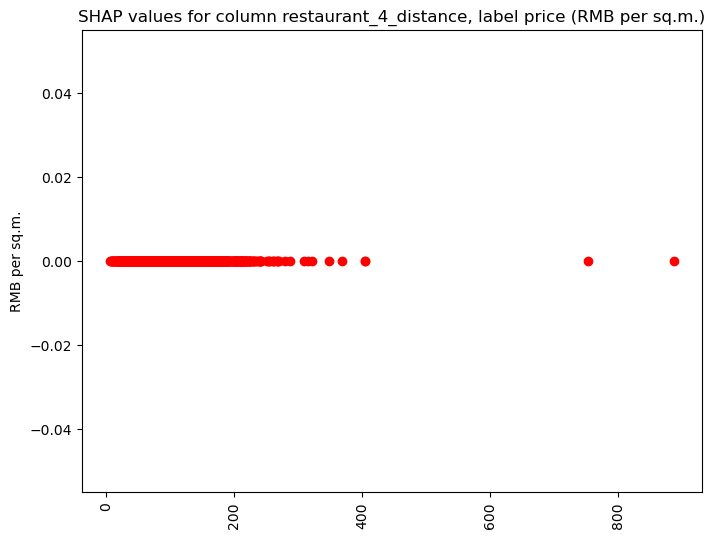

         gain  gain_std  count
col                           
6.052     0.0       NaN      1
116.926   0.0       NaN      1
116.135   0.0       NaN      1
116.403   0.0       NaN      1
116.462   0.0       NaN      1
...       ...       ...    ...
74.595    0.0       NaN      1
74.303    0.0       NaN      1
74.258    0.0       NaN      1
74.190    0.0       NaN      1
887.530   0.0       NaN      1

[2261 rows x 3 columns]

restaurant_5_distance



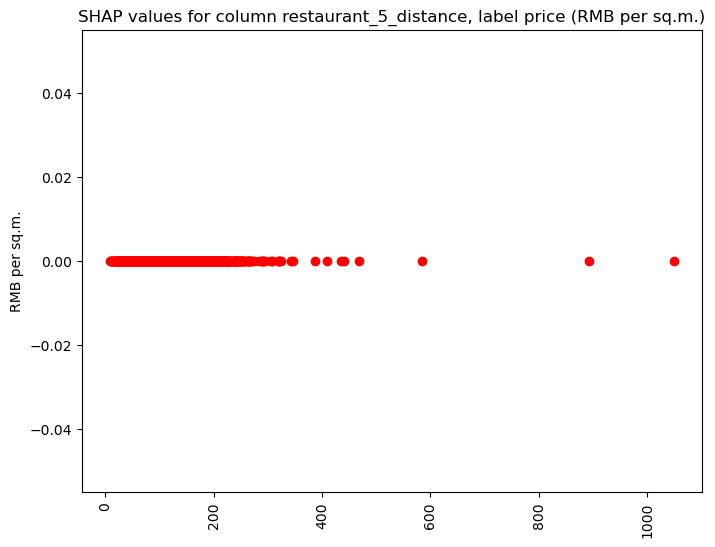

          gain  gain_std  count
col                            
9.233      0.0       NaN      1
130.746    0.0       NaN      1
130.369    0.0       NaN      1
130.412    0.0       NaN      1
130.425    0.0       NaN      1
...        ...       ...    ...
85.141     0.0       NaN      1
85.100     0.0       0.0      2
85.093     0.0       NaN      1
85.002     0.0       NaN      1
1048.840   0.0       NaN      1

[2252 rows x 3 columns]

followers_count



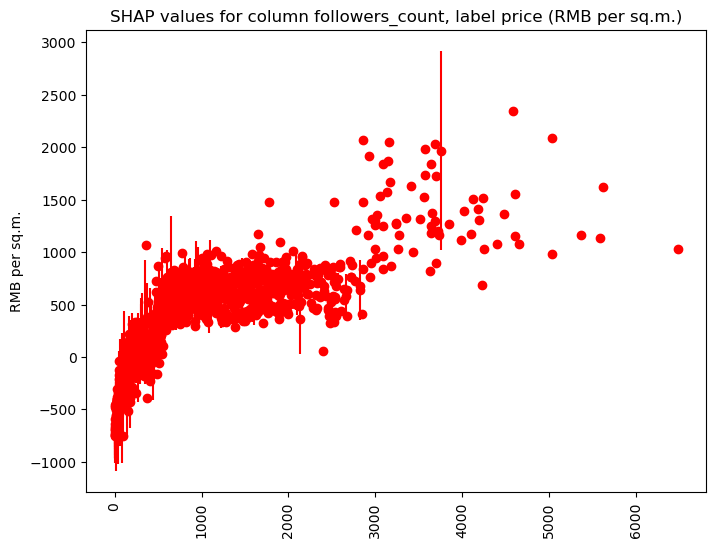

               gain    gain_std  count
col                                   
4580.0  2343.784912         NaN      1
5036.0  2092.029785         NaN      1
2855.0  2064.282715         NaN      1
3152.0  2046.420654         NaN      1
3691.0  2034.440796         NaN      1
...             ...         ...    ...
8.0     -725.646606  288.440186     30
3.0     -746.451599  221.297195     38
0.0     -748.465393  183.129395     55
99.0    -750.656189         NaN      1
2.0     -751.283386  212.212006     42

[1128 rows x 3 columns]

building_type_塔板结合



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22612 (\N{CJK UNIFIED IDEOGRAPH-5854}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


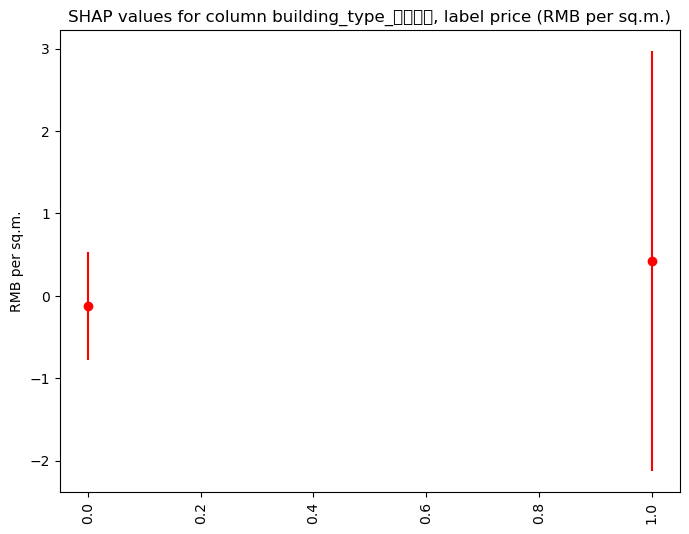

         gain  gain_std  count
col                           
True   0.4206    2.5474    417
False -0.1226    0.6601   2119

building_type_塔板结合/平房



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22612 (\N{CJK UNIFIED IDEOGRAPH-5854}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: G

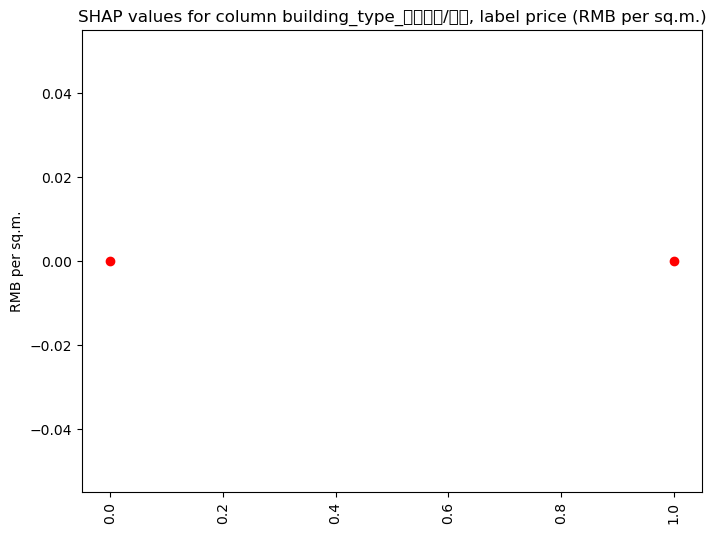

       gain  gain_std  count
col                         
False   0.0       0.0   2518
True    0.0       0.0     18

building_type_塔楼



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22612 (\N{CJK UNIFIED IDEOGRAPH-5854}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


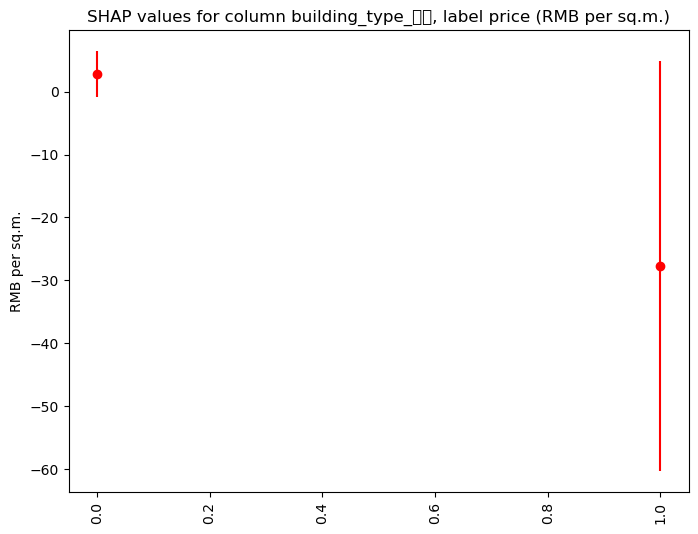

            gain   gain_std  count
col                               
False   2.815500   3.618300   2269
True  -27.703199  32.639301    267

building_type_塔楼/塔板结合



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22612 (\N{CJK UNIFIED IDEOGRAPH-5854}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: G

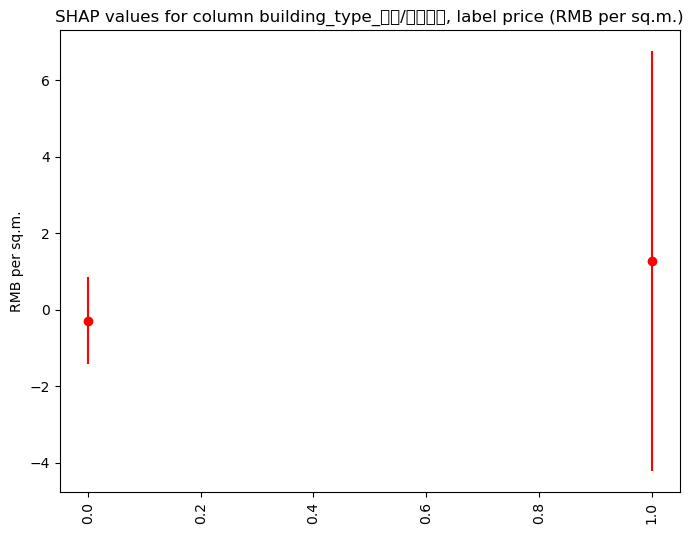

c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22612 (\N{CJK UNIFIED IDEOGRAPH-5854}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


         gain  gain_std  count
col                           
True   1.2645    5.4907    408
False -0.2968    1.1376   2128

building_type_塔楼/塔板结合/平房



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: G

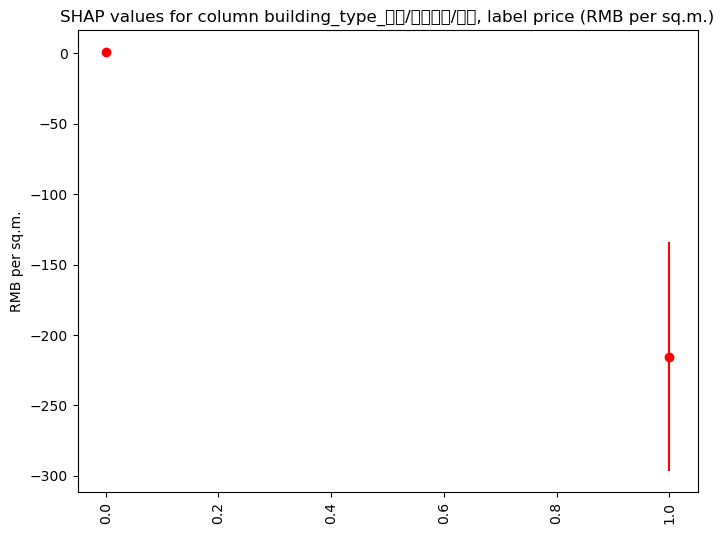

             gain   gain_std  count
col                                
False    1.228400   0.373800   2523
True  -215.421204  81.393204     13

building_type_塔楼/平房



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22612 (\N{CJK UNIFIED IDEOGRAPH-5854}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


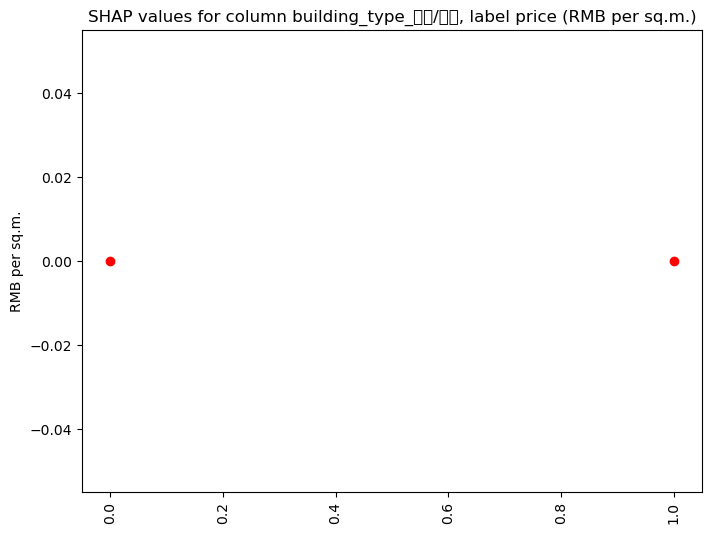

c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22612 (\N{CJK UNIFIED IDEOGRAPH-5854}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


       gain  gain_std  count
col                         
False   0.0       0.0   2527
True    0.0       0.0      9

building_type_塔楼/板楼



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


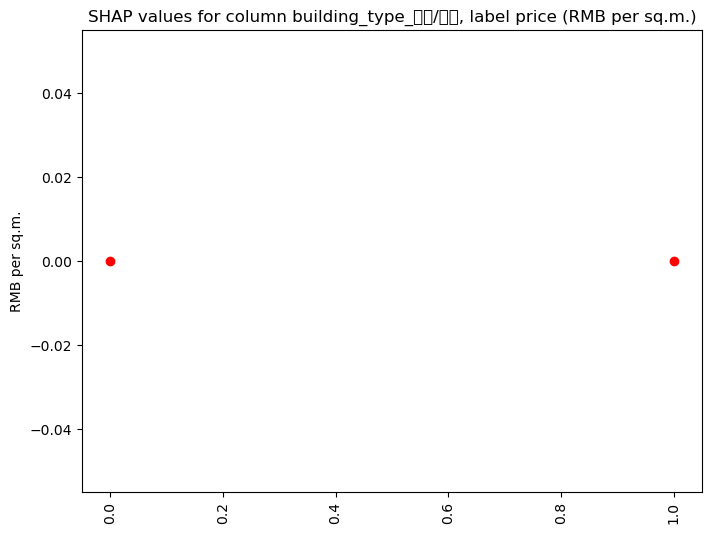

       gain  gain_std  count
col                         
False   0.0       0.0   2321
True    0.0       0.0    215

building_type_塔楼/板楼/塔板结合



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22612 (\N{CJK UNIFIED IDEOGRAPH-5854}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: G

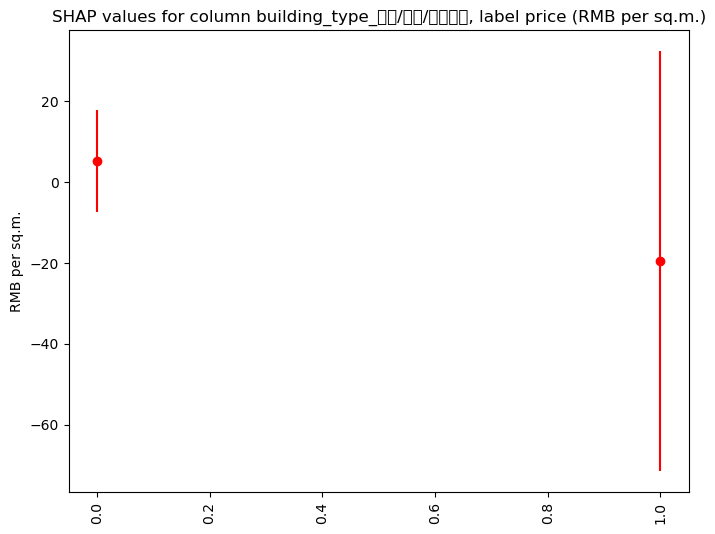

            gain  gain_std  count
col                              
False   5.117100   12.6646   2174
True  -19.575399   51.8923    362

building_type_塔楼/板楼/塔板结合/平房



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22612 (\N{CJK UNIFIED IDEOGRAPH-5854}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: G

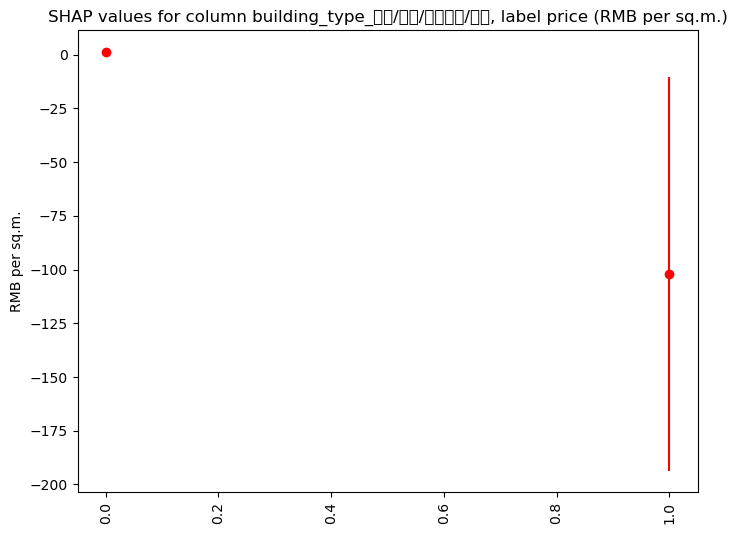

             gain   gain_std  count
col                                
False    1.041000   0.578700   2509
True  -102.072403  91.755402     27

building_type_塔楼/板楼/平房



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22612 (\N{CJK UNIFIED IDEOGRAPH-5854}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: G

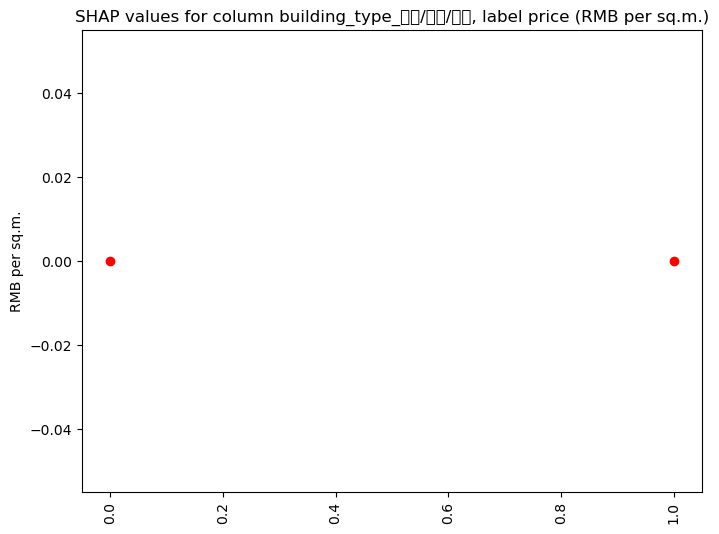

       gain  gain_std  count
col                         
False   0.0       0.0   2530
True    0.0       0.0      6

building_type_平房



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


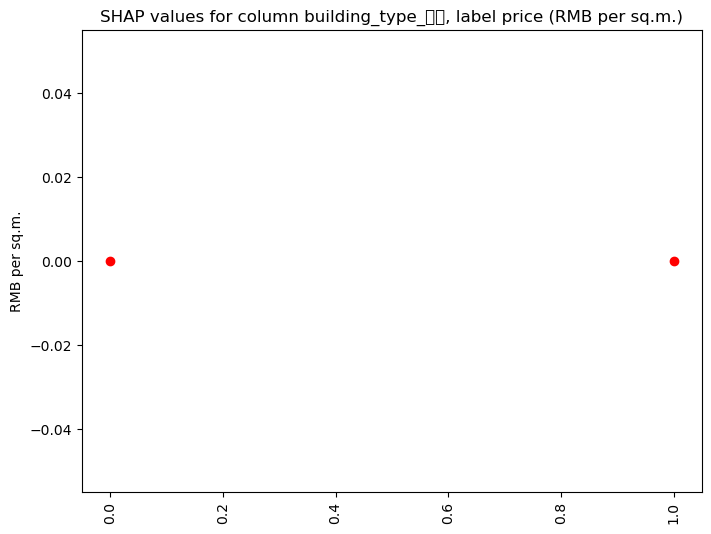

       gain  gain_std  count
col                         
False   0.0       0.0   2526
True    0.0       0.0     10

building_type_未知类型



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30693 (\N{CJK UNIFIED IDEOGRAPH-77E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


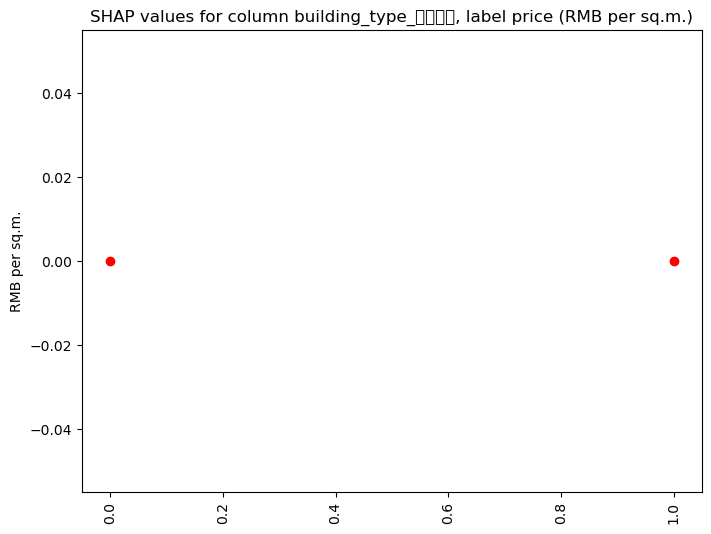

       gain  gain_std  count
col                         
False   0.0       0.0   2513
True    0.0       0.0     23

building_type_板楼



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


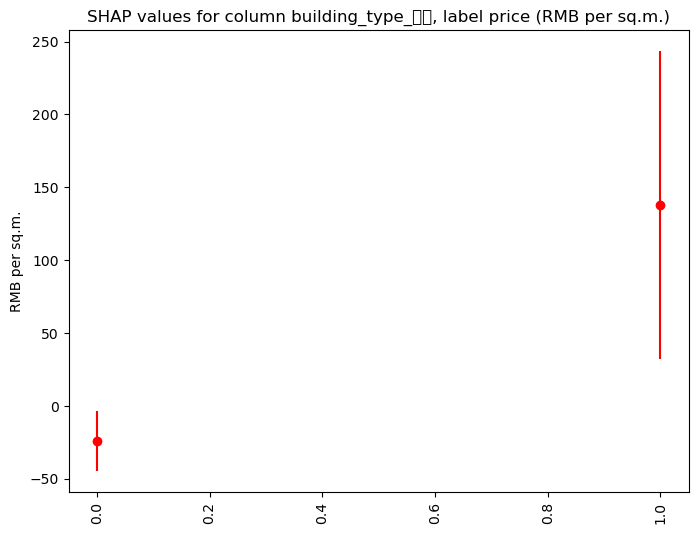

             gain  gain_std  count
col                               
True   137.799103  105.6576    392
False  -24.277300   20.5110   2144

building_type_板楼/塔板结合



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22612 (\N{CJK UNIFIED IDEOGRAPH-5854}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: G

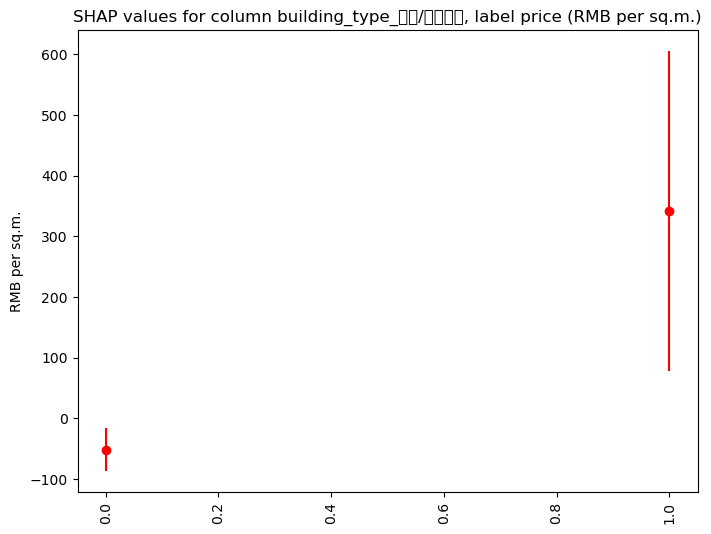

             gain    gain_std  count
col                                 
True   341.658691  263.330811    344
False  -51.277802   35.584599   2192

building_type_板楼/塔板结合/平房



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22612 (\N{CJK UNIFIED IDEOGRAPH-5854}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: G

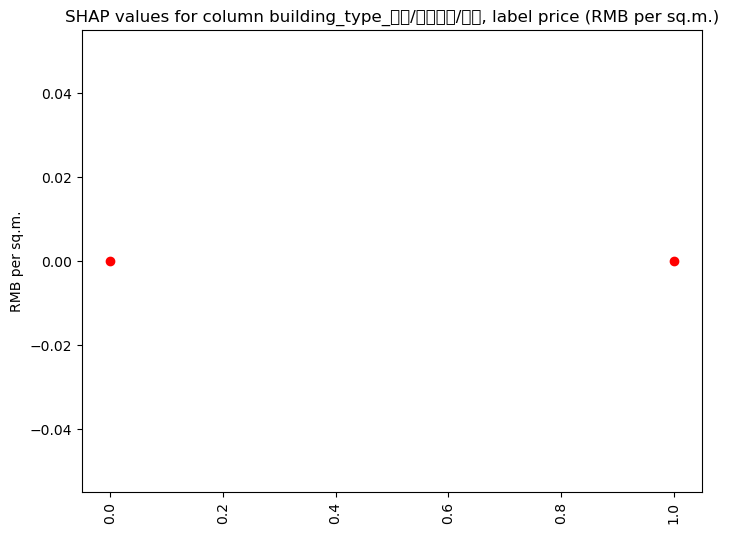

       gain  gain_std  count
col                         
False   0.0       0.0   2519
True    0.0       0.0     17

building_type_板楼/平房



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27004 (\N{CJK UNIFIED IDEOGRAPH-697C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


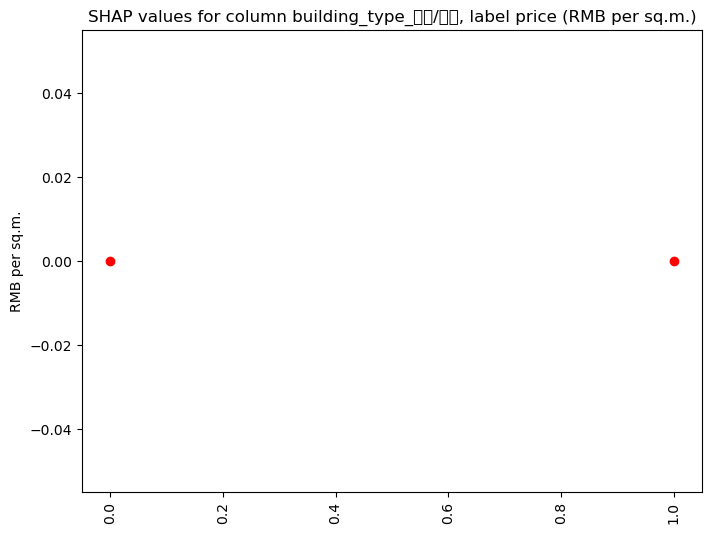

       gain  gain_std  count
col                         
False   0.0       0.0   2528
True    0.0       0.0      8

green_rate



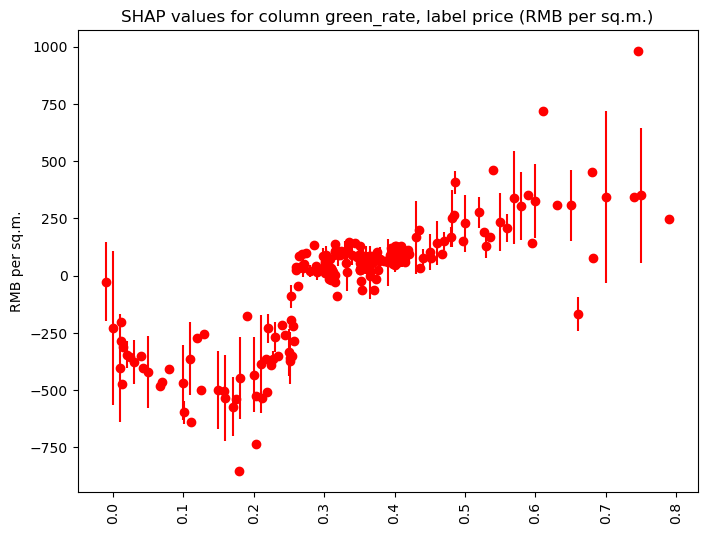

              gain    gain_std  count
col                                  
0.7450  980.278015         NaN      1
0.6100  718.488220         NaN      1
0.5400  460.224701         NaN      1
0.6800  451.055389         NaN      1
0.4854  407.584503   51.300999      2
...            ...         ...    ...
0.1700 -572.607788  129.219193      3
0.1010 -597.537476   48.504101      2
0.1110 -641.030212         NaN      1
0.2027 -733.966614         NaN      1
0.1791 -854.169678         NaN      1

[220 rows x 3 columns]

floor_area_ratio



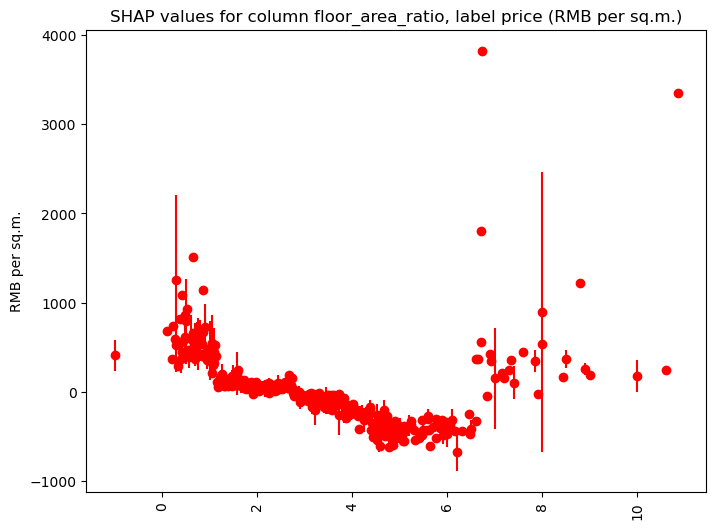

              gain    gain_std  count
col                                  
6.73   3824.113281         NaN      1
10.86  3344.458008         NaN      1
6.71   1797.967041         NaN      1
0.64   1511.668823         NaN      1
0.30   1258.305664  948.659729      2
...            ...         ...    ...
4.86   -593.726196         NaN      1
4.59   -604.759399         NaN      1
5.64   -606.027100         NaN      1
4.77   -618.418030         NaN      1
6.20   -674.271179  207.939896      2

[406 rows x 3 columns]

electricity_type_-1



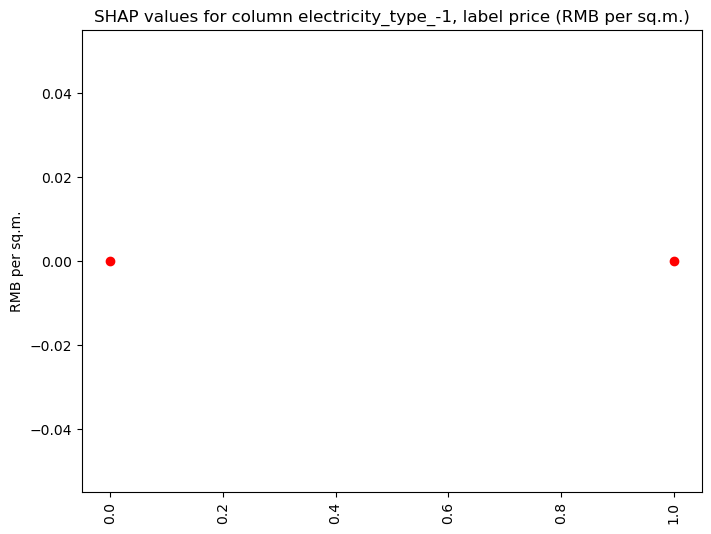

       gain  gain_std  count
col                         
False   0.0       0.0   2490
True    0.0       0.0     46

electricity_type_商电



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


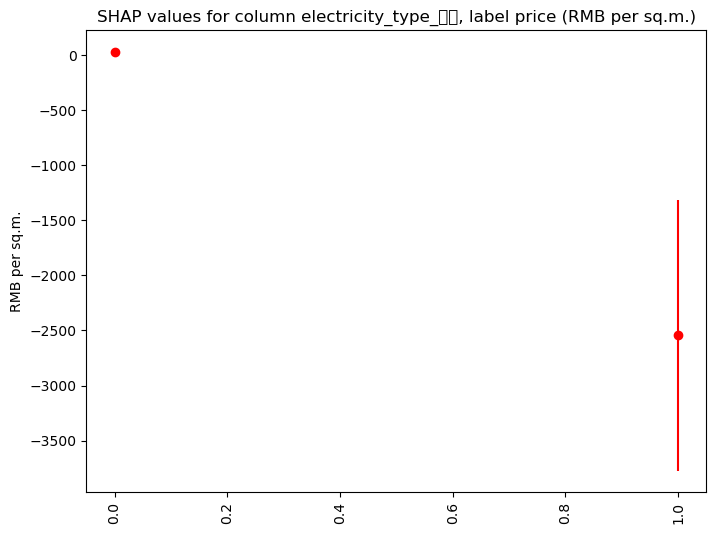

              gain     gain_std  count
col                                   
False    24.719500    10.646700   2515
True  -2543.965332  1232.769409     21

electricity_type_商电/民电



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


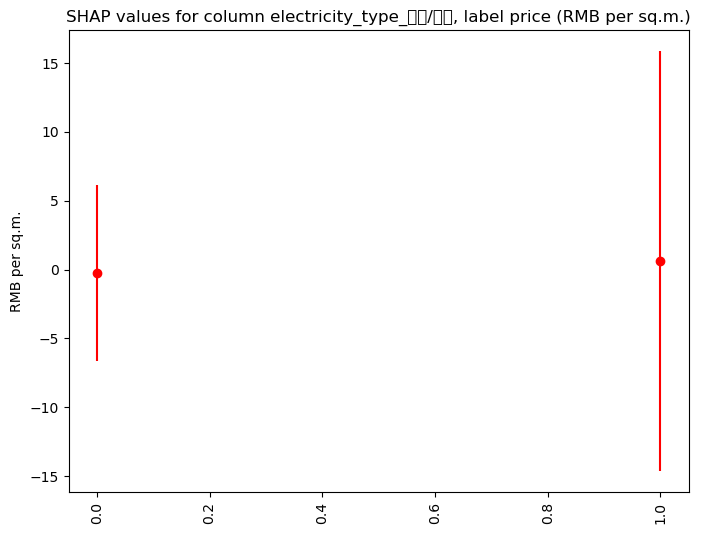

         gain  gain_std  count
col                           
True   0.6100   15.2430   1025
False -0.2573    6.4038   1511

electricity_type_民电



c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


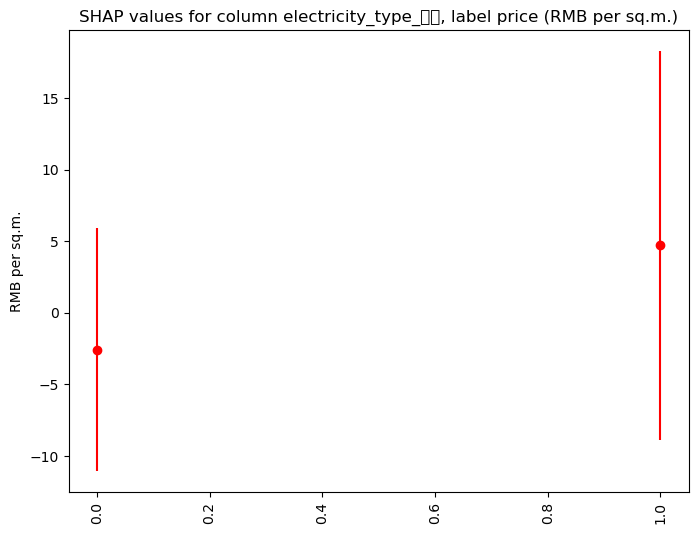

         gain  gain_std  count
col                           
True   4.7036   13.5735   1444
False -2.5892    8.4820   1092

center_distance



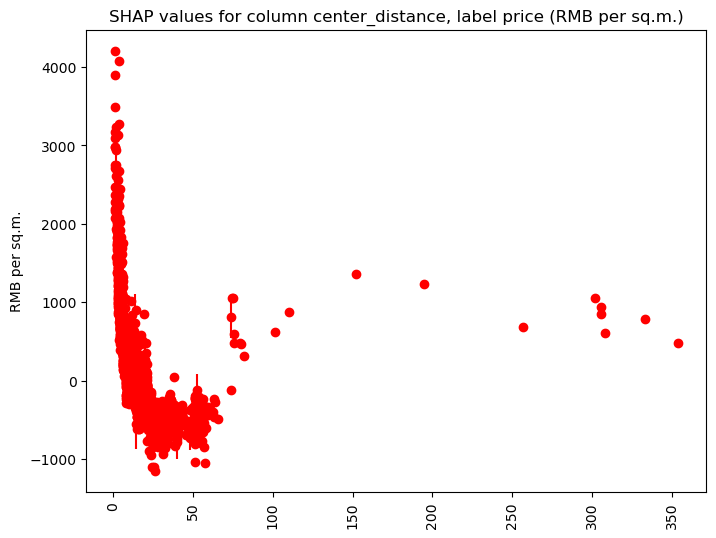

                  gain  gain_std  count
col                                    
1.066291   4207.487305       NaN      1
3.791774   4074.635498       NaN      1
1.085540   3892.731689       NaN      1
1.199792   3484.521240       NaN      1
3.439024   3277.496826       NaN      1
...                ...       ...    ...
51.386337 -1040.592407       NaN      1
57.311310 -1052.904419       NaN      1
24.472914 -1101.110596       NaN      1
25.687127 -1102.459961       NaN      1
26.398218 -1149.362793       NaN      1

[2274 rows x 3 columns]

subcenter_distance



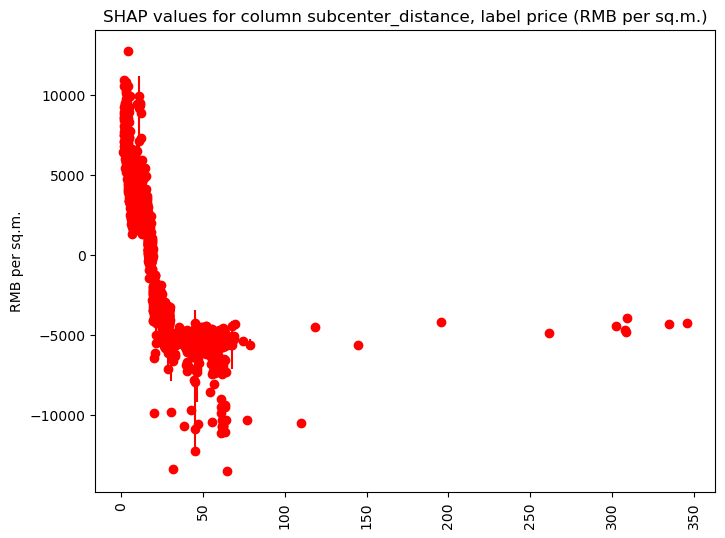

                   gain  gain_std  count
col                                     
4.333766   12750.985352       NaN      1
1.762672   10902.769531       NaN      1
2.949088   10782.944336       NaN      1
4.164107   10543.663086       NaN      1
1.892807   10525.712891       NaN      1
...                 ...       ...    ...
63.591812 -11047.694336       NaN      1
61.141750 -11090.261719       NaN      1
45.243402 -12248.954102       NaN      1
31.734247 -13332.293945       NaN      1
64.493136 -13453.910156       NaN      1

[2274 rows x 3 columns]

built_year



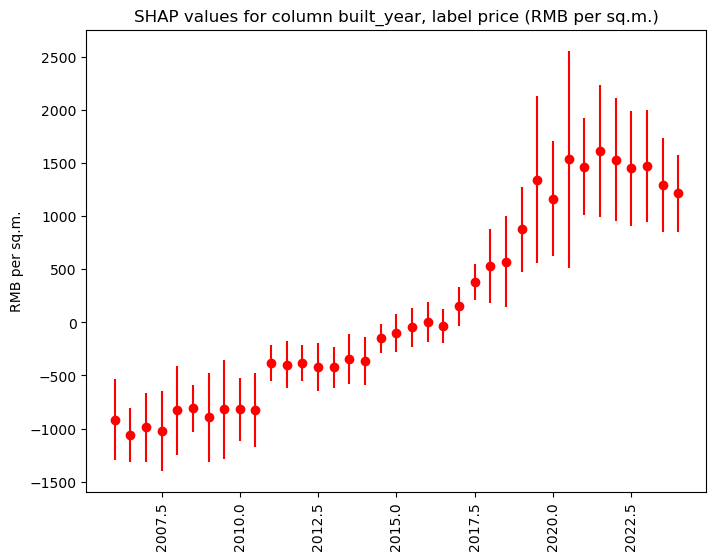

               gain     gain_std  count
col                                    
2021.5  1615.230713   621.763611     40
2020.5  1533.296143  1023.300720     60
2022.0  1530.803955   575.230713     74
2023.0  1467.743164   527.166199     23
2021.0  1464.736084   457.001801    101
2022.5  1449.492554   540.051025     25
2019.5  1340.497192   786.416809     42
2023.5  1291.839966   439.192200      5
2024.0  1214.366943   361.821991      8
2020.0  1163.961304   541.151428     98
2019.0   873.809387   400.826202     83
2018.5   570.069214   427.553192     61
2018.0   527.141174   346.703796     72
2017.5   378.632294   170.572495     53
2017.0   148.704193   186.820099     91
2016.0    -1.069200   187.557205     98
2016.5   -32.218800   161.185593     55
2015.5   -44.577301   183.528595     76
2015.0  -100.884598   178.315399    105
2014.5  -152.069504   139.409805    102
2013.5  -344.324799   236.218002     85
2014.0  -364.281097   223.270493     96
2012.0  -379.800293   168.893494     92


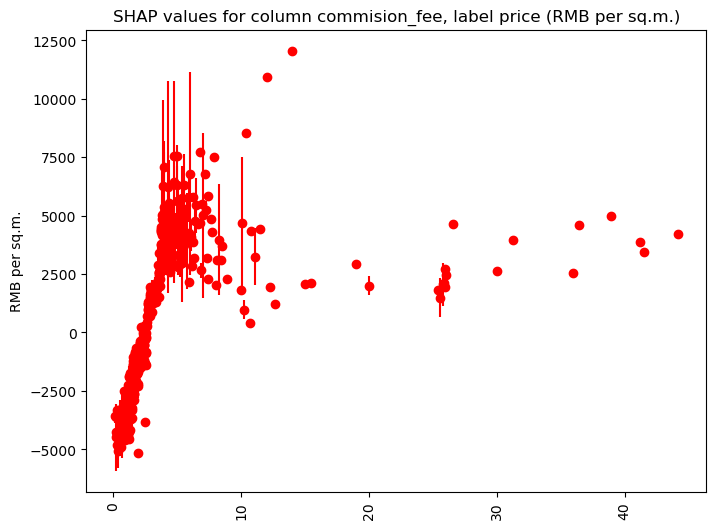

                gain    gain_std  count
col                                    
14.000  12062.795898         NaN      1
12.000  10920.414062         NaN      1
10.400   8531.295898         NaN      1
6.750    7726.638184         NaN      1
4.740    7563.280762         NaN      1
...              ...         ...    ...
0.250   -4822.817383  830.357971      4
0.625   -4898.737305  221.681793      2
0.440   -4912.059570         NaN      1
0.375   -5058.053711         NaN      1
1.965   -5152.234375         NaN      1

[392 rows x 3 columns]

total_housing



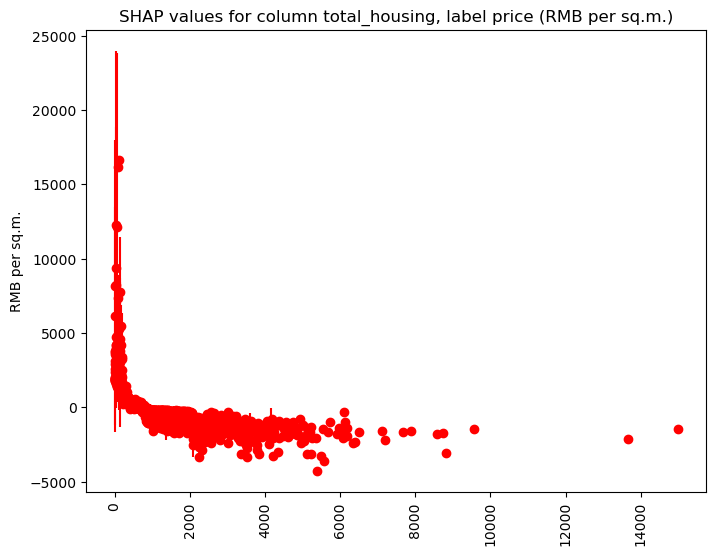

                gain      gain_std  count
col                                      
107.0   16661.056641           NaN      1
93.0    16164.038086           NaN      1
38.0    12280.092773  11696.813477      2
59.0    12117.127930  11728.861328      2
43.0     9401.370117   9451.967773      2
...              ...           ...    ...
5495.0  -3301.609131           NaN      1
2234.0  -3311.402100           NaN      1
3513.0  -3338.258545           NaN      1
5560.0  -3583.541504           NaN      1
5381.0  -4276.821777           NaN      1

[1569 rows x 3 columns]

total_buildings



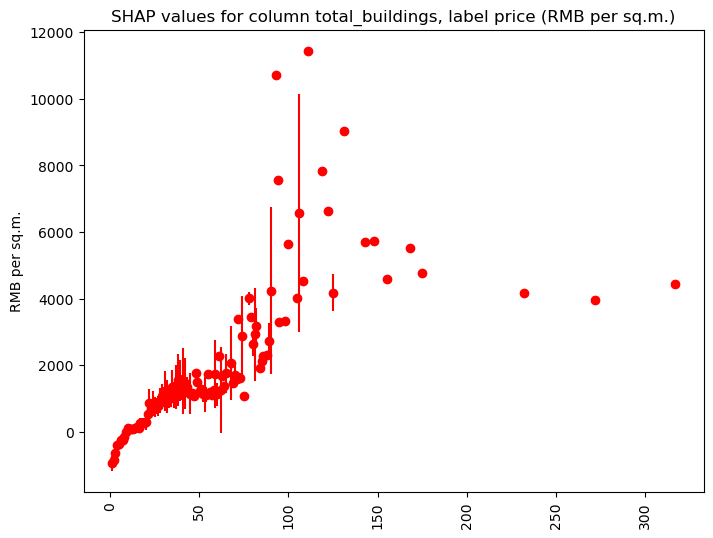

               gain    gain_std  count
col                                   
111.0  11448.043945         NaN      1
93.0   10723.945312         NaN      1
131.0   9040.150391         NaN      1
119.0   7830.363770         NaN      1
94.0    7574.947266         NaN      1
...             ...         ...    ...
5.0     -370.075989  120.813499    168
4.0     -405.281006  132.798798    190
3.0     -638.334412  167.600296    243
2.0     -838.886719  200.823196    210
1.0     -950.241394  215.419006    191

[104 rows x 3 columns]


In [29]:
# Define a function named 'show_shap' that visualizes SHAP values for a specific feature.
# Parameters:
#   - col: The name of the feature for which SHAP values will be visualized.
#   - shap_values: SHAP values calculated for the model's predictions.
#   - label: The label to be displayed in the plot title.
#   - X_test: The DataFrame containing the test data.
#   - ylabel: The label for the y-axis in the plot.
main_label = 'price (RMB per sq.m.)'
def show_shap(col, shap_values=shap_values, label=main_label, X_test=X_test, ylabel='RMB per sq.m.'):
    # Create a copy of the test data DataFrame.
    df_infl = X_test.copy()
    
    # Add a new column 'shap_' to the DataFrame containing SHAP values for the specified feature.
    df_infl['shap_'] = shap_values[:, df_infl.columns.tolist().index(col)]
    
    # Calculate the mean SHAP values and standard deviation grouped by the specified feature.
    gain = round(df_infl.groupby(col)['shap_'].mean(), 4)
    gain_std = round(df_infl.groupby(col)['shap_'].std(), 4)
    
    # Count the number of data points for each category of the specified feature.
    cnt = df_infl.groupby(col)['shap_'].count()
    
    # Create a dictionary containing the feature, mean SHAP values, standard deviation, and count.
    dd_dict = {'col': list(gain.index), 'gain': list(gain.values), 'gain_std': list(gain_std.values), 'count': cnt}
    
    # Create a DataFrame from the dictionary and sort it by 'gain' in descending order.
    df_res = pd.DataFrame.from_dict(dd_dict).sort_values('gain', ascending=False).set_index('col')
    
    # Create a plot to visualize the SHAP values with error bars.
    plt.figure(figsize=(8, 6))
    plt.errorbar(df_res.index, df_res['gain'], yerr=df_res['gain_std'], fmt="o", color="r")
    
    # Set plot title and axis labels.
    plt.title(f'SHAP values for column {col}, label {label}')
    plt.ylabel(ylabel)
    plt.tick_params(axis="x", rotation=90)
    
    # Display the plot and the DataFrame with results.
    plt.show()
    print(df_res)
    
    # Return the function.
    return

# Loop through the columns in the test data.
for col in X_test.columns:
    print()  # Print an empty line for better readability.
    print(col)  # Print the name of the current column.
    print()  # Print another empty line for separation.

    # Call the 'show_shap' function to visualize SHAP values for the current column.
    show_shap(col, shap_values, label=main_label, X_test=X_train)